# UM LISTA 2
## 250346 Jakub Balicki

Pliki źródłowe: https://github.com/Qabrix/um2

Rozwiązanie przedstawione jest dla problemu cvrp.

Kazdy osobnik jest reprezentowany przez gen (tablice ściezki np: `[2 4 1 5 3]`) oraz tablice powrotów, która sygnalizuje, aby z danego miasta wrócic do magazynu (np. `[False False False True False`]).

Fitness score obliczany jest w następujący sposób:

```python
        for osobnik in populacja:
            wolne_miejsce = max_ladownosc

            calkowity_koszt += dystanst_z_magazynu_do_pierwszego_miasta
            wolne_miejsce -= ilosc_w_pierwszym_miescie

            for krok in ilosc_miast:
                i_localization = self.genes[i_subject, step]
                i_next_localization = self.genes[i_subject, step + 1]
                demand = self.demands[i_next_localization]

                if wolne_miejsce - ilosc_w_aktualnym_miescie >= 0 and not tablica_powrotu[krok]:
                    calkowity_koszt += dystanst_z_aktualnego_miasta_do_nastepnego_miasta
                else:
                    wolne_miejsce = max_ladownosc
                    calkowity_koszt += dystanst_z_aktualnego_miasta_do_magazynu
                    calkowity_koszt += dystanst_z_magazynu_do_nastepnego_miasta

                wolne_miejsce -= ilosc_w_aktualnym_miescie

            calkowity_koszt += dystanst_z_ostatniego_miasta_do_magazynu

```

In [1]:
import seaborn as sns

from routes import ROUTES_PATH
from src.loader import Loader
from src.solutions.genethic import calc_solution as genethic_solution
from src.solutions.greedy import calc_solution as greedy_solution
from src.solutions.random import calc_solution as random_solution

### Sprawdzenie rozwiązania losowego dla przypadku testowego

In [2]:
Loader.from_path(ROUTES_PATH / 'simple.vrp')

cvrp = random_solution()
print(f"fit_score: {cvrp.best_fit_score()[1]}")
print(f"ściezka: {cvrp.genes[0]}")

fit_score: (array([4, 3, 2, 1, 5], dtype=int32), 328.0108337402344, array([False, False, False, False, False]))
ściezka: [4 3 2 1 5]


### Sprawdzenie rozwiązania zachłannego dla przypadku testowego

In [3]:
Loader.from_path(ROUTES_PATH / 'simple.vrp')

cvrp = greedy_solution()
print(f"fit_score: {cvrp.best_fit_score()[1]}")
print(f"ściezka: {cvrp.genes[0]}")

fit_score: (array([3, 1, 4, 5, 2], dtype=int32), 269.0461730957031, array([False, False, False, False, False]))
ściezka: [3 1 4 5 2]


### Sprawdzenie rozwiązania GA dla przypadku testowego

i 99: fit_score: 265.2537536621094: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.06it/s]

fit_score: 265.2537536621094
ściezka: [3 2 5 4 1]
tablica dodatkowych powrotow: [False False False False False]


<AxesSubplot:xlabel='i', ylabel='fit_score'>

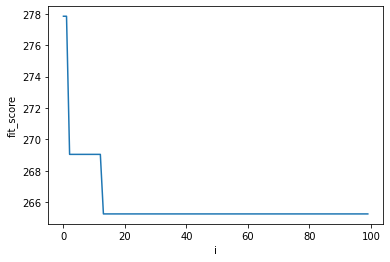

In [4]:
Loader.from_path(ROUTES_PATH / 'simple.vrp')

cvrp, scores_df = genethic_solution(n_population=10, n_iters=100, n_contestants=5, cross_prob=0.5, mut_prob=0.1)
best_route = cvrp.best_fit_score()
print(f"fit_score: {best_route[1]}")
print(f"ściezka: {best_route[0]}")
print(f"tablica dodatkowych powrotow: {best_route[2]}")

sns.lineplot(data=scores_df, x="i", y="fit_score")

## Tuning na danych tai385
### Liczba populacji

In [9]:
Loader.from_path(ROUTES_PATH / 'tai385.vrp')

cvrp, scores_10_df = genethic_solution(n_population=10, n_iters=2000, n_contestants=5, cross_prob=0.5, mut_prob=0.1)
cvrp, scores_100_df = genethic_solution(n_population=100, n_iters=2000, n_contestants=5, cross_prob=0.5, mut_prob=0.1)
cvrp, scores_1000_df = genethic_solution(n_population=1000, n_iters=2000, n_contestants=5, cross_prob=0.5, mut_prob=0.1)


i 1999: fit_score: 41299.53125: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:05<00:00, 10.76it/s]


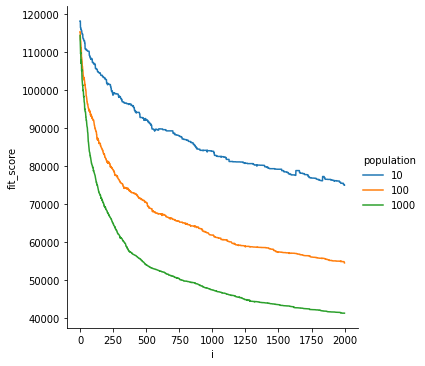

In [18]:
import pandas as pd

scores_10_df["population"] = "10"
scores_100_df["population"] = "100"
scores_1000_df["population"] = "1000"

df = pd.concat([scores_10_df, scores_100_df, scores_1000_df]).reset_index(drop=True)

sns.relplot(data=df, x='i', y='fit_score', hue = 'population', kind = 'line')

Można zaobserwować, iż zwiększenie liczby populacji znacznie poprawiło (dla tego przykładu) wyniki, ale zajęło zdecydowanie dużo więcej czasu.

## Prawdopodobieństwo mutacji oraz krzyżowania

In [20]:
cvrp, scores_07_07_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=5, cross_prob=0.7, mut_prob=0.7)
cvrp, scores_07_001_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=5, cross_prob=0.7, mut_prob=0.01)
cvrp, scores_001_001_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=5, cross_prob=0.01, mut_prob=0.01)
cvrp, scores_01_01_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=5, cross_prob=0.1, mut_prob=0.1)
cvrp, scores_07_02_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=5, cross_prob=0.7, mut_prob=0.2)


i 999: fit_score: 49756.22265625: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.69it/s]


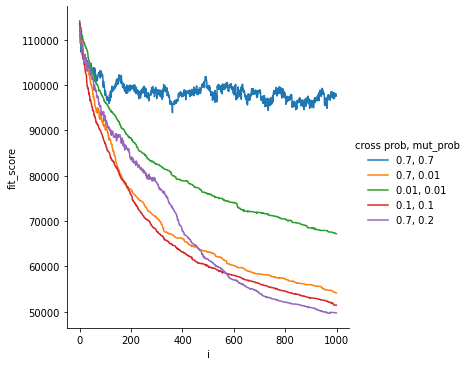

In [21]:
scores_07_07_df["cross prob, mut_prob"] = "0.7, 0.7"
scores_07_001_df["cross prob, mut_prob"] = "0.7, 0.01"
scores_001_001_df["cross prob, mut_prob"] = "0.01, 0.01"
scores_01_01_df["cross prob, mut_prob"] = "0.1, 0.1"
scores_07_02_df["cross prob, mut_prob"] = "0.7, 0.2"

df = pd.concat([scores_07_07_df, scores_07_001_df, scores_001_001_df, scores_01_01_df, scores_07_02_df]).reset_index(drop=True)

sns.relplot(data=df, x='i', y='fit_score', hue = 'cross prob, mut_prob', kind = 'line')

Po wykresach widać, że zbyt duże wartości prawdopodobieństwa krzyżowania oraz mutacji powodują większe skoki podczas kolejnych iteracji (a dla skrajnie dużych wartości widoczny jest brak poprawy wyników). Bardzo małe wartości zbiegają stabilnie, lecz w wolniejszym tempie. 

## Rozmiar turnieju

In [22]:
cvrp, scores_1_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=1, cross_prob=0.7, mut_prob=0.2)
cvrp, scores_5_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=5, cross_prob=0.7, mut_prob=0.2)
cvrp, scores_50_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=50, cross_prob=0.7, mut_prob=0.2)
cvrp, scores_100_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=100, cross_prob=0.7, mut_prob=0.2)
cvrp, scores_200_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=200, cross_prob=0.7, mut_prob=0.2)


i 999: fit_score: 40461.85546875: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.92it/s]


In [25]:
cvrp, scores_700_df = genethic_solution(n_population=1000, n_iters=1000, n_contestants=700, cross_prob=0.7, mut_prob=0.2)


i 999: fit_score: 40396.80078125: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:30<00:00, 11.09it/s]


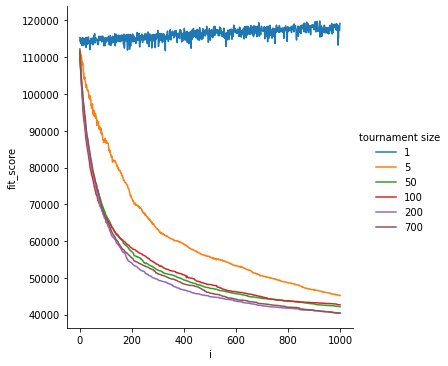

In [26]:
scores_1_df["tournament size"] = "1"
scores_5_df["tournament size"] = "5"
scores_50_df["tournament size"] = "50"
scores_100_df["tournament size"] = "100"
scores_200_df["tournament size"] = "200"
scores_700_df["tournament size"] = "700"

df = pd.concat([scores_1_df, scores_5_df, scores_50_df, scores_100_df, scores_200_df, scores_700_df]).reset_index(drop=True)

sns.relplot(data=df, x='i', y='fit_score', hue = 'tournament size', kind = 'line')

Można zaobserwować, że zwiększenie rozmiaru turnieju do pewnego momentu pozwala polepszyć uzyskane wyniki.

## Wyniki dla danych A-n32-k5, A-n46-k7, A-n80-k10

In [16]:
Loader.from_path(ROUTES_PATH / 'A-n32-k5.vrp')

random_avg = 0
for _ in range(100):
    cvrp = random_solution()
    random_avg += cvrp.best_fit_score()[1]

print(f"Random avg: {random_avg/100}")

Random avg: 2198.5343237304687


In [17]:
greedy_avg = 0
for i in range(1, 32):
    cvrp = greedy_solution(i)
    greedy_avg += cvrp.best_fit_score()[1]

print(f"Greedy avg: {greedy_avg/31}")

Greedy avg: 1231.160132623488


In [18]:
ga_avg = 0
for _ in range(10):
    cvrp, _ = genethic_solution(n_population=1000, n_iters=100, n_contestants=200, cross_prob=0.7, mut_prob=0.2)
    ga_avg += cvrp.best_fit_score()[1]




  0%|                                                                                                                                                                               | 0/100 [00:00<?, ?it/s]


i 0: fit_score: 1628.697509765625:   0%|                                                                                                                                            | 0/100 [00:00<?, ?it/s]


i 1: fit_score: 1538.7685546875:   0%|                                                                                                                                              | 0/100 [00:00<?, ?it/s]


i 2: fit_score: 1434.5439453125:   0%|                                                                                                                                              | 0/100 [00:00<?, ?it/s]


i 3: fit_score: 1386.9521484375:   0%|                                                                                                                                   

i 29: fit_score: 1081.59130859375:  28%|████████████████████████████████████▋                                                                                              | 28/100 [00:00<00:02, 32.49it/s]


i 30: fit_score: 1081.59130859375:  28%|████████████████████████████████████▋                                                                                              | 28/100 [00:00<00:02, 32.49it/s]


i 31: fit_score: 1081.59130859375:  28%|████████████████████████████████████▋                                                                                              | 28/100 [00:00<00:02, 32.49it/s]


i 31: fit_score: 1081.59130859375:  32%|█████████████████████████████████████████▉                                                                                         | 32/100 [00:00<00:02, 32.22it/s]


i 32: fit_score: 1081.59130859375:  32%|█████████████████████████████████████████▉                                                                                         |

i 59: fit_score: 1081.59130859375:  56%|█████████████████████████████████████████████████████████████████████████▎                                                         | 56/100 [00:01<00:01, 32.98it/s]


i 59: fit_score: 1081.59130859375:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 60/100 [00:01<00:01, 32.82it/s]


i 60: fit_score: 1081.59130859375:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 60/100 [00:01<00:01, 32.82it/s]


i 61: fit_score: 1081.59130859375:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 60/100 [00:01<00:01, 32.82it/s]


i 62: fit_score: 1081.59130859375:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    |

i 88: fit_score: 1081.59130859375:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [00:02<00:00, 32.85it/s]


i 89: fit_score: 1081.59130859375:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [00:02<00:00, 32.85it/s]


i 90: fit_score: 1081.59130859375:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [00:02<00:00, 32.85it/s]


i 91: fit_score: 1081.59130859375:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [00:02<00:00, 32.85it/s]


i 91: fit_score: 1081.59130859375:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          |

i 17: fit_score: 1122.178466796875:  16%|████████████████████▊                                                                                                             | 16/100 [00:00<00:02, 34.53it/s]


i 18: fit_score: 1122.178466796875:  16%|████████████████████▊                                                                                                             | 16/100 [00:00<00:02, 34.53it/s]


i 19: fit_score: 1122.178466796875:  16%|████████████████████▊                                                                                                             | 16/100 [00:00<00:02, 34.53it/s]


i 19: fit_score: 1122.178466796875:  20%|██████████████████████████                                                                                                        | 20/100 [00:00<00:02, 34.25it/s]


i 20: fit_score: 1119.7890625:  20%|███████████████████████████                                                                                                            |

i 47: fit_score: 1099.986083984375:  44%|█████████████████████████████████████████████████████████▏                                                                        | 44/100 [00:01<00:01, 33.82it/s]


i 47: fit_score: 1099.986083984375:  48%|██████████████████████████████████████████████████████████████▍                                                                   | 48/100 [00:01<00:01, 32.36it/s]


i 48: fit_score: 1099.986083984375:  48%|██████████████████████████████████████████████████████████████▍                                                                   | 48/100 [00:01<00:01, 32.36it/s]


i 49: fit_score: 1097.223388671875:  48%|██████████████████████████████████████████████████████████████▍                                                                   | 48/100 [00:01<00:01, 32.36it/s]


i 50: fit_score: 1097.223388671875:  48%|██████████████████████████████████████████████████████████████▍                                                                   |

i 76: fit_score: 1085.89697265625:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 76/100 [00:02<00:00, 31.95it/s]


i 77: fit_score: 1085.89697265625:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 76/100 [00:02<00:00, 31.95it/s]


i 78: fit_score: 1085.89697265625:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 76/100 [00:02<00:00, 31.95it/s]


i 79: fit_score: 1085.89697265625:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 76/100 [00:02<00:00, 31.95it/s]


i 79: fit_score: 1085.89697265625:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          |

i 5: fit_score: 1228.1494140625:   4%|█████▎                                                                                                                                | 4/100 [00:00<00:02, 33.50it/s]


i 6: fit_score: 1191.2740478515625:   4%|█████▏                                                                                                                             | 4/100 [00:00<00:02, 33.50it/s]


i 7: fit_score: 1158.817138671875:   4%|█████▎                                                                                                                              | 4/100 [00:00<00:02, 33.50it/s]


i 7: fit_score: 1158.817138671875:   8%|██████████▌                                                                                                                         | 8/100 [00:00<00:02, 33.44it/s]


i 8: fit_score: 1111.1907958984375:   8%|██████████▍                                                                                                                        

i 34: fit_score: 1052.8602294921875:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.35it/s]


i 35: fit_score: 1052.8602294921875:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.35it/s]


i 36: fit_score: 1052.8602294921875:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.35it/s]


i 37: fit_score: 1052.8602294921875:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.35it/s]


i 37: fit_score: 1052.8602294921875:  38%|█████████████████████████████████████████████████                                                                                |

i 64: fit_score: 1021.28271484375:  62%|█████████████████████████████████████████████████████████████████████████████████▏                                                 | 62/100 [00:02<00:01, 31.81it/s]


i 65: fit_score: 1021.28271484375:  62%|█████████████████████████████████████████████████████████████████████████████████▏                                                 | 62/100 [00:02<00:01, 31.81it/s]


i 65: fit_score: 1021.28271484375:  66%|██████████████████████████████████████████████████████████████████████████████████████▍                                            | 66/100 [00:02<00:01, 32.47it/s]


i 66: fit_score: 1021.28271484375:  66%|██████████████████████████████████████████████████████████████████████████████████████▍                                            | 66/100 [00:02<00:01, 32.47it/s]


i 67: fit_score: 1021.28271484375:  66%|██████████████████████████████████████████████████████████████████████████████████████▍                                            |

i 93: fit_score: 973.5672607421875:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 94/100 [00:02<00:00, 33.10it/s]


i 94: fit_score: 973.5672607421875:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 94/100 [00:02<00:00, 33.10it/s]


i 95: fit_score: 973.5672607421875:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 94/100 [00:03<00:00, 33.10it/s]


i 96: fit_score: 973.5672607421875:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 94/100 [00:03<00:00, 33.10it/s]


i 97: fit_score: 973.5672607421875:  94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       |

i 23: fit_score: 1045.94482421875:  20%|██████████████████████████▏                                                                                                        | 20/100 [00:00<00:02, 33.83it/s]


i 23: fit_score: 1045.94482421875:  24%|███████████████████████████████▍                                                                                                   | 24/100 [00:00<00:02, 34.10it/s]


i 24: fit_score: 1044.2515869140625:  24%|██████████████████████████████▉                                                                                                  | 24/100 [00:00<00:02, 34.10it/s]


i 25: fit_score: 1040.6424560546875:  24%|██████████████████████████████▉                                                                                                  | 24/100 [00:00<00:02, 34.10it/s]


i 26: fit_score: 1038.286865234375:  24%|███████████████████████████████▏                                                                                                  |

i 52: fit_score: 1002.6051635742188:  52%|███████████████████████████████████████████████████████████████████                                                              | 52/100 [00:01<00:01, 31.75it/s]


i 53: fit_score: 1002.6051635742188:  52%|███████████████████████████████████████████████████████████████████                                                              | 52/100 [00:01<00:01, 31.75it/s]


i 54: fit_score: 1002.6051635742188:  52%|███████████████████████████████████████████████████████████████████                                                              | 52/100 [00:01<00:01, 31.75it/s]


i 55: fit_score: 1002.6051635742188:  52%|███████████████████████████████████████████████████████████████████                                                              | 52/100 [00:01<00:01, 31.75it/s]


i 55: fit_score: 1002.6051635742188:  56%|████████████████████████████████████████████████████████████████████████▏                                                        |

i 82: fit_score: 1000.6644287109375:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 80/100 [00:02<00:00, 33.77it/s]


i 83: fit_score: 1000.6644287109375:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 80/100 [00:02<00:00, 33.77it/s]


i 83: fit_score: 1000.6644287109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 84/100 [00:02<00:00, 33.36it/s]


i 84: fit_score: 1000.6644287109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 84/100 [00:02<00:00, 33.36it/s]


i 85: fit_score: 1000.6644287109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    |

i 11: fit_score: 1037.0552978515625:   8%|██████████▍                                                                                                                       | 8/100 [00:00<00:02, 33.95it/s]


i 11: fit_score: 1037.0552978515625:  12%|███████████████▍                                                                                                                 | 12/100 [00:00<00:02, 33.74it/s]


i 12: fit_score: 1017.3555297851562:  12%|███████████████▍                                                                                                                 | 12/100 [00:00<00:02, 33.74it/s]


i 13: fit_score: 1017.022216796875:  12%|███████████████▌                                                                                                                  | 12/100 [00:00<00:02, 33.74it/s]


i 14: fit_score: 1012.4122314453125:  12%|███████████████▍                                                                                                                 |

i 40: fit_score: 985.4065551757812:  39%|██████████████████████████████████████████████████▋                                                                               | 39/100 [00:01<00:01, 32.67it/s]


i 41: fit_score: 985.4065551757812:  39%|██████████████████████████████████████████████████▋                                                                               | 39/100 [00:01<00:01, 32.67it/s]


i 42: fit_score: 985.4065551757812:  39%|██████████████████████████████████████████████████▋                                                                               | 39/100 [00:01<00:01, 32.67it/s]


i 42: fit_score: 985.4065551757812:  43%|███████████████████████████████████████████████████████▉                                                                          | 43/100 [00:01<00:01, 32.94it/s]


i 43: fit_score: 985.4065551757812:  43%|███████████████████████████████████████████████████████▉                                                                          |

i 70: fit_score: 985.4065551757812:  67%|███████████████████████████████████████████████████████████████████████████████████████                                           | 67/100 [00:02<00:01, 31.84it/s]


i 70: fit_score: 985.4065551757812:  71%|████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 71/100 [00:02<00:00, 30.90it/s]


i 71: fit_score: 985.4065551757812:  71%|████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 71/100 [00:02<00:00, 30.90it/s]


i 72: fit_score: 985.4065551757812:  71%|████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 71/100 [00:02<00:00, 30.90it/s]


i 73: fit_score: 985.4065551757812:  71%|████████████████████████████████████████████████████████████████████████████████████████████▎                                     |

i 99: fit_score: 985.4065551757812: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 31.26it/s]



  0%|                                                                                                                                                                               | 0/100 [00:00<?, ?it/s]


i 0: fit_score: 1660.0615234375:   0%|                                                                                                                                              | 0/100 [00:00<?, ?it/s]


i 1: fit_score: 1503.8232421875:   0%|                                                                                                                                              | 0/100 [00:00<?, ?it/s]


i 2: fit_score: 1429.181640625:   0%|                                                                                                                                      

i 26: fit_score: 1042.8341064453125:  24%|██████████████████████████████▉                                                                                                  | 24/100 [00:01<00:02, 26.50it/s]


i 26: fit_score: 1042.8341064453125:  27%|██████████████████████████████████▊                                                                                              | 27/100 [00:01<00:02, 27.41it/s]


i 27: fit_score: 1042.8341064453125:  27%|██████████████████████████████████▊                                                                                              | 27/100 [00:01<00:02, 27.41it/s]


i 28: fit_score: 1042.8341064453125:  27%|██████████████████████████████████▊                                                                                              | 27/100 [00:01<00:02, 27.41it/s]


i 29: fit_score: 1041.1455078125:  27%|███████████████████████████████████▋                                                                                                |

i 55: fit_score: 1012.4378051757812:  55%|██████████████████████████████████████████████████████████████████████▉                                                          | 55/100 [00:01<00:01, 32.29it/s]


i 56: fit_score: 1012.4378051757812:  55%|██████████████████████████████████████████████████████████████████████▉                                                          | 55/100 [00:01<00:01, 32.29it/s]


i 57: fit_score: 1012.4378051757812:  55%|██████████████████████████████████████████████████████████████████████▉                                                          | 55/100 [00:01<00:01, 32.29it/s]


i 58: fit_score: 1012.4378051757812:  55%|██████████████████████████████████████████████████████████████████████▉                                                          | 55/100 [00:02<00:01, 32.29it/s]


i 58: fit_score: 1012.4378051757812:  59%|████████████████████████████████████████████████████████████████████████████                                                     |

i 85: fit_score: 1012.4378051757812:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 83/100 [00:02<00:00, 33.93it/s]


i 86: fit_score: 1012.4378051757812:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 83/100 [00:02<00:00, 33.93it/s]


i 86: fit_score: 1012.4378051757812:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 87/100 [00:02<00:00, 34.19it/s]


i 87: fit_score: 1012.4378051757812:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 87/100 [00:02<00:00, 34.19it/s]


i 88: fit_score: 1012.4378051757812:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                |

i 13: fit_score: 1162.9901123046875:  13%|████████████████▊                                                                                                                | 13/100 [00:00<00:03, 22.99it/s]


i 14: fit_score: 1148.363037109375:  13%|████████████████▉                                                                                                                 | 13/100 [00:00<00:03, 22.99it/s]


i 15: fit_score: 1140.6995849609375:  13%|████████████████▊                                                                                                                | 13/100 [00:00<00:03, 22.99it/s]


i 16: fit_score: 1136.706298828125:  13%|████████████████▉                                                                                                                 | 13/100 [00:00<00:03, 22.99it/s]


i 16: fit_score: 1136.706298828125:  17%|██████████████████████                                                                                                            |

i 43: fit_score: 1102.8963623046875:  41%|████████████████████████████████████████████████████▉                                                                            | 41/100 [00:01<00:02, 24.58it/s]


i 44: fit_score: 1098.63720703125:  41%|█████████████████████████████████████████████████████▋                                                                             | 41/100 [00:01<00:02, 24.58it/s]


i 44: fit_score: 1098.63720703125:  45%|██████████████████████████████████████████████████████████▉                                                                        | 45/100 [00:01<00:02, 26.39it/s]


i 45: fit_score: 1098.63720703125:  45%|██████████████████████████████████████████████████████████▉                                                                        | 45/100 [00:01<00:02, 26.39it/s]


i 46: fit_score: 1098.63720703125:  45%|██████████████████████████████████████████████████████████▉                                                                        |

i 72: fit_score: 1086.060302734375:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 73/100 [00:02<00:00, 31.61it/s]


i 73: fit_score: 1086.060302734375:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 73/100 [00:02<00:00, 31.61it/s]


i 74: fit_score: 1086.060302734375:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 73/100 [00:02<00:00, 31.61it/s]


i 75: fit_score: 1086.060302734375:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 73/100 [00:02<00:00, 31.61it/s]


i 76: fit_score: 1086.060302734375:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                   |

i 2: fit_score: 1486.2861328125:   0%|                                                                                                                                              | 0/100 [00:00<?, ?it/s]


i 3: fit_score: 1462.760498046875:   0%|                                                                                                                                            | 0/100 [00:00<?, ?it/s]


i 3: fit_score: 1462.760498046875:   4%|█████▎                                                                                                                              | 4/100 [00:00<00:02, 37.35it/s]


i 4: fit_score: 1459.674072265625:   4%|█████▎                                                                                                                              | 4/100 [00:00<00:02, 37.35it/s]


i 5: fit_score: 1402.71630859375:   4%|█████▎                                                                                                                               

i 31: fit_score: 1108.53857421875:  32%|█████████████████████████████████████████▉                                                                                         | 32/100 [00:00<00:01, 35.08it/s]


i 32: fit_score: 1108.53857421875:  32%|█████████████████████████████████████████▉                                                                                         | 32/100 [00:00<00:01, 35.08it/s]


i 33: fit_score: 1108.53857421875:  32%|█████████████████████████████████████████▉                                                                                         | 32/100 [00:00<00:01, 35.08it/s]


i 34: fit_score: 1108.53857421875:  32%|█████████████████████████████████████████▉                                                                                         | 32/100 [00:00<00:01, 35.08it/s]


i 35: fit_score: 1108.53857421875:  32%|█████████████████████████████████████████▉                                                                                         |

i 61: fit_score: 1096.88720703125:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 60/100 [00:01<00:01, 33.96it/s]


i 62: fit_score: 1096.88720703125:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 60/100 [00:01<00:01, 33.96it/s]


i 63: fit_score: 1096.88720703125:  60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 60/100 [00:01<00:01, 33.96it/s]


i 63: fit_score: 1096.88720703125:  64%|███████████████████████████████████████████████████████████████████████████████████▊                                               | 64/100 [00:01<00:01, 32.91it/s]


i 64: fit_score: 1096.88720703125:  64%|███████████████████████████████████████████████████████████████████████████████████▊                                               |

i 91: fit_score: 1089.371337890625:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 88/100 [00:02<00:00, 31.10it/s]


i 91: fit_score: 1089.371337890625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 92/100 [00:02<00:00, 30.98it/s]


i 92: fit_score: 1089.371337890625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 92/100 [00:02<00:00, 30.98it/s]


i 93: fit_score: 1089.371337890625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 92/100 [00:02<00:00, 30.98it/s]


i 94: fit_score: 1089.371337890625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          |

i 19: fit_score: 1119.5633544921875:  19%|████████████████████████▌                                                                                                        | 19/100 [00:00<00:02, 33.45it/s]


i 20: fit_score: 1117.008056640625:  19%|████████████████████████▋                                                                                                         | 19/100 [00:00<00:02, 33.45it/s]


i 21: fit_score: 1113.121337890625:  19%|████████████████████████▋                                                                                                         | 19/100 [00:00<00:02, 33.45it/s]


i 22: fit_score: 1113.121337890625:  19%|████████████████████████▋                                                                                                         | 19/100 [00:00<00:02, 33.45it/s]


i 22: fit_score: 1113.121337890625:  23%|█████████████████████████████▉                                                                                                    |

i 49: fit_score: 1054.093994140625:  47%|█████████████████████████████████████████████████████████████                                                                     | 47/100 [00:01<00:01, 32.39it/s]


i 50: fit_score: 1054.093994140625:  47%|█████████████████████████████████████████████████████████████                                                                     | 47/100 [00:01<00:01, 32.39it/s]


i 50: fit_score: 1054.093994140625:  51%|██████████████████████████████████████████████████████████████████▎                                                               | 51/100 [00:01<00:01, 32.03it/s]


i 51: fit_score: 1054.093994140625:  51%|██████████████████████████████████████████████████████████████████▎                                                               | 51/100 [00:01<00:01, 32.03it/s]


i 52: fit_score: 1054.093994140625:  51%|██████████████████████████████████████████████████████████████████▎                                                               |

i 78: fit_score: 1054.093994140625:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 79/100 [00:02<00:00, 31.40it/s]


i 79: fit_score: 1054.093994140625:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 79/100 [00:02<00:00, 31.40it/s]


i 80: fit_score: 1054.093994140625:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 79/100 [00:02<00:00, 31.40it/s]


i 81: fit_score: 1054.093994140625:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 79/100 [00:02<00:00, 31.40it/s]


i 82: fit_score: 1054.093994140625:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           |

i 7: fit_score: 1198.8299560546875:   8%|██████████▍                                                                                                                        | 8/100 [00:00<00:02, 32.48it/s]


i 8: fit_score: 1147.54052734375:   8%|██████████▋                                                                                                                          | 8/100 [00:00<00:02, 32.48it/s]


i 9: fit_score: 1138.4420166015625:   8%|██████████▍                                                                                                                        | 8/100 [00:00<00:02, 32.48it/s]


i 10: fit_score: 1134.740478515625:   8%|██████████▍                                                                                                                        | 8/100 [00:00<00:02, 32.48it/s]


i 11: fit_score: 1122.1575927734375:   8%|██████████▍                                                                                                                       

i 37: fit_score: 1059.860107421875:  36%|██████████████████████████████████████████████▊                                                                                   | 36/100 [00:01<00:01, 34.66it/s]


i 38: fit_score: 1059.860107421875:  36%|██████████████████████████████████████████████▊                                                                                   | 36/100 [00:01<00:01, 34.66it/s]


i 39: fit_score: 1059.860107421875:  36%|██████████████████████████████████████████████▊                                                                                   | 36/100 [00:01<00:01, 34.66it/s]


i 39: fit_score: 1059.860107421875:  40%|████████████████████████████████████████████████████                                                                              | 40/100 [00:01<00:01, 34.88it/s]


i 40: fit_score: 1059.860107421875:  40%|████████████████████████████████████████████████████                                                                              |

i 67: fit_score: 1047.010009765625:  64%|███████████████████████████████████████████████████████████████████████████████████▏                                              | 64/100 [00:02<00:01, 34.06it/s]


i 67: fit_score: 1047.010009765625:  68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 68/100 [00:02<00:00, 34.17it/s]


i 68: fit_score: 1047.010009765625:  68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 68/100 [00:02<00:00, 34.17it/s]


i 69: fit_score: 1047.010009765625:  68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 68/100 [00:02<00:00, 34.17it/s]


i 70: fit_score: 1047.010009765625:  68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         |

i 96: fit_score: 1047.010009765625:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:02<00:00, 34.22it/s]


i 97: fit_score: 1041.9471435546875:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:02<00:00, 34.22it/s]


i 98: fit_score: 1041.9471435546875:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:02<00:00, 34.22it/s]


i 99: fit_score: 1041.9471435546875:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:02<00:00, 34.22it/s]


i 99: fit_score: 1041.9471435546875: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 

In [19]:
print(f"GA avg: {ga_avg/10}")

GA avg: 1038.4649475097656


In [20]:
Loader.from_path(ROUTES_PATH / 'A-n46-k7.vrp')

random_avg = 0
for _ in range(100):
    cvrp = random_solution()
    random_avg += cvrp.best_fit_score()[1]

print(f"Random avg: {random_avg/100}")

Random avg: 2839.2326025390626


In [24]:
greedy_avg = 0
for i in range(1, 46):
    cvrp = greedy_solution(i)
    greedy_avg += cvrp.best_fit_score()[1]

print(f"Greedy avg: {greedy_avg/45}")

Greedy avg: 1572.961759440104


In [22]:
ga_avg = 0
for _ in range(10):
    cvrp, _ = genethic_solution(n_population=1000, n_iters=100, n_contestants=200, cross_prob=0.7, mut_prob=0.2)
    ga_avg += cvrp.best_fit_score()[1]




  0%|                                                                                                                                                                               | 0/100 [00:00<?, ?it/s]


i 0: fit_score: 2188.75732421875:   0%|                                                                                                                                             | 0/100 [00:00<?, ?it/s]


i 1: fit_score: 2127.1982421875:   0%|                                                                                                                                              | 0/100 [00:00<?, ?it/s]


i 2: fit_score: 2066.74609375:   0%|                                                                                                                                                | 0/100 [00:00<?, ?it/s]


i 3: fit_score: 2002.7510986328125:   0%|                                                                                                                                

i 29: fit_score: 1601.7916259765625:  27%|██████████████████████████████████▊                                                                                              | 27/100 [00:00<00:02, 30.83it/s]


i 30: fit_score: 1599.999267578125:  27%|███████████████████████████████████                                                                                               | 27/100 [00:00<00:02, 30.83it/s]


i 30: fit_score: 1599.999267578125:  31%|████████████████████████████████████████▎                                                                                         | 31/100 [00:01<00:02, 31.00it/s]


i 31: fit_score: 1595.64892578125:  31%|████████████████████████████████████████▌                                                                                          | 31/100 [00:01<00:02, 31.00it/s]


i 32: fit_score: 1592.3712158203125:  31%|███████████████████████████████████████▉                                                                                         |

i 58: fit_score: 1499.7064208984375:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 59/100 [00:01<00:01, 32.18it/s]


i 59: fit_score: 1499.7064208984375:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 59/100 [00:01<00:01, 32.18it/s]


i 60: fit_score: 1499.7064208984375:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 59/100 [00:01<00:01, 32.18it/s]


i 61: fit_score: 1499.7064208984375:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 59/100 [00:01<00:01, 32.18it/s]


i 62: fit_score: 1499.7064208984375:  59%|████████████████████████████████████████████████████████████████████████████                                                     |

i 88: fit_score: 1424.6812744140625:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 87/100 [00:02<00:00, 31.21it/s]


i 89: fit_score: 1424.6812744140625:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 87/100 [00:02<00:00, 31.21it/s]


i 90: fit_score: 1424.6812744140625:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 87/100 [00:02<00:00, 31.21it/s]


i 90: fit_score: 1424.6812744140625:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 91/100 [00:02<00:00, 31.67it/s]


i 91: fit_score: 1424.6812744140625:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           |

i 17: fit_score: 1829.955810546875:  15%|███████████████████▌                                                                                                              | 15/100 [00:00<00:02, 32.13it/s]


i 18: fit_score: 1818.615234375:  15%|███████████████████▉                                                                                                                 | 15/100 [00:00<00:02, 32.13it/s]


i 18: fit_score: 1818.615234375:  19%|█████████████████████████▎                                                                                                           | 19/100 [00:00<00:02, 27.59it/s]


i 19: fit_score: 1805.7564697265625:  19%|████████████████████████▌                                                                                                        | 19/100 [00:00<00:02, 27.59it/s]


i 20: fit_score: 1799.8179931640625:  19%|████████████████████████▌                                                                                                        |

i 46: fit_score: 1636.027587890625:  47%|█████████████████████████████████████████████████████████████                                                                     | 47/100 [00:01<00:01, 31.11it/s]


i 47: fit_score: 1636.027587890625:  47%|█████████████████████████████████████████████████████████████                                                                     | 47/100 [00:01<00:01, 31.11it/s]


i 48: fit_score: 1636.027587890625:  47%|█████████████████████████████████████████████████████████████                                                                     | 47/100 [00:01<00:01, 31.11it/s]


i 49: fit_score: 1636.027587890625:  47%|█████████████████████████████████████████████████████████████                                                                     | 47/100 [00:01<00:01, 31.11it/s]


i 50: fit_score: 1636.027587890625:  47%|█████████████████████████████████████████████████████████████                                                                     |

i 76: fit_score: 1636.027587890625:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 75/100 [00:02<00:00, 31.12it/s]


i 77: fit_score: 1636.027587890625:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 75/100 [00:02<00:00, 31.12it/s]


i 78: fit_score: 1636.027587890625:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 75/100 [00:02<00:00, 31.12it/s]


i 78: fit_score: 1636.027587890625:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 79/100 [00:02<00:00, 31.16it/s]


i 79: fit_score: 1636.027587890625:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           |

i 5: fit_score: 1978.2093505859375:   4%|█████▏                                                                                                                             | 4/100 [00:00<00:02, 33.65it/s]


i 6: fit_score: 1938.2303466796875:   4%|█████▏                                                                                                                             | 4/100 [00:00<00:02, 33.65it/s]


i 6: fit_score: 1938.2303466796875:   7%|█████████▏                                                                                                                         | 7/100 [00:00<00:03, 27.67it/s]


i 7: fit_score: 1911.417724609375:   7%|█████████▏                                                                                                                          | 7/100 [00:00<00:03, 27.67it/s]


i 8: fit_score: 1878.4364013671875:   7%|█████████▏                                                                                                                         

i 34: fit_score: 1505.4422607421875:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.80it/s]


i 35: fit_score: 1505.0645751953125:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.80it/s]


i 36: fit_score: 1503.0928955078125:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.80it/s]


i 37: fit_score: 1503.0928955078125:  34%|███████████████████████████████████████████▊                                                                                     | 34/100 [00:01<00:02, 30.80it/s]


i 37: fit_score: 1503.0928955078125:  38%|█████████████████████████████████████████████████                                                                                |

i 64: fit_score: 1459.5079345703125:  61%|██████████████████████████████████████████████████████████████████████████████▋                                                  | 61/100 [00:02<00:01, 30.02it/s]


i 64: fit_score: 1459.5079345703125:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                             | 65/100 [00:02<00:01, 30.16it/s]


i 65: fit_score: 1459.5079345703125:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                             | 65/100 [00:02<00:01, 30.16it/s]


i 66: fit_score: 1459.5079345703125:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                             | 65/100 [00:02<00:01, 30.16it/s]


i 67: fit_score: 1459.5079345703125:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                             |

i 93: fit_score: 1440.0780029296875:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 93/100 [00:03<00:00, 31.55it/s]


i 94: fit_score: 1440.0780029296875:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 93/100 [00:03<00:00, 31.55it/s]


i 95: fit_score: 1440.0780029296875:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 93/100 [00:03<00:00, 31.55it/s]


i 96: fit_score: 1440.0780029296875:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 93/100 [00:03<00:00, 31.55it/s]


i 96: fit_score: 1440.0780029296875:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   |

i 22: fit_score: 1567.3541259765625:  22%|████████████████████████████▍                                                                                                    | 22/100 [00:00<00:02, 30.38it/s]


i 23: fit_score: 1567.3541259765625:  22%|████████████████████████████▍                                                                                                    | 22/100 [00:00<00:02, 30.38it/s]


i 24: fit_score: 1559.6683349609375:  22%|████████████████████████████▍                                                                                                    | 22/100 [00:00<00:02, 30.38it/s]


i 24: fit_score: 1559.6683349609375:  25%|████████████████████████████████▎                                                                                                | 25/100 [00:00<00:02, 29.99it/s]


i 25: fit_score: 1555.327392578125:  25%|████████████████████████████████▌                                                                                                 |

i 51: fit_score: 1495.3316650390625:  50%|████████████████████████████████████████████████████████████████▌                                                                | 50/100 [00:01<00:01, 30.36it/s]


i 52: fit_score: 1467.0234375:  50%|███████████████████████████████████████████████████████████████████▌                                                                   | 50/100 [00:01<00:01, 30.36it/s]


i 53: fit_score: 1465.362060546875:  50%|█████████████████████████████████████████████████████████████████                                                                 | 50/100 [00:01<00:01, 30.36it/s]


i 53: fit_score: 1465.362060546875:  54%|██████████████████████████████████████████████████████████████████████▏                                                           | 54/100 [00:01<00:01, 30.99it/s]


i 54: fit_score: 1465.362060546875:  54%|██████████████████████████████████████████████████████████████████████▏                                                           |

i 81: fit_score: 1465.295166015625:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 78/100 [00:02<00:00, 30.64it/s]


i 81: fit_score: 1465.295166015625:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 82/100 [00:02<00:00, 30.60it/s]


i 82: fit_score: 1465.295166015625:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 82/100 [00:02<00:00, 30.60it/s]


i 83: fit_score: 1465.295166015625:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 82/100 [00:02<00:00, 30.60it/s]


i 84: fit_score: 1459.3746337890625:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       |

i 10: fit_score: 1748.433349609375:   8%|██████████▍                                                                                                                        | 8/100 [00:00<00:02, 32.34it/s]


i 11: fit_score: 1734.0875244140625:   8%|██████████▍                                                                                                                       | 8/100 [00:00<00:02, 32.34it/s]


i 11: fit_score: 1734.0875244140625:  12%|███████████████▍                                                                                                                 | 12/100 [00:00<00:02, 31.85it/s]


i 12: fit_score: 1710.36328125:  12%|████████████████                                                                                                                      | 12/100 [00:00<00:02, 31.85it/s]


i 13: fit_score: 1708.61279296875:  12%|███████████████▋                                                                                                                   |

i 39: fit_score: 1579.6634521484375:  40%|███████████████████████████████████████████████████▌                                                                             | 40/100 [00:01<00:01, 31.58it/s]


i 40: fit_score: 1579.6634521484375:  40%|███████████████████████████████████████████████████▌                                                                             | 40/100 [00:01<00:01, 31.58it/s]


i 41: fit_score: 1579.6634521484375:  40%|███████████████████████████████████████████████████▌                                                                             | 40/100 [00:01<00:01, 31.58it/s]


i 42: fit_score: 1579.6634521484375:  40%|███████████████████████████████████████████████████▌                                                                             | 40/100 [00:01<00:01, 31.58it/s]


i 43: fit_score: 1579.6634521484375:  40%|███████████████████████████████████████████████████▌                                                                             |

i 69: fit_score: 1579.6634521484375:  68%|███████████████████████████████████████████████████████████████████████████████████████▋                                         | 68/100 [00:02<00:01, 30.84it/s]


i 70: fit_score: 1579.6634521484375:  68%|███████████████████████████████████████████████████████████████████████████████████████▋                                         | 68/100 [00:02<00:01, 30.84it/s]


i 71: fit_score: 1579.6634521484375:  68%|███████████████████████████████████████████████████████████████████████████████████████▋                                         | 68/100 [00:02<00:01, 30.84it/s]


i 71: fit_score: 1579.6634521484375:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 72/100 [00:02<00:01, 26.42it/s]


i 72: fit_score: 1579.6634521484375:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    |

i 99: fit_score: 1579.6634521484375:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:03<00:00, 31.16it/s]


i 99: fit_score: 1579.6634521484375: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.70it/s]



  0%|                                                                                                                                                                               | 0/100 [00:00<?, ?it/s]


i 0: fit_score: 2275.845947265625:   0%|                                                                                                                                            | 0/100 [00:00<?, ?it/s]


i 1: fit_score: 2219.293701171875:   0%|                                                                                                                                   

i 27: fit_score: 1659.5958251953125:  26%|█████████████████████████████████▌                                                                                               | 26/100 [00:00<00:02, 31.21it/s]


i 28: fit_score: 1659.5958251953125:  26%|█████████████████████████████████▌                                                                                               | 26/100 [00:00<00:02, 31.21it/s]


i 29: fit_score: 1657.7921142578125:  26%|█████████████████████████████████▌                                                                                               | 26/100 [00:00<00:02, 31.21it/s]


i 29: fit_score: 1657.7921142578125:  30%|██████████████████████████████████████▋                                                                                          | 30/100 [00:00<00:02, 31.26it/s]


i 30: fit_score: 1656.2022705078125:  30%|██████████████████████████████████████▋                                                                                          |

i 57: fit_score: 1523.8909912109375:  54%|█████████████████████████████████████████████████████████████████████▋                                                           | 54/100 [00:01<00:01, 31.11it/s]


i 57: fit_score: 1523.8909912109375:  58%|██████████████████████████████████████████████████████████████████████████▊                                                      | 58/100 [00:01<00:01, 31.66it/s]


i 58: fit_score: 1523.8909912109375:  58%|██████████████████████████████████████████████████████████████████████████▊                                                      | 58/100 [00:01<00:01, 31.66it/s]


i 59: fit_score: 1523.8909912109375:  58%|██████████████████████████████████████████████████████████████████████████▊                                                      | 58/100 [00:01<00:01, 31.66it/s]


i 60: fit_score: 1523.8909912109375:  58%|██████████████████████████████████████████████████████████████████████████▊                                                      |

i 86: fit_score: 1492.564697265625:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 85/100 [00:02<00:00, 30.70it/s]


i 87: fit_score: 1489.2335205078125:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 85/100 [00:02<00:00, 30.70it/s]


i 88: fit_score: 1485.521728515625:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 85/100 [00:02<00:00, 30.70it/s]


i 88: fit_score: 1485.521728515625:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 89/100 [00:02<00:00, 30.57it/s]


i 89: fit_score: 1482.1905517578125:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              |

i 15: fit_score: 1669.3603515625:  16%|█████████████████████                                                                                                               | 16/100 [00:00<00:02, 31.91it/s]


i 16: fit_score: 1662.839111328125:  16%|████████████████████▊                                                                                                             | 16/100 [00:00<00:02, 31.91it/s]


i 17: fit_score: 1653.7579345703125:  16%|████████████████████▋                                                                                                            | 16/100 [00:00<00:02, 31.91it/s]


i 18: fit_score: 1653.7579345703125:  16%|████████████████████▋                                                                                                            | 16/100 [00:00<00:02, 31.91it/s]


i 19: fit_score: 1622.9490966796875:  16%|████████████████████▋                                                                                                            |

i 45: fit_score: 1480.7349853515625:  44%|████████████████████████████████████████████████████████▊                                                                        | 44/100 [00:01<00:01, 32.22it/s]


i 46: fit_score: 1480.236572265625:  44%|█████████████████████████████████████████████████████████▏                                                                        | 44/100 [00:01<00:01, 32.22it/s]


i 47: fit_score: 1480.236572265625:  44%|█████████████████████████████████████████████████████████▏                                                                        | 44/100 [00:01<00:01, 32.22it/s]


i 47: fit_score: 1480.236572265625:  48%|██████████████████████████████████████████████████████████████▍                                                                   | 48/100 [00:01<00:01, 27.07it/s]


i 48: fit_score: 1476.15625:  48%|█████████████████████████████████████████████████████████████████▊                                                                       |

i 73: fit_score: 1428.6739501953125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 72/100 [00:02<00:01, 27.35it/s]


i 74: fit_score: 1428.6739501953125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 72/100 [00:02<00:01, 27.35it/s]


i 74: fit_score: 1428.6739501953125:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 75/100 [00:02<00:00, 27.78it/s]


i 75: fit_score: 1428.6739501953125:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 75/100 [00:02<00:00, 27.78it/s]


i 76: fit_score: 1428.6739501953125:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                |

i 1: fit_score: 2206.290283203125:   0%|                                                                                                                                            | 0/100 [00:00<?, ?it/s]


i 2: fit_score: 2164.24365234375:   0%|                                                                                                                                             | 0/100 [00:00<?, ?it/s]


i 3: fit_score: 2074.19384765625:   0%|                                                                                                                                             | 0/100 [00:00<?, ?it/s]


i 3: fit_score: 2074.19384765625:   4%|█████▎                                                                                                                               | 4/100 [00:00<00:03, 30.63it/s]


i 4: fit_score: 1976.9111328125:   4%|█████▎                                                                                                                                

i 30: fit_score: 1565.3629150390625:  28%|████████████████████████████████████                                                                                             | 28/100 [00:01<00:02, 30.17it/s]


i 31: fit_score: 1544.765625:  28%|██████████████████████████████████████                                                                                                  | 28/100 [00:01<00:02, 30.17it/s]


i 31: fit_score: 1544.765625:  32%|███████████████████████████████████████████▌                                                                                            | 32/100 [00:01<00:02, 30.67it/s]


i 32: fit_score: 1540.528564453125:  32%|█████████████████████████████████████████▌                                                                                        | 32/100 [00:01<00:02, 30.67it/s]


i 33: fit_score: 1540.528564453125:  32%|█████████████████████████████████████████▌                                                                                        |

i 59: fit_score: 1487.4510498046875:  60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 60/100 [00:01<00:01, 30.23it/s]


i 60: fit_score: 1487.4510498046875:  60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 60/100 [00:02<00:01, 30.23it/s]


i 61: fit_score: 1487.4510498046875:  60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 60/100 [00:02<00:01, 30.23it/s]


i 62: fit_score: 1487.4510498046875:  60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 60/100 [00:02<00:01, 30.23it/s]


i 63: fit_score: 1481.6123046875:  60%|███████████████████████████████████████████████████████████████████████████████▏                                                    |

i 89: fit_score: 1436.49462890625:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [00:02<00:00, 31.08it/s]


i 90: fit_score: 1436.49462890625:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [00:02<00:00, 31.08it/s]


i 91: fit_score: 1436.49462890625:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [00:03<00:00, 31.08it/s]


i 91: fit_score: 1436.49462890625:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 92/100 [00:03<00:00, 30.53it/s]


i 92: fit_score: 1436.49462890625:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          |

i 18: fit_score: 1569.953125:  16%|█████████████████████▊                                                                                                                  | 16/100 [00:00<00:02, 32.46it/s]


i 19: fit_score: 1560.327880859375:  16%|████████████████████▊                                                                                                             | 16/100 [00:00<00:02, 32.46it/s]


i 19: fit_score: 1560.327880859375:  20%|██████████████████████████                                                                                                        | 20/100 [00:00<00:02, 32.28it/s]


i 20: fit_score: 1558.67626953125:  20%|██████████████████████████▏                                                                                                        | 20/100 [00:00<00:02, 32.28it/s]


i 21: fit_score: 1547.75439453125:  20%|██████████████████████████▏                                                                                                        |

i 47: fit_score: 1451.9635009765625:  48%|█████████████████████████████████████████████████████████████▉                                                                   | 48/100 [00:01<00:01, 32.38it/s]


i 48: fit_score: 1451.769775390625:  48%|██████████████████████████████████████████████████████████████▍                                                                   | 48/100 [00:01<00:01, 32.38it/s]


i 49: fit_score: 1451.769775390625:  48%|██████████████████████████████████████████████████████████████▍                                                                   | 48/100 [00:01<00:01, 32.38it/s]


i 50: fit_score: 1451.769775390625:  48%|██████████████████████████████████████████████████████████████▍                                                                   | 48/100 [00:01<00:01, 32.38it/s]


i 51: fit_score: 1451.769775390625:  48%|██████████████████████████████████████████████████████████████▍                                                                   |

i 77: fit_score: 1431.1915283203125:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████                               | 76/100 [00:02<00:00, 31.68it/s]


i 78: fit_score: 1431.1915283203125:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████                               | 76/100 [00:02<00:00, 31.68it/s]


i 79: fit_score: 1431.1915283203125:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████                               | 76/100 [00:02<00:00, 31.68it/s]


i 79: fit_score: 1431.1915283203125:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 80/100 [00:02<00:00, 31.45it/s]


i 80: fit_score: 1431.1915283203125:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                         |

i 6: fit_score: 1816.400146484375:   4%|█████▎                                                                                                                              | 4/100 [00:00<00:02, 33.41it/s]


i 6: fit_score: 1816.400146484375:   7%|█████████▏                                                                                                                          | 7/100 [00:00<00:03, 27.64it/s]


i 7: fit_score: 1801.7451171875:   7%|█████████▍                                                                                                                            | 7/100 [00:00<00:03, 27.64it/s]


i 8: fit_score: 1769.271484375:   7%|█████████▍                                                                                                                             | 7/100 [00:00<00:03, 27.64it/s]


i 9: fit_score: 1750.227783203125:   7%|█████████▏                                                                                                                          

i 35: fit_score: 1497.3746337890625:  35%|█████████████████████████████████████████████▏                                                                                   | 35/100 [00:01<00:02, 32.09it/s]


i 36: fit_score: 1496.9700927734375:  35%|█████████████████████████████████████████████▏                                                                                   | 35/100 [00:01<00:02, 32.09it/s]


i 37: fit_score: 1496.9700927734375:  35%|█████████████████████████████████████████████▏                                                                                   | 35/100 [00:01<00:02, 32.09it/s]


i 38: fit_score: 1495.8726806640625:  35%|█████████████████████████████████████████████▏                                                                                   | 35/100 [00:01<00:02, 32.09it/s]


i 38: fit_score: 1495.8726806640625:  39%|██████████████████████████████████████████████████▎                                                                              |

i 65: fit_score: 1460.2674560546875:  63%|█████████████████████████████████████████████████████████████████████████████████▎                                               | 63/100 [00:02<00:01, 31.80it/s]


i 66: fit_score: 1458.27978515625:  63%|██████████████████████████████████████████████████████████████████████████████████▌                                                | 63/100 [00:02<00:01, 31.80it/s]


i 66: fit_score: 1458.27978515625:  67%|███████████████████████████████████████████████████████████████████████████████████████▊                                           | 67/100 [00:02<00:01, 32.18it/s]


i 67: fit_score: 1458.27978515625:  67%|███████████████████████████████████████████████████████████████████████████████████████▊                                           | 67/100 [00:02<00:01, 32.18it/s]


i 68: fit_score: 1440.5264892578125:  67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          |

i 94: fit_score: 1432.333984375:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 95/100 [00:03<00:00, 32.74it/s]


i 95: fit_score: 1432.333984375:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 95/100 [00:03<00:00, 32.74it/s]


i 96: fit_score: 1432.333984375:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 95/100 [00:03<00:00, 32.74it/s]


i 97: fit_score: 1432.333984375:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 95/100 [00:03<00:00, 32.74it/s]


i 98: fit_score: 1432.333984375:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      |

In [23]:
print(f"GA avg: {ga_avg/10}")

GA avg: 1472.7245361328125


In [2]:
Loader.from_path(ROUTES_PATH / 'A-n80-k10.vrp')

random_avg = 0
for _ in range(100):
    cvrp = random_solution()
    random_avg += cvrp.best_fit_score()[1]

print(f"Random avg: {random_avg/100}")

Random avg: 5957.0301123046875


In [30]:
greedy_avg = 0
for i in range(1, 80):
    cvrp = greedy_solution(i)
    greedy_avg += cvrp.best_fit_score()[1]

print(f"Greedy avg: {greedy_avg/79}")

Greedy avg: 3140.4614319620255


In [31]:
ga_avg = 0
for _ in range(10):
    cvrp, _ = genethic_solution(n_population=1000, n_iters=100, n_contestants=200, cross_prob=0.7, mut_prob=0.2)
    ga_avg += cvrp.best_fit_score()[1]




  0%|                                                                                                                                                                               | 0/100 [00:00<?, ?it/s]


i 0: fit_score: 5214.79443359375:   0%|                                                                                                                                             | 0/100 [00:00<?, ?it/s]


i 1: fit_score: 5139.56884765625:   0%|                                                                                                                                             | 0/100 [00:00<?, ?it/s]


i 2: fit_score: 5041.14990234375:   0%|                                                                                                                                             | 0/100 [00:00<?, ?it/s]


i 3: fit_score: 4847.248046875:   0%|                                                                                                                                    

i 28: fit_score: 3743.744873046875:  26%|█████████████████████████████████▊                                                                                                | 26/100 [00:01<00:02, 27.90it/s]


i 28: fit_score: 3743.744873046875:  29%|█████████████████████████████████████▋                                                                                            | 29/100 [00:01<00:02, 27.85it/s]


i 29: fit_score: 3709.701171875:  29%|██████████████████████████████████████▌                                                                                              | 29/100 [00:01<00:02, 27.85it/s]


i 30: fit_score: 3686.100341796875:  29%|█████████████████████████████████████▋                                                                                            | 29/100 [00:01<00:02, 27.85it/s]


i 31: fit_score: 3672.078125:  29%|███████████████████████████████████████▍                                                                                                |

i 55: fit_score: 3428.431640625:  56%|██████████████████████████████████████████████████████████████████████████▍                                                          | 56/100 [00:01<00:01, 28.70it/s]


i 56: fit_score: 3428.431640625:  56%|██████████████████████████████████████████████████████████████████████████▍                                                          | 56/100 [00:02<00:01, 28.70it/s]


i 57: fit_score: 3425.805419921875:  56%|████████████████████████████████████████████████████████████████████████▊                                                         | 56/100 [00:02<00:01, 28.70it/s]


i 58: fit_score: 3425.805419921875:  56%|████████████████████████████████████████████████████████████████████████▊                                                         | 56/100 [00:02<00:01, 28.70it/s]


i 58: fit_score: 3425.805419921875:  59%|████████████████████████████████████████████████████████████████████████████▋                                                     |

i 83: fit_score: 3306.00146484375:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 83/100 [00:02<00:00, 27.45it/s]


i 84: fit_score: 3305.935546875:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 83/100 [00:02<00:00, 27.45it/s]


i 85: fit_score: 3305.935546875:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 83/100 [00:03<00:00, 27.45it/s]


i 85: fit_score: 3305.935546875:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 86/100 [00:03<00:00, 27.71it/s]


i 86: fit_score: 3305.935546875:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  |

i 11: fit_score: 4139.068359375:  11%|██████████████▋                                                                                                                      | 11/100 [00:00<00:02, 30.96it/s]


i 12: fit_score: 4089.983154296875:  11%|██████████████▎                                                                                                                   | 11/100 [00:00<00:02, 30.96it/s]


i 13: fit_score: 4052.953369140625:  11%|██████████████▎                                                                                                                   | 11/100 [00:00<00:02, 30.96it/s]


i 13: fit_score: 4052.953369140625:  14%|██████████████████▏                                                                                                               | 14/100 [00:00<00:02, 30.20it/s]


i 14: fit_score: 4013.61572265625:  14%|██████████████████▎                                                                                                                |

i 39: fit_score: 3504.41259765625:  38%|█████████████████████████████████████████████████▊                                                                                 | 38/100 [00:01<00:02, 29.34it/s]


i 40: fit_score: 3490.612060546875:  38%|█████████████████████████████████████████████████▍                                                                                | 38/100 [00:01<00:02, 29.34it/s]


i 40: fit_score: 3490.612060546875:  41%|█████████████████████████████████████████████████████▎                                                                            | 41/100 [00:01<00:02, 28.99it/s]


i 41: fit_score: 3472.870849609375:  41%|█████████████████████████████████████████████████████▎                                                                            | 41/100 [00:01<00:02, 28.99it/s]


i 42: fit_score: 3459.0703125:  41%|███████████████████████████████████████████████████████▎                                                                               |

i 67: fit_score: 3271.91845703125:  66%|██████████████████████████████████████████████████████████████████████████████████████▍                                            | 66/100 [00:02<00:01, 28.14it/s]


i 68: fit_score: 3271.243896484375:  66%|█████████████████████████████████████████████████████████████████████████████████████▊                                            | 66/100 [00:02<00:01, 28.14it/s]


i 68: fit_score: 3271.243896484375:  69%|█████████████████████████████████████████████████████████████████████████████████████████▋                                        | 69/100 [00:02<00:01, 28.37it/s]


i 69: fit_score: 3270.727294921875:  69%|█████████████████████████████████████████████████████████████████████████████████████████▋                                        | 69/100 [00:02<00:01, 28.37it/s]


i 70: fit_score: 3270.727294921875:  69%|█████████████████████████████████████████████████████████████████████████████████████████▋                                        |

i 95: fit_score: 3247.47119140625:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 93/100 [00:03<00:00, 27.78it/s]


i 95: fit_score: 3247.47119140625:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:03<00:00, 27.81it/s]


i 96: fit_score: 3247.47119140625:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:03<00:00, 27.81it/s]


i 97: fit_score: 3245.77001953125:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:03<00:00, 27.81it/s]


i 98: fit_score: 3245.77001953125:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     |

i 22: fit_score: 3734.47412109375:  21%|███████████████████████████▌                                                                                                       | 21/100 [00:00<00:02, 27.71it/s]


i 23: fit_score: 3698.12158203125:  21%|███████████████████████████▌                                                                                                       | 21/100 [00:00<00:02, 27.71it/s]


i 23: fit_score: 3698.12158203125:  24%|███████████████████████████████▍                                                                                                   | 24/100 [00:00<00:02, 27.99it/s]


i 24: fit_score: 3684.24267578125:  24%|███████████████████████████████▍                                                                                                   | 24/100 [00:00<00:02, 27.99it/s]


i 25: fit_score: 3661.29638671875:  24%|███████████████████████████████▍                                                                                                   |

i 50: fit_score: 3309.9892578125:  48%|███████████████████████████████████████████████████████████████▎                                                                    | 48/100 [00:01<00:01, 27.78it/s]


i 50: fit_score: 3309.9892578125:  51%|███████████████████████████████████████████████████████████████████▎                                                                | 51/100 [00:01<00:01, 27.97it/s]


i 51: fit_score: 3308.7646484375:  51%|███████████████████████████████████████████████████████████████████▎                                                                | 51/100 [00:01<00:01, 27.97it/s]


i 52: fit_score: 3308.7646484375:  51%|███████████████████████████████████████████████████████████████████▎                                                                | 51/100 [00:01<00:01, 27.97it/s]


i 53: fit_score: 3278.817138671875:  51%|██████████████████████████████████████████████████████████████████▎                                                               |

i 77: fit_score: 3131.885009765625:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 78/100 [00:02<00:00, 28.59it/s]


i 78: fit_score: 3131.885009765625:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 78/100 [00:02<00:00, 28.59it/s]


i 79: fit_score: 3119.57958984375:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 78/100 [00:02<00:00, 28.59it/s]


i 80: fit_score: 3111.766845703125:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 78/100 [00:02<00:00, 28.59it/s]


i 80: fit_score: 3111.766845703125:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        |

i 5: fit_score: 4694.9140625:   4%|█████▍                                                                                                                                   | 4/100 [00:00<00:03, 30.07it/s]


i 6: fit_score: 4647.14111328125:   4%|█████▎                                                                                                                               | 4/100 [00:00<00:03, 30.07it/s]


i 6: fit_score: 4647.14111328125:   7%|█████████▎                                                                                                                           | 7/100 [00:00<00:03, 29.99it/s]


i 7: fit_score: 4592.28076171875:   7%|█████████▎                                                                                                                           | 7/100 [00:00<00:03, 29.99it/s]


i 8: fit_score: 4471.02294921875:   7%|█████████▎                                                                                                                           

i 33: fit_score: 3674.61767578125:  31%|████████████████████████████████████████▌                                                                                          | 31/100 [00:01<00:02, 27.63it/s]


i 33: fit_score: 3674.61767578125:  34%|████████████████████████████████████████████▌                                                                                      | 34/100 [00:01<00:02, 28.20it/s]


i 34: fit_score: 3660.519775390625:  34%|████████████████████████████████████████████▏                                                                                     | 34/100 [00:01<00:02, 28.20it/s]


i 35: fit_score: 3642.28515625:  34%|█████████████████████████████████████████████▌                                                                                        | 34/100 [00:01<00:02, 28.20it/s]


i 36: fit_score: 3624.461181640625:  34%|████████████████████████████████████████████▏                                                                                     |

i 61: fit_score: 3339.953857421875:  60%|██████████████████████████████████████████████████████████████████████████████                                                    | 60/100 [00:02<00:01, 29.35it/s]


i 62: fit_score: 3329.862060546875:  60%|██████████████████████████████████████████████████████████████████████████████                                                    | 60/100 [00:02<00:01, 29.35it/s]


i 62: fit_score: 3329.862060546875:  63%|█████████████████████████████████████████████████████████████████████████████████▉                                                | 63/100 [00:02<00:01, 29.01it/s]


i 63: fit_score: 3329.634521484375:  63%|█████████████████████████████████████████████████████████████████████████████████▉                                                | 63/100 [00:02<00:01, 29.01it/s]


i 64: fit_score: 3313.058349609375:  63%|█████████████████████████████████████████████████████████████████████████████████▉                                                |

i 89: fit_score: 3256.41455078125:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 87/100 [00:03<00:00, 27.50it/s]


i 89: fit_score: 3256.41455078125:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 90/100 [00:03<00:00, 27.44it/s]


i 90: fit_score: 3256.41455078125:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 90/100 [00:03<00:00, 27.44it/s]


i 91: fit_score: 3217.612060546875:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 90/100 [00:03<00:00, 27.44it/s]


i 92: fit_score: 3198.618896484375:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             |

i 16: fit_score: 4135.99609375:  16%|█████████████████████▍                                                                                                                | 16/100 [00:00<00:02, 29.06it/s]


i 17: fit_score: 4089.235107421875:  16%|████████████████████▊                                                                                                             | 16/100 [00:00<00:02, 29.06it/s]


i 18: fit_score: 4069.954833984375:  16%|████████████████████▊                                                                                                             | 16/100 [00:00<00:02, 29.06it/s]


i 18: fit_score: 4069.954833984375:  19%|████████████████████████▋                                                                                                         | 19/100 [00:00<00:02, 28.73it/s]


i 19: fit_score: 4013.181884765625:  19%|████████████████████████▋                                                                                                         |

i 44: fit_score: 3568.243896484375:  43%|███████████████████████████████████████████████████████▉                                                                          | 43/100 [00:01<00:01, 28.90it/s]


i 45: fit_score: 3568.243896484375:  43%|███████████████████████████████████████████████████████▉                                                                          | 43/100 [00:01<00:01, 28.90it/s]


i 45: fit_score: 3568.243896484375:  46%|███████████████████████████████████████████████████████████▊                                                                      | 46/100 [00:01<00:01, 28.74it/s]


i 46: fit_score: 3568.243896484375:  46%|███████████████████████████████████████████████████████████▊                                                                      | 46/100 [00:01<00:01, 28.74it/s]


i 47: fit_score: 3558.85791015625:  46%|████████████████████████████████████████████████████████████▎                                                                      |

i 72: fit_score: 3388.76953125:  70%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 70/100 [00:02<00:01, 26.45it/s]


i 72: fit_score: 3388.76953125:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 73/100 [00:02<00:01, 26.77it/s]


i 73: fit_score: 3388.76953125:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 73/100 [00:02<00:01, 26.77it/s]


i 74: fit_score: 3378.529296875:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████                                    | 73/100 [00:02<00:01, 26.77it/s]


i 75: fit_score: 3377.92041015625:  73%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                   |

i 99: fit_score: 3208.687255859375: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.03it/s]



  0%|                                                                                                                                                                               | 0/100 [00:00<?, ?it/s]


i 0: fit_score: 5104.626953125:   0%|                                                                                                                                               | 0/100 [00:00<?, ?it/s]


i 1: fit_score: 5020.07421875:   0%|                                                                                                                                                | 0/100 [00:00<?, ?it/s]


i 2: fit_score: 5011.13623046875:   0%|                                                                                                                                    

i 26: fit_score: 3865.96435546875:  27%|███████████████████████████████████▎                                                                                               | 27/100 [00:00<00:02, 28.04it/s]


i 27: fit_score: 3828.466552734375:  27%|███████████████████████████████████                                                                                               | 27/100 [00:00<00:02, 28.04it/s]


i 28: fit_score: 3791.170166015625:  27%|███████████████████████████████████                                                                                               | 27/100 [00:01<00:02, 28.04it/s]


i 29: fit_score: 3772.924072265625:  27%|███████████████████████████████████                                                                                               | 27/100 [00:01<00:02, 28.04it/s]


i 29: fit_score: 3772.924072265625:  30%|███████████████████████████████████████                                                                                           |

i 54: fit_score: 3473.69384765625:  55%|████████████████████████████████████████████████████████████████████████                                                           | 55/100 [00:01<00:01, 27.68it/s]


i 55: fit_score: 3466.36376953125:  55%|████████████████████████████████████████████████████████████████████████                                                           | 55/100 [00:01<00:01, 27.68it/s]


i 56: fit_score: 3459.123046875:  55%|█████████████████████████████████████████████████████████████████████████▏                                                           | 55/100 [00:01<00:01, 27.68it/s]


i 57: fit_score: 3436.77392578125:  55%|████████████████████████████████████████████████████████████████████████                                                           | 55/100 [00:02<00:01, 27.68it/s]


i 57: fit_score: 3436.77392578125:  58%|███████████████████████████████████████████████████████████████████████████▉                                                       |

i 82: fit_score: 3331.909423828125:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 82/100 [00:03<00:00, 26.67it/s]


i 83: fit_score: 3314.010498046875:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 82/100 [00:03<00:00, 26.67it/s]


i 84: fit_score: 3305.28173828125:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 82/100 [00:03<00:00, 26.67it/s]


i 84: fit_score: 3305.28173828125:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 85/100 [00:03<00:00, 26.50it/s]


i 85: fit_score: 3283.329345703125:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   |

i 9: fit_score: 4430.091796875:  10%|█████████████▍                                                                                                                        | 10/100 [00:00<00:03, 29.88it/s]


i 10: fit_score: 4370.83740234375:  10%|█████████████                                                                                                                      | 10/100 [00:00<00:03, 29.88it/s]


i 11: fit_score: 4370.83740234375:  10%|█████████████                                                                                                                      | 10/100 [00:00<00:03, 29.88it/s]


i 12: fit_score: 4340.0439453125:  10%|█████████████▏                                                                                                                      | 10/100 [00:00<00:03, 29.88it/s]


i 12: fit_score: 4340.0439453125:  13%|█████████████████▏                                                                                                                  |

i 37: fit_score: 3788.000244140625:  38%|█████████████████████████████████████████████████▍                                                                                | 38/100 [00:01<00:02, 29.17it/s]


i 38: fit_score: 3777.464111328125:  38%|█████████████████████████████████████████████████▍                                                                                | 38/100 [00:01<00:02, 29.17it/s]


i 39: fit_score: 3747.525634765625:  38%|█████████████████████████████████████████████████▍                                                                                | 38/100 [00:01<00:02, 29.17it/s]


i 40: fit_score: 3742.8251953125:  38%|██████████████████████████████████████████████████▏                                                                                 | 38/100 [00:01<00:02, 29.17it/s]


i 40: fit_score: 3742.8251953125:  41%|██████████████████████████████████████████████████████                                                                              |

i 65: fit_score: 3546.255859375:  65%|██████████████████████████████████████████████████████████████████████████████████████▍                                              | 65/100 [00:02<00:01, 28.22it/s]


i 66: fit_score: 3528.957763671875:  65%|████████████████████████████████████████████████████████████████████████████████████▌                                             | 65/100 [00:02<00:01, 28.22it/s]


i 67: fit_score: 3515.307861328125:  65%|████████████████████████████████████████████████████████████████████████████████████▌                                             | 65/100 [00:02<00:01, 28.22it/s]


i 67: fit_score: 3515.307861328125:  68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 68/100 [00:02<00:01, 28.41it/s]


i 68: fit_score: 3510.581787109375:  68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         |

i 93: fit_score: 3390.794677734375:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 92/100 [00:03<00:00, 28.38it/s]


i 94: fit_score: 3389.77490234375:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 92/100 [00:03<00:00, 28.38it/s]


i 94: fit_score: 3389.77490234375:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 95/100 [00:03<00:00, 28.29it/s]


i 95: fit_score: 3389.77490234375:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 95/100 [00:03<00:00, 28.29it/s]


i 96: fit_score: 3389.77490234375:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      |

i 21: fit_score: 3814.249755859375:  19%|████████████████████████▋                                                                                                         | 19/100 [00:00<00:02, 27.87it/s]


i 21: fit_score: 3814.249755859375:  22%|████████████████████████████▌                                                                                                     | 22/100 [00:00<00:02, 28.22it/s]


i 22: fit_score: 3800.119873046875:  22%|████████████████████████████▌                                                                                                     | 22/100 [00:00<00:02, 28.22it/s]


i 23: fit_score: 3762.168701171875:  22%|████████████████████████████▌                                                                                                     | 22/100 [00:00<00:02, 28.22it/s]


i 24: fit_score: 3730.06396484375:  22%|████████████████████████████▊                                                                                                      |

i 48: fit_score: 3236.70947265625:  49%|████████████████████████████████████████████████████████████████▏                                                                  | 49/100 [00:01<00:01, 26.97it/s]


i 49: fit_score: 3236.70947265625:  49%|████████████████████████████████████████████████████████████████▏                                                                  | 49/100 [00:01<00:01, 26.97it/s]


i 50: fit_score: 3235.771240234375:  49%|███████████████████████████████████████████████████████████████▋                                                                  | 49/100 [00:01<00:01, 26.97it/s]


i 51: fit_score: 3235.771240234375:  49%|███████████████████████████████████████████████████████████████▋                                                                  | 49/100 [00:01<00:01, 26.97it/s]


i 51: fit_score: 3235.771240234375:  52%|███████████████████████████████████████████████████████████████████▌                                                              |

i 76: fit_score: 3054.7177734375:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 76/100 [00:02<00:00, 28.75it/s]


i 77: fit_score: 3052.344970703125:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 76/100 [00:02<00:00, 28.75it/s]


i 78: fit_score: 3051.188720703125:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 76/100 [00:02<00:00, 28.75it/s]


i 78: fit_score: 3051.188720703125:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 79/100 [00:02<00:00, 28.64it/s]


i 79: fit_score: 3051.188720703125:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           |

i 3: fit_score: 4783.38916015625:   4%|█████▎                                                                                                                               | 4/100 [00:00<00:03, 30.79it/s]


i 4: fit_score: 4689.67529296875:   4%|█████▎                                                                                                                               | 4/100 [00:00<00:03, 30.79it/s]


i 5: fit_score: 4626.6298828125:   4%|█████▎                                                                                                                                | 4/100 [00:00<00:03, 30.79it/s]


i 6: fit_score: 4563.8330078125:   4%|█████▎                                                                                                                                | 4/100 [00:00<00:03, 30.79it/s]


i 6: fit_score: 4563.8330078125:   7%|█████████▍                                                                                                                            

i 31: fit_score: 3653.262451171875:  31%|████████████████████████████████████████▎                                                                                         | 31/100 [00:01<00:02, 27.79it/s]


i 32: fit_score: 3635.485595703125:  31%|████████████████████████████████████████▎                                                                                         | 31/100 [00:01<00:02, 27.79it/s]


i 33: fit_score: 3620.65283203125:  31%|████████████████████████████████████████▌                                                                                          | 31/100 [00:01<00:02, 27.79it/s]


i 33: fit_score: 3620.65283203125:  34%|████████████████████████████████████████████▌                                                                                      | 34/100 [00:01<00:02, 28.02it/s]


i 34: fit_score: 3597.694091796875:  34%|████████████████████████████████████████████▏                                                                                     |

i 59: fit_score: 3335.460693359375:  58%|███████████████████████████████████████████████████████████████████████████▍                                                      | 58/100 [00:02<00:01, 28.44it/s]


i 60: fit_score: 3335.460693359375:  58%|███████████████████████████████████████████████████████████████████████████▍                                                      | 58/100 [00:02<00:01, 28.44it/s]


i 60: fit_score: 3335.460693359375:  61%|███████████████████████████████████████████████████████████████████████████████▎                                                  | 61/100 [00:02<00:01, 28.47it/s]


i 61: fit_score: 3322.77685546875:  61%|███████████████████████████████████████████████████████████████████████████████▉                                                   | 61/100 [00:02<00:01, 28.47it/s]


i 62: fit_score: 3316.470947265625:  61%|███████████████████████████████████████████████████████████████████████████████▎                                                  |

i 87: fit_score: 3208.186279296875:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 85/100 [00:03<00:00, 27.55it/s]


i 87: fit_score: 3208.186279296875:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 88/100 [00:03<00:00, 27.34it/s]


i 88: fit_score: 3198.746337890625:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 88/100 [00:03<00:00, 27.34it/s]


i 89: fit_score: 3198.746337890625:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 88/100 [00:03<00:00, 27.34it/s]


i 90: fit_score: 3198.746337890625:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               |

i 14: fit_score: 4000.975830078125:  12%|███████████████▌                                                                                                                  | 12/100 [00:00<00:03, 28.93it/s]


i 14: fit_score: 4000.975830078125:  15%|███████████████████▌                                                                                                              | 15/100 [00:00<00:02, 29.11it/s]


i 15: fit_score: 3994.578125:  15%|████████████████████▍                                                                                                                   | 15/100 [00:00<00:02, 29.11it/s]


i 16: fit_score: 3976.623046875:  15%|███████████████████▉                                                                                                                 | 15/100 [00:00<00:02, 29.11it/s]


i 17: fit_score: 3894.286865234375:  15%|███████████████████▌                                                                                                              |

i 41: fit_score: 3483.74365234375:  42%|███████████████████████████████████████████████████████                                                                            | 42/100 [00:01<00:02, 28.46it/s]


i 42: fit_score: 3483.74365234375:  42%|███████████████████████████████████████████████████████                                                                            | 42/100 [00:01<00:02, 28.46it/s]


i 43: fit_score: 3479.307373046875:  42%|██████████████████████████████████████████████████████▌                                                                           | 42/100 [00:01<00:02, 28.46it/s]


i 44: fit_score: 3475.6728515625:  42%|███████████████████████████████████████████████████████▍                                                                            | 42/100 [00:01<00:02, 28.46it/s]


i 44: fit_score: 3475.6728515625:  45%|███████████████████████████████████████████████████████████▍                                                                        |

i 69: fit_score: 3361.790771484375:  69%|█████████████████████████████████████████████████████████████████████████████████████████▋                                        | 69/100 [00:02<00:01, 28.87it/s]


i 70: fit_score: 3360.603515625:  69%|███████████████████████████████████████████████████████████████████████████████████████████▊                                         | 69/100 [00:02<00:01, 28.87it/s]


i 71: fit_score: 3347.5517578125:  69%|███████████████████████████████████████████████████████████████████████████████████████████                                         | 69/100 [00:02<00:01, 28.87it/s]


i 71: fit_score: 3347.5517578125:  72%|███████████████████████████████████████████████████████████████████████████████████████████████                                     | 72/100 [00:02<00:00, 28.74it/s]


i 72: fit_score: 3344.694091796875:  72%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                    |

i 97: fit_score: 3147.037841796875:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:03<00:00, 27.35it/s]


i 98: fit_score: 3147.037841796875:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [00:03<00:00, 27.35it/s]


i 98: fit_score: 3147.037841796875:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 99/100 [00:03<00:00, 27.27it/s]


i 99: fit_score: 3147.037841796875: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.91it/s]


In [32]:
print(f"GA avg: {ga_avg/10}")

GA avg: 3197.8248046875


100 iteracji okazało się być niewystarczające dla tego problemu, żeby pokonać algorytm zachłanny.
Zainicjujmy teraz jeden gen, genem wyprodukowanym przez algorytm zachłanny i zwiększmy liczbę iteracji do 500.

In [14]:
import numpy as np

from src.solutions.greedy import get_greedy
from src.cvrp import CVRP

ga_avg = 0
for _ in range(10):
    cvrp = CVRP(
            1,
            Loader.capacity,
            Loader.dist_matrix,
            np.array([local.demand for local in Loader.localizations], dtype=np.int32),
        )
    init_genes = get_greedy(cvrp)
    cvrp, _ = genethic_solution(n_population=1000, n_iters=500, n_contestants=400, cross_prob=0.4, mut_prob=0.3, init_genes=init_genes)
    ga_avg += cvrp.best_fit_score()[1]






  0%|                                                                                                                                                                               | 0/500 [00:00<?, ?it/s]




i 0: fit_score: 5291.205078125:   0%|                                                                                                                                               | 0/500 [00:00<?, ?it/s]




i 1: fit_score: 5203.3642578125:   0%|                                                                                                                                              | 0/500 [00:00<?, ?it/s]




i 2: fit_score: 5112.7919921875:   0%|                                                                                                                                              | 0/500 [00:00<?, ?it/s]




i 2: fit_score: 5112.7919921875:   1%|▊                                                                                                                        

i 24: fit_score: 3884.732177734375:   5%|██████▌                                                                                                                           | 25/500 [00:01<00:29, 16.27it/s]




i 25: fit_score: 3851.675537109375:   5%|██████▌                                                                                                                           | 25/500 [00:01<00:29, 16.27it/s]




i 26: fit_score: 3821.85693359375:   5%|██████▌                                                                                                                            | 25/500 [00:01<00:29, 16.27it/s]




i 26: fit_score: 3821.85693359375:   5%|███████                                                                                                                            | 27/500 [00:01<00:28, 16.68it/s]




i 27: fit_score: 3792.304931640625:   5%|███████                                                                                                                    

i 49: fit_score: 3429.87548828125:  10%|████████████▌                                                                                                                      | 48/500 [00:02<00:24, 18.48it/s]




i 49: fit_score: 3429.87548828125:  10%|█████████████                                                                                                                      | 50/500 [00:02<00:24, 18.65it/s]




i 50: fit_score: 3411.57861328125:  10%|█████████████                                                                                                                      | 50/500 [00:02<00:24, 18.65it/s]




i 51: fit_score: 3399.735595703125:  10%|█████████████                                                                                                                     | 50/500 [00:02<00:24, 18.65it/s]




i 51: fit_score: 3399.735595703125:  10%|█████████████▌                                                                                                             

i 74: fit_score: 3238.215087890625:  15%|██████████████████▉                                                                                                               | 73/500 [00:04<00:24, 17.74it/s]




i 74: fit_score: 3238.215087890625:  15%|███████████████████▌                                                                                                              | 75/500 [00:04<00:24, 17.44it/s]




i 75: fit_score: 3228.554931640625:  15%|███████████████████▌                                                                                                              | 75/500 [00:04<00:24, 17.44it/s]




i 76: fit_score: 3228.554931640625:  15%|███████████████████▌                                                                                                              | 75/500 [00:04<00:24, 17.44it/s]




i 76: fit_score: 3228.554931640625:  15%|████████████████████                                                                                                       

i 98: fit_score: 3186.00537109375:  19%|█████████████████████████▍                                                                                                         | 97/500 [00:05<00:23, 17.00it/s]




i 98: fit_score: 3186.00537109375:  20%|█████████████████████████▉                                                                                                         | 99/500 [00:05<00:24, 16.55it/s]




i 99: fit_score: 3186.00537109375:  20%|█████████████████████████▉                                                                                                         | 99/500 [00:05<00:24, 16.55it/s]




i 100: fit_score: 3186.00537109375:  20%|█████████████████████████▋                                                                                                        | 99/500 [00:05<00:24, 16.55it/s]




i 100: fit_score: 3186.00537109375:  20%|██████████████████████████                                                                                                 

i 122: fit_score: 3161.14453125:  24%|███████████████████████████████▉                                                                                                    | 121/500 [00:06<00:21, 17.30it/s]




i 122: fit_score: 3161.14453125:  25%|████████████████████████████████▍                                                                                                   | 123/500 [00:06<00:22, 16.66it/s]




i 123: fit_score: 3159.77783203125:  25%|███████████████████████████████▋                                                                                                 | 123/500 [00:06<00:22, 16.66it/s]




i 124: fit_score: 3159.77783203125:  25%|███████████████████████████████▋                                                                                                 | 123/500 [00:07<00:22, 16.66it/s]




i 124: fit_score: 3159.77783203125:  25%|████████████████████████████████▎                                                                                          

i 146: fit_score: 3038.2138671875:  29%|█████████████████████████████████████▋                                                                                            | 145/500 [00:08<00:20, 17.33it/s]




i 146: fit_score: 3038.2138671875:  29%|██████████████████████████████████████▏                                                                                           | 147/500 [00:08<00:20, 17.55it/s]




i 147: fit_score: 3038.2138671875:  29%|██████████████████████████████████████▏                                                                                           | 147/500 [00:08<00:20, 17.55it/s]




i 148: fit_score: 3035.227783203125:  29%|█████████████████████████████████████▋                                                                                          | 147/500 [00:08<00:20, 17.55it/s]




i 148: fit_score: 3035.227783203125:  30%|██████████████████████████████████████▏                                                                                   

i 170: fit_score: 3008.636474609375:  34%|███████████████████████████████████████████▎                                                                                    | 169/500 [00:09<00:20, 16.52it/s]




i 170: fit_score: 3008.636474609375:  34%|███████████████████████████████████████████▊                                                                                    | 171/500 [00:09<00:19, 16.79it/s]




i 171: fit_score: 3008.636474609375:  34%|███████████████████████████████████████████▊                                                                                    | 171/500 [00:09<00:19, 16.79it/s]




i 172: fit_score: 3008.636474609375:  34%|███████████████████████████████████████████▊                                                                                    | 171/500 [00:09<00:19, 16.79it/s]




i 172: fit_score: 3008.636474609375:  35%|████████████████████████████████████████████▎                                                                             

i 194: fit_score: 3002.259521484375:  39%|█████████████████████████████████████████████████▍                                                                              | 193/500 [00:11<00:17, 17.22it/s]




i 194: fit_score: 3002.259521484375:  39%|█████████████████████████████████████████████████▉                                                                              | 195/500 [00:11<00:17, 17.58it/s]




i 195: fit_score: 3002.259521484375:  39%|█████████████████████████████████████████████████▉                                                                              | 195/500 [00:11<00:17, 17.58it/s]




i 196: fit_score: 3002.259521484375:  39%|█████████████████████████████████████████████████▉                                                                              | 195/500 [00:11<00:17, 17.58it/s]




i 196: fit_score: 3002.259521484375:  39%|██████████████████████████████████████████████████▍                                                                       

i 218: fit_score: 2994.91943359375:  43%|███████████████████████████████████████████████████████▉                                                                         | 217/500 [00:12<00:15, 17.80it/s]




i 218: fit_score: 2994.91943359375:  44%|████████████████████████████████████████████████████████▌                                                                        | 219/500 [00:12<00:15, 17.64it/s]




i 219: fit_score: 2994.91943359375:  44%|████████████████████████████████████████████████████████▌                                                                        | 219/500 [00:12<00:15, 17.64it/s]




i 220: fit_score: 2994.91943359375:  44%|████████████████████████████████████████████████████████▌                                                                        | 219/500 [00:12<00:15, 17.64it/s]




i 220: fit_score: 2994.91943359375:  44%|█████████████████████████████████████████████████████████                                                                  

i 242: fit_score: 2994.91943359375:  48%|██████████████████████████████████████████████████████████████▏                                                                  | 241/500 [00:13<00:14, 17.58it/s]




i 242: fit_score: 2994.91943359375:  49%|██████████████████████████████████████████████████████████████▋                                                                  | 243/500 [00:13<00:14, 17.90it/s]




i 243: fit_score: 2994.91943359375:  49%|██████████████████████████████████████████████████████████████▋                                                                  | 243/500 [00:13<00:14, 17.90it/s]




i 244: fit_score: 2994.91943359375:  49%|██████████████████████████████████████████████████████████████▋                                                                  | 243/500 [00:13<00:14, 17.90it/s]




i 244: fit_score: 2994.91943359375:  49%|███████████████████████████████████████████████████████████████▏                                                           

i 266: fit_score: 2994.91943359375:  53%|████████████████████████████████████████████████████████████████████▉                                                            | 267/500 [00:15<00:12, 19.40it/s]




i 267: fit_score: 2994.91943359375:  53%|████████████████████████████████████████████████████████████████████▉                                                            | 267/500 [00:15<00:12, 19.40it/s]




i 268: fit_score: 2994.91943359375:  53%|████████████████████████████████████████████████████████████████████▉                                                            | 267/500 [00:15<00:12, 19.40it/s]




i 268: fit_score: 2994.91943359375:  54%|█████████████████████████████████████████████████████████████████████▍                                                           | 269/500 [00:15<00:11, 19.31it/s]




i 269: fit_score: 2994.91943359375:  54%|█████████████████████████████████████████████████████████████████████▍                                                     

i 290: fit_score: 2994.21728515625:  58%|███████████████████████████████████████████████████████████████████████████                                                      | 291/500 [00:16<00:11, 18.58it/s]




i 291: fit_score: 2994.21728515625:  58%|███████████████████████████████████████████████████████████████████████████                                                      | 291/500 [00:16<00:11, 18.58it/s]




i 292: fit_score: 2994.21728515625:  58%|███████████████████████████████████████████████████████████████████████████                                                      | 291/500 [00:16<00:11, 18.58it/s]




i 293: fit_score: 2994.21728515625:  58%|███████████████████████████████████████████████████████████████████████████                                                      | 291/500 [00:16<00:11, 18.58it/s]




i 293: fit_score: 2994.21728515625:  59%|███████████████████████████████████████████████████████████████████████████▊                                               

i 317: fit_score: 2994.21728515625:  63%|█████████████████████████████████████████████████████████████████████████████████▎                                               | 315/500 [00:17<00:08, 20.68it/s]




i 317: fit_score: 2994.21728515625:  64%|██████████████████████████████████████████████████████████████████████████████████                                               | 318/500 [00:17<00:08, 20.25it/s]




i 318: fit_score: 2994.21728515625:  64%|██████████████████████████████████████████████████████████████████████████████████                                               | 318/500 [00:17<00:08, 20.25it/s]




i 319: fit_score: 2994.21728515625:  64%|██████████████████████████████████████████████████████████████████████████████████                                               | 318/500 [00:17<00:08, 20.25it/s]




i 320: fit_score: 2994.21728515625:  64%|██████████████████████████████████████████████████████████████████████████████████                                         

i 344: fit_score: 2994.21728515625:  68%|████████████████████████████████████████████████████████████████████████████████████████▏                                        | 342/500 [00:18<00:07, 20.15it/s]




i 344: fit_score: 2994.21728515625:  69%|█████████████████████████████████████████████████████████████████████████████████████████                                        | 345/500 [00:18<00:07, 20.36it/s]




i 345: fit_score: 2994.21728515625:  69%|█████████████████████████████████████████████████████████████████████████████████████████                                        | 345/500 [00:19<00:07, 20.36it/s]




i 346: fit_score: 2994.21728515625:  69%|█████████████████████████████████████████████████████████████████████████████████████████                                        | 345/500 [00:19<00:07, 20.36it/s]




i 347: fit_score: 2994.21728515625:  69%|█████████████████████████████████████████████████████████████████████████████████████████                                  

i 371: fit_score: 2994.21728515625:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 369/500 [00:20<00:06, 20.71it/s]




i 371: fit_score: 2994.21728515625:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 372/500 [00:20<00:06, 21.16it/s]




i 372: fit_score: 2994.21728515625:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 372/500 [00:20<00:06, 21.16it/s]




i 373: fit_score: 2994.21728515625:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 372/500 [00:20<00:06, 21.16it/s]




i 374: fit_score: 2994.21728515625:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                           

i 398: fit_score: 2991.462158203125:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 396/500 [00:21<00:04, 21.43it/s]




i 398: fit_score: 2991.462158203125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 399/500 [00:21<00:04, 21.81it/s]




i 399: fit_score: 2991.462158203125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 399/500 [00:21<00:04, 21.81it/s]




i 400: fit_score: 2991.462158203125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 399/500 [00:21<00:04, 21.81it/s]




i 401: fit_score: 2991.462158203125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                   

i 425: fit_score: 2991.462158203125:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 423/500 [00:22<00:03, 22.52it/s]




i 425: fit_score: 2991.462158203125:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 426/500 [00:22<00:03, 22.59it/s]




i 426: fit_score: 2991.462158203125:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 426/500 [00:22<00:03, 22.59it/s]




i 427: fit_score: 2991.462158203125:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 426/500 [00:22<00:03, 22.59it/s]




i 428: fit_score: 2991.462158203125:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████             

i 452: fit_score: 2991.462158203125:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 450/500 [00:24<00:02, 21.28it/s]




i 452: fit_score: 2991.462158203125:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 453/500 [00:24<00:02, 22.03it/s]




i 453: fit_score: 2991.462158203125:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 453/500 [00:24<00:02, 22.03it/s]




i 454: fit_score: 2991.462158203125:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 453/500 [00:24<00:02, 22.03it/s]




i 455: fit_score: 2991.462158203125:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      

i 479: fit_score: 2991.462158203125:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 477/500 [00:25<00:00, 24.12it/s]




i 479: fit_score: 2991.462158203125:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 480/500 [00:25<00:00, 23.63it/s]




i 480: fit_score: 2991.462158203125:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 480/500 [00:25<00:00, 23.63it/s]




i 481: fit_score: 2991.462158203125:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 480/500 [00:25<00:00, 23.63it/s]




i 482: fit_score: 2991.462158203125:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

i 5: fit_score: 3022.994384765625:   1%|█▌                                                                                                                                  | 6/500 [00:00<00:19, 25.85it/s]




i 6: fit_score: 3022.994384765625:   1%|█▌                                                                                                                                  | 6/500 [00:00<00:19, 25.85it/s]




i 7: fit_score: 3022.994384765625:   1%|█▌                                                                                                                                  | 6/500 [00:00<00:19, 25.85it/s]




i 8: fit_score: 3022.282470703125:   1%|█▌                                                                                                                                  | 6/500 [00:00<00:19, 25.85it/s]




i 8: fit_score: 3022.282470703125:   2%|██▍                                                                                                                         

i 32: fit_score: 2901.676513671875:   6%|████████▎                                                                                                                         | 32/500 [00:01<00:19, 23.62it/s]




i 33: fit_score: 2892.94189453125:   6%|████████▍                                                                                                                          | 32/500 [00:01<00:19, 23.62it/s]




i 34: fit_score: 2892.94189453125:   6%|████████▍                                                                                                                          | 32/500 [00:01<00:19, 23.62it/s]




i 34: fit_score: 2892.94189453125:   7%|█████████▏                                                                                                                         | 35/500 [00:01<00:19, 24.00it/s]




i 35: fit_score: 2892.94189453125:   7%|█████████▏                                                                                                                  

i 59: fit_score: 2852.568115234375:  12%|███████████████▎                                                                                                                  | 59/500 [00:02<00:17, 25.93it/s]




i 60: fit_score: 2852.568115234375:  12%|███████████████▎                                                                                                                  | 59/500 [00:02<00:17, 25.93it/s]




i 61: fit_score: 2852.568115234375:  12%|███████████████▎                                                                                                                  | 59/500 [00:02<00:17, 25.93it/s]




i 61: fit_score: 2852.568115234375:  12%|████████████████                                                                                                                  | 62/500 [00:02<00:17, 25.74it/s]




i 62: fit_score: 2852.568115234375:  12%|████████████████                                                                                                           

i 86: fit_score: 2852.568115234375:  17%|██████████████████████▎                                                                                                           | 86/500 [00:03<00:16, 24.71it/s]




i 87: fit_score: 2852.568115234375:  17%|██████████████████████▎                                                                                                           | 86/500 [00:03<00:16, 24.71it/s]




i 88: fit_score: 2852.568115234375:  17%|██████████████████████▎                                                                                                           | 86/500 [00:03<00:16, 24.71it/s]




i 88: fit_score: 2852.568115234375:  18%|███████████████████████▏                                                                                                          | 89/500 [00:03<00:16, 24.25it/s]




i 89: fit_score: 2852.568115234375:  18%|███████████████████████▏                                                                                                   

i 113: fit_score: 2852.568115234375:  23%|████████████████████████████▉                                                                                                   | 113/500 [00:04<00:14, 25.94it/s]




i 114: fit_score: 2852.568115234375:  23%|████████████████████████████▉                                                                                                   | 113/500 [00:04<00:14, 25.94it/s]




i 115: fit_score: 2852.568115234375:  23%|████████████████████████████▉                                                                                                   | 113/500 [00:04<00:14, 25.94it/s]




i 115: fit_score: 2852.568115234375:  23%|█████████████████████████████▋                                                                                                  | 116/500 [00:04<00:14, 25.76it/s]




i 116: fit_score: 2852.568115234375:  23%|█████████████████████████████▋                                                                                            

i 140: fit_score: 2838.963623046875:  28%|███████████████████████████████████▊                                                                                            | 140/500 [00:05<00:13, 27.43it/s]




i 141: fit_score: 2838.963623046875:  28%|███████████████████████████████████▊                                                                                            | 140/500 [00:05<00:13, 27.43it/s]




i 142: fit_score: 2838.963623046875:  28%|███████████████████████████████████▊                                                                                            | 140/500 [00:05<00:13, 27.43it/s]




i 142: fit_score: 2838.963623046875:  29%|████████████████████████████████████▌                                                                                           | 143/500 [00:05<00:13, 26.58it/s]




i 143: fit_score: 2838.963623046875:  29%|████████████████████████████████████▌                                                                                     

i 167: fit_score: 2832.391357421875:  33%|██████████████████████████████████████████▊                                                                                     | 167/500 [00:06<00:12, 27.47it/s]




i 168: fit_score: 2832.391357421875:  33%|██████████████████████████████████████████▊                                                                                     | 167/500 [00:06<00:12, 27.47it/s]




i 169: fit_score: 2832.391357421875:  33%|██████████████████████████████████████████▊                                                                                     | 167/500 [00:06<00:12, 27.47it/s]




i 169: fit_score: 2832.391357421875:  34%|███████████████████████████████████████████▌                                                                                    | 170/500 [00:06<00:11, 27.75it/s]




i 170: fit_score: 2832.391357421875:  34%|███████████████████████████████████████████▌                                                                              

i 194: fit_score: 2825.184814453125:  39%|█████████████████████████████████████████████████▋                                                                              | 194/500 [00:07<00:11, 26.60it/s]




i 195: fit_score: 2825.184814453125:  39%|█████████████████████████████████████████████████▋                                                                              | 194/500 [00:07<00:11, 26.60it/s]




i 196: fit_score: 2825.184814453125:  39%|█████████████████████████████████████████████████▋                                                                              | 194/500 [00:07<00:11, 26.60it/s]




i 196: fit_score: 2825.184814453125:  39%|██████████████████████████████████████████████████▍                                                                             | 197/500 [00:07<00:11, 26.62it/s]




i 197: fit_score: 2825.184814453125:  39%|██████████████████████████████████████████████████▍                                                                       

i 221: fit_score: 2825.184814453125:  44%|████████████████████████████████████████████████████████▌                                                                       | 221/500 [00:08<00:10, 27.07it/s]




i 222: fit_score: 2825.184814453125:  44%|████████████████████████████████████████████████████████▌                                                                       | 221/500 [00:08<00:10, 27.07it/s]




i 223: fit_score: 2825.184814453125:  44%|████████████████████████████████████████████████████████▌                                                                       | 221/500 [00:08<00:10, 27.07it/s]




i 223: fit_score: 2825.184814453125:  45%|█████████████████████████████████████████████████████████▎                                                                      | 224/500 [00:08<00:10, 26.90it/s]




i 224: fit_score: 2825.184814453125:  45%|█████████████████████████████████████████████████████████▎                                                                

i 248: fit_score: 2825.184814453125:  50%|███████████████████████████████████████████████████████████████▍                                                                | 248/500 [00:09<00:09, 27.27it/s]




i 249: fit_score: 2825.184814453125:  50%|███████████████████████████████████████████████████████████████▍                                                                | 248/500 [00:09<00:09, 27.27it/s]




i 250: fit_score: 2825.184814453125:  50%|███████████████████████████████████████████████████████████████▍                                                                | 248/500 [00:09<00:09, 27.27it/s]




i 250: fit_score: 2825.184814453125:  50%|████████████████████████████████████████████████████████████████▎                                                               | 251/500 [00:09<00:09, 27.29it/s]




i 251: fit_score: 2825.184814453125:  50%|████████████████████████████████████████████████████████████████▎                                                         

i 275: fit_score: 2825.184814453125:  55%|██████████████████████████████████████████████████████████████████████▍                                                         | 275/500 [00:10<00:09, 23.83it/s]




i 276: fit_score: 2825.184814453125:  55%|██████████████████████████████████████████████████████████████████████▍                                                         | 275/500 [00:10<00:09, 23.83it/s]




i 277: fit_score: 2825.184814453125:  55%|██████████████████████████████████████████████████████████████████████▍                                                         | 275/500 [00:10<00:09, 23.83it/s]




i 277: fit_score: 2825.184814453125:  56%|███████████████████████████████████████████████████████████████████████▏                                                        | 278/500 [00:10<00:09, 24.34it/s]




i 278: fit_score: 2825.184814453125:  56%|███████████████████████████████████████████████████████████████████████▏                                                  

i 302: fit_score: 2825.184814453125:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                  | 302/500 [00:11<00:07, 26.58it/s]




i 303: fit_score: 2825.184814453125:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                  | 302/500 [00:11<00:07, 26.58it/s]




i 304: fit_score: 2825.184814453125:  60%|█████████████████████████████████████████████████████████████████████████████▎                                                  | 302/500 [00:11<00:07, 26.58it/s]




i 304: fit_score: 2825.184814453125:  61%|██████████████████████████████████████████████████████████████████████████████                                                  | 305/500 [00:11<00:07, 26.50it/s]




i 305: fit_score: 2825.184814453125:  61%|██████████████████████████████████████████████████████████████████████████████                                            

i 329: fit_score: 2825.184814453125:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                           | 329/500 [00:12<00:06, 26.75it/s]




i 330: fit_score: 2825.184814453125:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                           | 329/500 [00:12<00:06, 26.75it/s]




i 331: fit_score: 2825.184814453125:  66%|████████████████████████████████████████████████████████████████████████████████████▏                                           | 329/500 [00:12<00:06, 26.75it/s]




i 331: fit_score: 2825.184814453125:  66%|████████████████████████████████████████████████████████████████████████████████████▉                                           | 332/500 [00:12<00:06, 26.89it/s]




i 332: fit_score: 2825.184814453125:  66%|████████████████████████████████████████████████████████████████████████████████████▉                                     

i 356: fit_score: 2825.184814453125:  71%|███████████████████████████████████████████████████████████████████████████████████████████▏                                    | 356/500 [00:13<00:06, 21.71it/s]




i 357: fit_score: 2825.184814453125:  71%|███████████████████████████████████████████████████████████████████████████████████████████▏                                    | 356/500 [00:13<00:06, 21.71it/s]




i 358: fit_score: 2825.184814453125:  71%|███████████████████████████████████████████████████████████████████████████████████████████▏                                    | 356/500 [00:13<00:06, 21.71it/s]




i 358: fit_score: 2825.184814453125:  72%|███████████████████████████████████████████████████████████████████████████████████████████▉                                    | 359/500 [00:13<00:06, 23.05it/s]




i 359: fit_score: 2825.184814453125:  72%|███████████████████████████████████████████████████████████████████████████████████████████▉                              

i 383: fit_score: 2825.184814453125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                              | 383/500 [00:14<00:04, 25.85it/s]




i 384: fit_score: 2825.184814453125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                              | 383/500 [00:14<00:04, 25.85it/s]




i 385: fit_score: 2825.184814453125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████                              | 383/500 [00:14<00:04, 25.85it/s]




i 385: fit_score: 2825.184814453125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 386/500 [00:14<00:04, 26.25it/s]




i 386: fit_score: 2825.184814453125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                       

i 410: fit_score: 2825.184814453125:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 410/500 [00:15<00:03, 25.35it/s]




i 411: fit_score: 2825.184814453125:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 410/500 [00:15<00:03, 25.35it/s]




i 412: fit_score: 2825.184814453125:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 410/500 [00:15<00:03, 25.35it/s]




i 412: fit_score: 2825.184814453125:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 413/500 [00:15<00:03, 25.48it/s]




i 413: fit_score: 2825.184814453125:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                

i 437: fit_score: 2825.184814453125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 437/500 [00:16<00:02, 25.12it/s]




i 438: fit_score: 2825.184814453125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 437/500 [00:17<00:02, 25.12it/s]




i 439: fit_score: 2825.184814453125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 437/500 [00:17<00:02, 25.12it/s]




i 439: fit_score: 2825.184814453125:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 440/500 [00:17<00:02, 21.11it/s]




i 440: fit_score: 2825.184814453125:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         

i 464: fit_score: 2825.184814453125:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 464/500 [00:18<00:01, 24.03it/s]




i 465: fit_score: 2825.184814453125:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 464/500 [00:18<00:01, 24.03it/s]




i 466: fit_score: 2825.184814453125:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 464/500 [00:18<00:01, 24.03it/s]




i 466: fit_score: 2825.184814453125:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 467/500 [00:18<00:01, 23.78it/s]




i 467: fit_score: 2825.184814453125:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  

i 491: fit_score: 2825.184814453125:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 491/500 [00:19<00:00, 23.06it/s]




i 492: fit_score: 2825.184814453125:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 491/500 [00:19<00:00, 23.06it/s]




i 493: fit_score: 2825.184814453125:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 491/500 [00:19<00:00, 23.06it/s]




i 493: fit_score: 2825.184814453125:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 494/500 [00:19<00:00, 23.22it/s]




i 494: fit_score: 2825.184814453125:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

i 17: fit_score: 4069.286865234375:   4%|████▋                                                                                                                             | 18/500 [00:00<00:21, 21.95it/s]




i 18: fit_score: 4055.55517578125:   4%|████▋                                                                                                                              | 18/500 [00:00<00:21, 21.95it/s]




i 19: fit_score: 4003.025146484375:   4%|████▋                                                                                                                             | 18/500 [00:00<00:21, 21.95it/s]




i 20: fit_score: 3973.298095703125:   4%|████▋                                                                                                                             | 18/500 [00:00<00:21, 21.95it/s]




i 20: fit_score: 3973.298095703125:   4%|█████▍                                                                                                                     

i 44: fit_score: 3397.73681640625:   9%|███████████▎                                                                                                                       | 43/500 [00:02<00:21, 21.20it/s]




i 45: fit_score: 3397.73681640625:   9%|███████████▎                                                                                                                       | 43/500 [00:02<00:21, 21.20it/s]




i 45: fit_score: 3397.73681640625:   9%|████████████                                                                                                                       | 46/500 [00:02<00:21, 21.30it/s]




i 46: fit_score: 3389.602294921875:   9%|███████████▉                                                                                                                      | 46/500 [00:02<00:21, 21.30it/s]




i 47: fit_score: 3385.2216796875:   9%|████████████▏                                                                                                                

i 70: fit_score: 3204.5791015625:  14%|██████████████████▋                                                                                                                 | 71/500 [00:03<00:22, 19.39it/s]




i 71: fit_score: 3202.66357421875:  14%|██████████████████▌                                                                                                                | 71/500 [00:03<00:22, 19.39it/s]




i 72: fit_score: 3201.381591796875:  14%|██████████████████▍                                                                                                               | 71/500 [00:03<00:22, 19.39it/s]




i 72: fit_score: 3201.381591796875:  15%|██████████████████▉                                                                                                               | 73/500 [00:03<00:22, 19.19it/s]




i 73: fit_score: 3186.06494140625:  15%|███████████████████▏                                                                                                        

i 97: fit_score: 3098.85595703125:  19%|█████████████████████████▏                                                                                                         | 96/500 [00:04<00:18, 21.61it/s]




i 98: fit_score: 3098.85595703125:  19%|█████████████████████████▏                                                                                                         | 96/500 [00:04<00:18, 21.61it/s]




i 98: fit_score: 3098.85595703125:  20%|█████████████████████████▉                                                                                                         | 99/500 [00:04<00:18, 21.95it/s]




i 99: fit_score: 3098.85595703125:  20%|█████████████████████████▉                                                                                                         | 99/500 [00:04<00:18, 21.95it/s]




i 100: fit_score: 3095.238525390625:  20%|█████████████████████████▌                                                                                                

i 124: fit_score: 3067.66357421875:  25%|███████████████████████████████▋                                                                                                 | 123/500 [00:06<00:17, 21.75it/s]




i 125: fit_score: 3067.66357421875:  25%|███████████████████████████████▋                                                                                                 | 123/500 [00:06<00:17, 21.75it/s]




i 125: fit_score: 3067.66357421875:  25%|████████████████████████████████▌                                                                                                | 126/500 [00:06<00:16, 22.07it/s]




i 126: fit_score: 3067.66357421875:  25%|████████████████████████████████▌                                                                                                | 126/500 [00:06<00:16, 22.07it/s]




i 127: fit_score: 3067.66357421875:  25%|████████████████████████████████▌                                                                                          

i 151: fit_score: 3049.28369140625:  30%|██████████████████████████████████████▋                                                                                          | 150/500 [00:07<00:17, 20.37it/s]




i 152: fit_score: 3049.28369140625:  30%|██████████████████████████████████████▋                                                                                          | 150/500 [00:07<00:17, 20.37it/s]




i 152: fit_score: 3049.28369140625:  31%|███████████████████████████████████████▍                                                                                         | 153/500 [00:07<00:16, 21.09it/s]




i 153: fit_score: 3049.28369140625:  31%|███████████████████████████████████████▍                                                                                         | 153/500 [00:07<00:16, 21.09it/s]




i 154: fit_score: 3040.6865234375:  31%|███████████████████████████████████████▊                                                                                    

i 177: fit_score: 3040.6865234375:  36%|██████████████████████████████████████████████▎                                                                                   | 178/500 [00:08<00:16, 19.22it/s]




i 178: fit_score: 3040.6865234375:  36%|██████████████████████████████████████████████▎                                                                                   | 178/500 [00:08<00:16, 19.22it/s]




i 179: fit_score: 3040.6865234375:  36%|██████████████████████████████████████████████▎                                                                                   | 178/500 [00:08<00:16, 19.22it/s]




i 179: fit_score: 3040.6865234375:  36%|██████████████████████████████████████████████▊                                                                                   | 180/500 [00:08<00:16, 19.09it/s]




i 180: fit_score: 3040.6865234375:  36%|██████████████████████████████████████████████▊                                                                             

i 203: fit_score: 3040.6865234375:  40%|████████████████████████████████████████████████████▎                                                                             | 201/500 [00:10<00:15, 19.43it/s]




i 203: fit_score: 3040.6865234375:  41%|█████████████████████████████████████████████████████                                                                             | 204/500 [00:10<00:14, 19.92it/s]




i 204: fit_score: 3040.6865234375:  41%|█████████████████████████████████████████████████████                                                                             | 204/500 [00:10<00:14, 19.92it/s]




i 205: fit_score: 3040.6865234375:  41%|█████████████████████████████████████████████████████                                                                             | 204/500 [00:10<00:14, 19.92it/s]




i 206: fit_score: 3040.6865234375:  41%|█████████████████████████████████████████████████████                                                                       

i 230: fit_score: 3029.04541015625:  46%|██████████████████████████████████████████████████████████▊                                                                      | 228/500 [00:11<00:13, 20.50it/s]




i 230: fit_score: 3029.04541015625:  46%|███████████████████████████████████████████████████████████▌                                                                     | 231/500 [00:11<00:12, 20.75it/s]




i 231: fit_score: 3029.04541015625:  46%|███████████████████████████████████████████████████████████▌                                                                     | 231/500 [00:11<00:12, 20.75it/s]




i 232: fit_score: 3029.04541015625:  46%|███████████████████████████████████████████████████████████▌                                                                     | 231/500 [00:11<00:12, 20.75it/s]




i 233: fit_score: 3029.04541015625:  46%|███████████████████████████████████████████████████████████▌                                                               

i 256: fit_score: 3029.04541015625:  51%|█████████████████████████████████████████████████████████████████▌                                                               | 254/500 [00:12<00:12, 20.10it/s]




i 256: fit_score: 3029.04541015625:  51%|██████████████████████████████████████████████████████████████████▎                                                              | 257/500 [00:12<00:12, 20.01it/s]




i 257: fit_score: 3029.04541015625:  51%|██████████████████████████████████████████████████████████████████▎                                                              | 257/500 [00:12<00:12, 20.01it/s]




i 258: fit_score: 3029.04541015625:  51%|██████████████████████████████████████████████████████████████████▎                                                              | 257/500 [00:12<00:12, 20.01it/s]




i 259: fit_score: 3029.04541015625:  51%|██████████████████████████████████████████████████████████████████▎                                                        

i 281: fit_score: 3022.8330078125:  56%|████████████████████████████████████████████████████████████████████████▌                                                         | 279/500 [00:14<00:11, 18.71it/s]




i 281: fit_score: 3022.8330078125:  56%|█████████████████████████████████████████████████████████████████████████▎                                                        | 282/500 [00:14<00:11, 19.60it/s]




i 282: fit_score: 3022.8330078125:  56%|█████████████████████████████████████████████████████████████████████████▎                                                        | 282/500 [00:14<00:11, 19.60it/s]




i 283: fit_score: 3022.8330078125:  56%|█████████████████████████████████████████████████████████████████████████▎                                                        | 282/500 [00:14<00:11, 19.60it/s]




i 284: fit_score: 3022.8330078125:  56%|█████████████████████████████████████████████████████████████████████████▎                                                  

i 308: fit_score: 3016.432861328125:  61%|██████████████████████████████████████████████████████████████████████████████▎                                                 | 306/500 [00:15<00:09, 20.28it/s]




i 308: fit_score: 3016.432861328125:  62%|███████████████████████████████████████████████████████████████████████████████                                                 | 309/500 [00:15<00:09, 20.10it/s]




i 309: fit_score: 3016.432861328125:  62%|███████████████████████████████████████████████████████████████████████████████                                                 | 309/500 [00:15<00:09, 20.10it/s]




i 310: fit_score: 3016.432861328125:  62%|███████████████████████████████████████████████████████████████████████████████                                                 | 309/500 [00:15<00:09, 20.10it/s]




i 311: fit_score: 3016.432861328125:  62%|███████████████████████████████████████████████████████████████████████████████                                           

i 335: fit_score: 3016.432861328125:  67%|█████████████████████████████████████████████████████████████████████████████████████▏                                          | 333/500 [00:16<00:08, 20.10it/s]




i 335: fit_score: 3016.432861328125:  67%|██████████████████████████████████████████████████████████████████████████████████████                                          | 336/500 [00:16<00:08, 20.21it/s]




i 336: fit_score: 3016.432861328125:  67%|██████████████████████████████████████████████████████████████████████████████████████                                          | 336/500 [00:16<00:08, 20.21it/s]




i 337: fit_score: 3016.432861328125:  67%|██████████████████████████████████████████████████████████████████████████████████████                                          | 336/500 [00:16<00:08, 20.21it/s]




i 338: fit_score: 3016.432861328125:  67%|██████████████████████████████████████████████████████████████████████████████████████                                    

i 360: fit_score: 3016.432861328125:  72%|███████████████████████████████████████████████████████████████████████████████████████████▉                                    | 359/500 [00:18<00:07, 18.56it/s]




i 360: fit_score: 3016.432861328125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 361/500 [00:18<00:07, 18.57it/s]




i 361: fit_score: 3016.432861328125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 361/500 [00:18<00:07, 18.57it/s]




i 362: fit_score: 3016.432861328125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 361/500 [00:18<00:07, 18.57it/s]




i 363: fit_score: 3016.432861328125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▍                             

i 384: fit_score: 3016.432861328125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 384/500 [00:19<00:06, 17.41it/s]




i 385: fit_score: 3016.432861328125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 384/500 [00:19<00:06, 17.41it/s]




i 386: fit_score: 3016.432861328125:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 384/500 [00:19<00:06, 17.41it/s]




i 386: fit_score: 3016.432861328125:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████                             | 387/500 [00:19<00:06, 18.26it/s]




i 387: fit_score: 3016.432861328125:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████                       

i 409: fit_score: 3016.432861328125:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 408/500 [00:20<00:05, 18.18it/s]




i 409: fit_score: 3016.432861328125:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 410/500 [00:20<00:04, 18.36it/s]




i 410: fit_score: 3016.432861328125:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 410/500 [00:20<00:04, 18.36it/s]




i 411: fit_score: 3016.432861328125:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 410/500 [00:20<00:04, 18.36it/s]




i 411: fit_score: 3016.432861328125:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                

i 433: fit_score: 3016.432861328125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 434/500 [00:22<00:03, 20.12it/s]




i 434: fit_score: 3016.432861328125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 434/500 [00:22<00:03, 20.12it/s]




i 435: fit_score: 3016.432861328125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 434/500 [00:22<00:03, 20.12it/s]




i 436: fit_score: 3016.432861328125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 434/500 [00:22<00:03, 20.12it/s]




i 436: fit_score: 3016.432861328125:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          

i 460: fit_score: 3008.015625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 461/500 [00:23<00:01, 20.96it/s]




i 461: fit_score: 3008.015625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 461/500 [00:23<00:01, 20.96it/s]




i 462: fit_score: 3008.015625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 461/500 [00:23<00:01, 20.96it/s]




i 463: fit_score: 3008.015625:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 461/500 [00:23<00:01, 20.96it/s]




i 463: fit_score: 3008.015625:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   

i 487: fit_score: 3003.591552734375:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 488/500 [00:24<00:00, 16.65it/s]




i 488: fit_score: 3003.591552734375:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 488/500 [00:24<00:00, 16.65it/s]




i 489: fit_score: 3003.591552734375:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 488/500 [00:25<00:00, 16.65it/s]




i 489: fit_score: 3003.591552734375:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 490/500 [00:25<00:00, 13.47it/s]




i 490: fit_score: 3003.591552734375:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

i 12: fit_score: 3072.04345703125:   2%|██▌                                                                                                                                | 10/500 [00:00<00:40, 12.06it/s]




i 12: fit_score: 3072.04345703125:   3%|███▍                                                                                                                               | 13/500 [00:00<00:35, 13.73it/s]




i 13: fit_score: 3029.38916015625:   3%|███▍                                                                                                                               | 13/500 [00:00<00:35, 13.73it/s]




i 14: fit_score: 3029.38916015625:   3%|███▍                                                                                                                               | 13/500 [00:00<00:35, 13.73it/s]




i 15: fit_score: 3019.83642578125:   3%|███▍                                                                                                                        

i 38: fit_score: 2905.720947265625:   8%|█████████▉                                                                                                                        | 38/500 [00:02<00:21, 21.77it/s]




i 39: fit_score: 2901.681640625:   8%|██████████                                                                                                                           | 38/500 [00:02<00:21, 21.77it/s]




i 40: fit_score: 2901.525390625:   8%|██████████                                                                                                                           | 38/500 [00:02<00:21, 21.77it/s]




i 40: fit_score: 2901.525390625:   8%|██████████▉                                                                                                                          | 41/500 [00:02<00:20, 21.88it/s]




i 41: fit_score: 2894.3271484375:   8%|██████████▊                                                                                                                  

i 65: fit_score: 2865.293212890625:  13%|████████████████▉                                                                                                                 | 65/500 [00:03<00:19, 22.84it/s]




i 66: fit_score: 2861.843994140625:  13%|████████████████▉                                                                                                                 | 65/500 [00:03<00:19, 22.84it/s]




i 67: fit_score: 2849.170166015625:  13%|████████████████▉                                                                                                                 | 65/500 [00:03<00:19, 22.84it/s]




i 67: fit_score: 2849.170166015625:  14%|█████████████████▋                                                                                                                | 68/500 [00:03<00:18, 22.80it/s]




i 68: fit_score: 2844.865966796875:  14%|█████████████████▋                                                                                                         

i 92: fit_score: 2824.8779296875:  18%|████████████████████████▎                                                                                                           | 92/500 [00:04<00:19, 21.21it/s]




i 93: fit_score: 2824.8779296875:  18%|████████████████████████▎                                                                                                           | 92/500 [00:04<00:19, 21.21it/s]




i 94: fit_score: 2824.8779296875:  18%|████████████████████████▎                                                                                                           | 92/500 [00:04<00:19, 21.21it/s]




i 94: fit_score: 2824.8779296875:  19%|█████████████████████████                                                                                                           | 95/500 [00:04<00:18, 21.78it/s]




i 95: fit_score: 2824.8779296875:  19%|█████████████████████████                                                                                                    

i 119: fit_score: 2813.80517578125:  24%|██████████████████████████████▋                                                                                                  | 119/500 [00:05<00:16, 22.85it/s]




i 120: fit_score: 2813.80517578125:  24%|██████████████████████████████▋                                                                                                  | 119/500 [00:05<00:16, 22.85it/s]




i 121: fit_score: 2813.80517578125:  24%|██████████████████████████████▋                                                                                                  | 119/500 [00:05<00:16, 22.85it/s]




i 121: fit_score: 2813.80517578125:  24%|███████████████████████████████▍                                                                                                 | 122/500 [00:05<00:16, 23.23it/s]




i 122: fit_score: 2813.80517578125:  24%|███████████████████████████████▍                                                                                           

i 146: fit_score: 2813.80517578125:  29%|█████████████████████████████████████▋                                                                                           | 146/500 [00:06<00:15, 22.72it/s]




i 147: fit_score: 2813.80517578125:  29%|█████████████████████████████████████▋                                                                                           | 146/500 [00:06<00:15, 22.72it/s]




i 148: fit_score: 2813.80517578125:  29%|█████████████████████████████████████▋                                                                                           | 146/500 [00:06<00:15, 22.72it/s]




i 148: fit_score: 2813.80517578125:  30%|██████████████████████████████████████▍                                                                                          | 149/500 [00:06<00:15, 22.45it/s]




i 149: fit_score: 2813.80517578125:  30%|██████████████████████████████████████▍                                                                                    

i 173: fit_score: 2813.80517578125:  35%|████████████████████████████████████████████▋                                                                                    | 173/500 [00:08<00:13, 23.60it/s]




i 174: fit_score: 2813.80517578125:  35%|████████████████████████████████████████████▋                                                                                    | 173/500 [00:08<00:13, 23.60it/s]




i 175: fit_score: 2813.80517578125:  35%|████████████████████████████████████████████▋                                                                                    | 173/500 [00:08<00:13, 23.60it/s]




i 175: fit_score: 2813.80517578125:  35%|█████████████████████████████████████████████▍                                                                                   | 176/500 [00:08<00:13, 24.07it/s]




i 176: fit_score: 2813.80517578125:  35%|█████████████████████████████████████████████▍                                                                             

i 200: fit_score: 2813.80517578125:  40%|███████████████████████████████████████████████████▌                                                                             | 200/500 [00:09<00:12, 24.10it/s]




i 201: fit_score: 2813.80517578125:  40%|███████████████████████████████████████████████████▌                                                                             | 200/500 [00:09<00:12, 24.10it/s]




i 202: fit_score: 2813.80517578125:  40%|███████████████████████████████████████████████████▌                                                                             | 200/500 [00:09<00:12, 24.10it/s]




i 202: fit_score: 2813.80517578125:  41%|████████████████████████████████████████████████████▎                                                                            | 203/500 [00:09<00:12, 24.11it/s]




i 203: fit_score: 2813.80517578125:  41%|████████████████████████████████████████████████████▎                                                                      

i 227: fit_score: 2813.80517578125:  45%|██████████████████████████████████████████████████████████▌                                                                      | 227/500 [00:10<00:10, 24.83it/s]




i 228: fit_score: 2813.80517578125:  45%|██████████████████████████████████████████████████████████▌                                                                      | 227/500 [00:10<00:10, 24.83it/s]




i 229: fit_score: 2813.80517578125:  45%|██████████████████████████████████████████████████████████▌                                                                      | 227/500 [00:10<00:10, 24.83it/s]




i 229: fit_score: 2813.80517578125:  46%|███████████████████████████████████████████████████████████▎                                                                     | 230/500 [00:10<00:10, 24.91it/s]




i 230: fit_score: 2813.80517578125:  46%|███████████████████████████████████████████████████████████▎                                                               

i 254: fit_score: 2813.80517578125:  51%|█████████████████████████████████████████████████████████████████▌                                                               | 254/500 [00:11<00:09, 26.19it/s]




i 255: fit_score: 2813.80517578125:  51%|█████████████████████████████████████████████████████████████████▌                                                               | 254/500 [00:11<00:09, 26.19it/s]




i 256: fit_score: 2813.80517578125:  51%|█████████████████████████████████████████████████████████████████▌                                                               | 254/500 [00:11<00:09, 26.19it/s]




i 256: fit_score: 2813.80517578125:  51%|██████████████████████████████████████████████████████████████████▎                                                              | 257/500 [00:11<00:09, 26.19it/s]




i 257: fit_score: 2813.80517578125:  51%|██████████████████████████████████████████████████████████████████▎                                                        

i 281: fit_score: 2813.80517578125:  56%|████████████████████████████████████████████████████████████████████████▍                                                        | 281/500 [00:12<00:08, 25.48it/s]




i 282: fit_score: 2813.80517578125:  56%|████████████████████████████████████████████████████████████████████████▍                                                        | 281/500 [00:12<00:08, 25.48it/s]




i 283: fit_score: 2813.80517578125:  56%|████████████████████████████████████████████████████████████████████████▍                                                        | 281/500 [00:12<00:08, 25.48it/s]




i 283: fit_score: 2813.80517578125:  57%|█████████████████████████████████████████████████████████████████████████▎                                                       | 284/500 [00:12<00:08, 25.41it/s]




i 284: fit_score: 2813.80517578125:  57%|█████████████████████████████████████████████████████████████████████████▎                                                 

i 308: fit_score: 2813.80517578125:  62%|███████████████████████████████████████████████████████████████████████████████▍                                                 | 308/500 [00:13<00:07, 26.59it/s]




i 309: fit_score: 2813.80517578125:  62%|███████████████████████████████████████████████████████████████████████████████▍                                                 | 308/500 [00:13<00:07, 26.59it/s]




i 310: fit_score: 2813.80517578125:  62%|███████████████████████████████████████████████████████████████████████████████▍                                                 | 308/500 [00:13<00:07, 26.59it/s]




i 310: fit_score: 2813.80517578125:  62%|████████████████████████████████████████████████████████████████████████████████▏                                                | 311/500 [00:13<00:07, 26.51it/s]




i 311: fit_score: 2813.80517578125:  62%|████████████████████████████████████████████████████████████████████████████████▏                                          

i 335: fit_score: 2811.94287109375:  67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          | 335/500 [00:14<00:06, 26.22it/s]




i 336: fit_score: 2811.94287109375:  67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          | 335/500 [00:14<00:06, 26.22it/s]




i 337: fit_score: 2811.94287109375:  67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          | 335/500 [00:14<00:06, 26.22it/s]




i 337: fit_score: 2811.94287109375:  68%|███████████████████████████████████████████████████████████████████████████████████████▏                                         | 338/500 [00:14<00:07, 22.30it/s]




i 338: fit_score: 2811.94287109375:  68%|███████████████████████████████████████████████████████████████████████████████████████▏                                   

i 362: fit_score: 2806.675048828125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 362/500 [00:15<00:05, 24.64it/s]




i 363: fit_score: 2806.675048828125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 362/500 [00:15<00:05, 24.64it/s]




i 364: fit_score: 2806.675048828125:  72%|████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 362/500 [00:15<00:05, 24.64it/s]




i 364: fit_score: 2806.675048828125:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 365/500 [00:15<00:05, 24.99it/s]




i 365: fit_score: 2806.675048828125:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▍                            

i 389: fit_score: 2806.675048828125:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 389/500 [00:16<00:04, 27.15it/s]




i 390: fit_score: 2806.675048828125:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 389/500 [00:16<00:04, 27.15it/s]




i 391: fit_score: 2806.675048828125:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 389/500 [00:16<00:04, 27.15it/s]




i 391: fit_score: 2806.675048828125:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 392/500 [00:16<00:03, 27.63it/s]




i 392: fit_score: 2806.675048828125:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                     

i 416: fit_score: 2806.675048828125:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 416/500 [00:17<00:03, 27.08it/s]




i 417: fit_score: 2806.675048828125:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 416/500 [00:17<00:03, 27.08it/s]




i 418: fit_score: 2806.675048828125:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 416/500 [00:17<00:03, 27.08it/s]




i 418: fit_score: 2806.675048828125:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 419/500 [00:17<00:03, 22.40it/s]




i 419: fit_score: 2806.675048828125:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎              

i 443: fit_score: 2806.675048828125:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 443/500 [00:18<00:02, 26.77it/s]




i 444: fit_score: 2806.675048828125:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 443/500 [00:18<00:02, 26.77it/s]




i 445: fit_score: 2806.675048828125:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 443/500 [00:18<00:02, 26.77it/s]




i 445: fit_score: 2806.675048828125:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 446/500 [00:18<00:01, 27.20it/s]




i 446: fit_score: 2806.675048828125:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       

i 470: fit_score: 2806.675048828125:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 470/500 [00:19<00:01, 27.43it/s]




i 471: fit_score: 2806.675048828125:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 470/500 [00:19<00:01, 27.43it/s]




i 472: fit_score: 2806.675048828125:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 470/500 [00:19<00:01, 27.43it/s]




i 472: fit_score: 2806.675048828125:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 473/500 [00:19<00:01, 26.89it/s]




i 473: fit_score: 2806.675048828125:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ 

i 497: fit_score: 2806.675048828125:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 497/500 [00:20<00:00, 26.77it/s]




i 498: fit_score: 2806.675048828125:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 497/500 [00:20<00:00, 26.77it/s]




i 499: fit_score: 2806.675048828125:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 497/500 [00:20<00:00, 26.77it/s]




i 499: fit_score: 2806.675048828125: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:20<00:00, 24.28it/s]





  0%|                                                                                                                                                              

i 23: fit_score: 3013.35595703125:   5%|██████▎                                                                                                                            | 24/500 [00:00<00:17, 27.13it/s]




i 24: fit_score: 3013.1181640625:   5%|██████▎                                                                                                                             | 24/500 [00:00<00:17, 27.13it/s]




i 25: fit_score: 3000.075927734375:   5%|██████▏                                                                                                                           | 24/500 [00:00<00:17, 27.13it/s]




i 26: fit_score: 2999.838134765625:   5%|██████▏                                                                                                                           | 24/500 [00:00<00:17, 27.13it/s]




i 26: fit_score: 2999.838134765625:   5%|███████                                                                                                                    

i 50: fit_score: 2982.411865234375:  10%|█████████████▎                                                                                                                    | 51/500 [00:01<00:16, 26.54it/s]




i 51: fit_score: 2982.411865234375:  10%|█████████████▎                                                                                                                    | 51/500 [00:01<00:16, 26.54it/s]




i 52: fit_score: 2982.411865234375:  10%|█████████████▎                                                                                                                    | 51/500 [00:01<00:16, 26.54it/s]




i 53: fit_score: 2982.411865234375:  10%|█████████████▎                                                                                                                    | 51/500 [00:01<00:16, 26.54it/s]




i 53: fit_score: 2982.411865234375:  11%|██████████████                                                                                                             

i 77: fit_score: 2979.662841796875:  16%|████████████████████▎                                                                                                             | 78/500 [00:02<00:15, 27.21it/s]




i 78: fit_score: 2979.662841796875:  16%|████████████████████▎                                                                                                             | 78/500 [00:02<00:15, 27.21it/s]




i 79: fit_score: 2979.662841796875:  16%|████████████████████▎                                                                                                             | 78/500 [00:02<00:15, 27.21it/s]




i 80: fit_score: 2979.662841796875:  16%|████████████████████▎                                                                                                             | 78/500 [00:02<00:15, 27.21it/s]




i 80: fit_score: 2979.662841796875:  16%|█████████████████████                                                                                                      

i 104: fit_score: 2979.662841796875:  21%|██████████████████████████▉                                                                                                     | 105/500 [00:03<00:15, 26.17it/s]




i 105: fit_score: 2979.662841796875:  21%|██████████████████████████▉                                                                                                     | 105/500 [00:03<00:15, 26.17it/s]




i 106: fit_score: 2979.662841796875:  21%|██████████████████████████▉                                                                                                     | 105/500 [00:04<00:15, 26.17it/s]




i 107: fit_score: 2979.662841796875:  21%|██████████████████████████▉                                                                                                     | 105/500 [00:04<00:15, 26.17it/s]




i 107: fit_score: 2979.662841796875:  22%|███████████████████████████▋                                                                                              

i 131: fit_score: 2979.662841796875:  26%|█████████████████████████████████▊                                                                                              | 132/500 [00:05<00:15, 23.24it/s]




i 132: fit_score: 2979.662841796875:  26%|█████████████████████████████████▊                                                                                              | 132/500 [00:05<00:15, 23.24it/s]




i 133: fit_score: 2979.662841796875:  26%|█████████████████████████████████▊                                                                                              | 132/500 [00:05<00:15, 23.24it/s]




i 134: fit_score: 2979.662841796875:  26%|█████████████████████████████████▊                                                                                              | 132/500 [00:05<00:15, 23.24it/s]




i 134: fit_score: 2979.662841796875:  27%|██████████████████████████████████▌                                                                                       

i 158: fit_score: 2979.662841796875:  32%|████████████████████████████████████████▋                                                                                       | 159/500 [00:06<00:13, 25.24it/s]




i 159: fit_score: 2979.662841796875:  32%|████████████████████████████████████████▋                                                                                       | 159/500 [00:06<00:13, 25.24it/s]




i 160: fit_score: 2979.662841796875:  32%|████████████████████████████████████████▋                                                                                       | 159/500 [00:06<00:13, 25.24it/s]




i 161: fit_score: 2979.662841796875:  32%|████████████████████████████████████████▋                                                                                       | 159/500 [00:06<00:13, 25.24it/s]




i 161: fit_score: 2979.662841796875:  32%|█████████████████████████████████████████▍                                                                                

i 185: fit_score: 2979.662841796875:  37%|███████████████████████████████████████████████▌                                                                                | 186/500 [00:07<00:12, 24.17it/s]




i 186: fit_score: 2979.662841796875:  37%|███████████████████████████████████████████████▌                                                                                | 186/500 [00:07<00:12, 24.17it/s]




i 187: fit_score: 2979.662841796875:  37%|███████████████████████████████████████████████▌                                                                                | 186/500 [00:07<00:12, 24.17it/s]




i 188: fit_score: 2979.662841796875:  37%|███████████████████████████████████████████████▌                                                                                | 186/500 [00:07<00:12, 24.17it/s]




i 188: fit_score: 2979.662841796875:  38%|████████████████████████████████████████████████▍                                                                         

i 212: fit_score: 2979.662841796875:  43%|██████████████████████████████████████████████████████▌                                                                         | 213/500 [00:08<00:12, 23.03it/s]




i 213: fit_score: 2979.662841796875:  43%|██████████████████████████████████████████████████████▌                                                                         | 213/500 [00:08<00:12, 23.03it/s]




i 214: fit_score: 2979.662841796875:  43%|██████████████████████████████████████████████████████▌                                                                         | 213/500 [00:08<00:12, 23.03it/s]




i 215: fit_score: 2979.662841796875:  43%|██████████████████████████████████████████████████████▌                                                                         | 213/500 [00:08<00:12, 23.03it/s]




i 215: fit_score: 2979.662841796875:  43%|███████████████████████████████████████████████████████▎                                                                  

i 239: fit_score: 2979.662841796875:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 240/500 [00:09<00:11, 22.59it/s]




i 240: fit_score: 2979.662841796875:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 240/500 [00:09<00:11, 22.59it/s]




i 241: fit_score: 2979.662841796875:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 240/500 [00:09<00:11, 22.59it/s]




i 242: fit_score: 2979.662841796875:  48%|█████████████████████████████████████████████████████████████▍                                                                  | 240/500 [00:09<00:11, 22.59it/s]




i 242: fit_score: 2979.662841796875:  49%|██████████████████████████████████████████████████████████████▏                                                           

i 266: fit_score: 2979.662841796875:  53%|███████████████████████████████████████████████████████████████████▊                                                            | 265/500 [00:11<00:11, 19.61it/s]




i 267: fit_score: 2979.662841796875:  53%|███████████████████████████████████████████████████████████████████▊                                                            | 265/500 [00:11<00:11, 19.61it/s]




i 267: fit_score: 2979.662841796875:  54%|████████████████████████████████████████████████████████████████████▌                                                           | 268/500 [00:11<00:11, 19.85it/s]




i 268: fit_score: 2979.662841796875:  54%|████████████████████████████████████████████████████████████████████▌                                                           | 268/500 [00:11<00:11, 19.85it/s]




i 269: fit_score: 2979.662841796875:  54%|████████████████████████████████████████████████████████████████████▌                                                     

i 293: fit_score: 2979.662841796875:  58%|██████████████████████████████████████████████████████████████████████████▊                                                     | 292/500 [00:12<00:09, 21.26it/s]




i 294: fit_score: 2979.662841796875:  58%|██████████████████████████████████████████████████████████████████████████▊                                                     | 292/500 [00:12<00:09, 21.26it/s]




i 294: fit_score: 2979.662841796875:  59%|███████████████████████████████████████████████████████████████████████████▌                                                    | 295/500 [00:12<00:09, 21.23it/s]




i 295: fit_score: 2979.662841796875:  59%|███████████████████████████████████████████████████████████████████████████▌                                                    | 295/500 [00:12<00:09, 21.23it/s]




i 296: fit_score: 2979.662841796875:  59%|███████████████████████████████████████████████████████████████████████████▌                                              

i 320: fit_score: 2906.614501953125:  64%|█████████████████████████████████████████████████████████████████████████████████▋                                              | 319/500 [00:13<00:08, 20.84it/s]




i 321: fit_score: 2906.614501953125:  64%|█████████████████████████████████████████████████████████████████████████████████▋                                              | 319/500 [00:13<00:08, 20.84it/s]




i 321: fit_score: 2906.614501953125:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                             | 322/500 [00:13<00:08, 20.61it/s]




i 322: fit_score: 2906.614501953125:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                             | 322/500 [00:13<00:08, 20.61it/s]




i 323: fit_score: 2906.614501953125:  64%|██████████████████████████████████████████████████████████████████████████████████▍                                       

i 347: fit_score: 2813.645751953125:  69%|████████████████████████████████████████████████████████████████████████████████████████▎                                       | 345/500 [00:14<00:07, 19.58it/s]




i 347: fit_score: 2813.645751953125:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 348/500 [00:14<00:07, 19.98it/s]




i 348: fit_score: 2813.645751953125:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 348/500 [00:15<00:07, 19.98it/s]




i 349: fit_score: 2813.645751953125:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                       | 348/500 [00:15<00:07, 19.98it/s]




i 350: fit_score: 2813.645751953125:  70%|█████████████████████████████████████████████████████████████████████████████████████████                                 

i 372: fit_score: 2813.645751953125:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                | 373/500 [00:16<00:06, 20.04it/s]




i 373: fit_score: 2813.645751953125:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                | 373/500 [00:16<00:06, 20.04it/s]




i 374: fit_score: 2813.645751953125:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                | 373/500 [00:16<00:06, 20.04it/s]




i 375: fit_score: 2813.645751953125:  75%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                | 373/500 [00:16<00:06, 20.04it/s]




i 375: fit_score: 2813.645751953125:  75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                         

i 398: fit_score: 2813.645751953125:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 397/500 [00:17<00:05, 18.74it/s]




i 398: fit_score: 2813.645751953125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 399/500 [00:17<00:05, 18.61it/s]




i 399: fit_score: 2813.645751953125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 399/500 [00:17<00:05, 18.61it/s]




i 400: fit_score: 2813.645751953125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 399/500 [00:17<00:05, 18.61it/s]




i 400: fit_score: 2813.645751953125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                   

i 423: fit_score: 2813.645751953125:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 422/500 [00:18<00:04, 17.81it/s]




i 423: fit_score: 2813.645751953125:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 424/500 [00:18<00:04, 18.34it/s]




i 424: fit_score: 2813.645751953125:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 424/500 [00:19<00:04, 18.34it/s]




i 425: fit_score: 2813.645751953125:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 424/500 [00:19<00:04, 18.34it/s]




i 425: fit_score: 2813.645751953125:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████             

i 447: fit_score: 2813.645751953125:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 447/500 [00:20<00:02, 19.33it/s]




i 448: fit_score: 2813.645751953125:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 447/500 [00:20<00:02, 19.33it/s]




i 449: fit_score: 2813.645751953125:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 447/500 [00:20<00:02, 19.33it/s]




i 449: fit_score: 2813.645751953125:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 450/500 [00:20<00:02, 19.57it/s]




i 450: fit_score: 2813.645751953125:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      

i 472: fit_score: 2813.645751953125:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 471/500 [00:21<00:01, 18.43it/s]




i 472: fit_score: 2813.645751953125:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 473/500 [00:21<00:01, 18.51it/s]




i 473: fit_score: 2813.645751953125:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 473/500 [00:21<00:01, 18.51it/s]




i 474: fit_score: 2813.645751953125:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 473/500 [00:21<00:01, 18.51it/s]




i 474: fit_score: 2813.645751953125:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌

i 496: fit_score: 2813.645751953125:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 495/500 [00:22<00:00, 17.18it/s]




i 496: fit_score: 2813.645751953125:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 497/500 [00:22<00:00, 17.81it/s]




i 497: fit_score: 2813.645751953125:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 497/500 [00:23<00:00, 17.81it/s]




i 498: fit_score: 2813.645751953125:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 497/500 [00:23<00:00, 17.81it/s]




i 499: fit_score: 2813.645751953125:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

i 20: fit_score: 3512.116943359375:   4%|████▉                                                                                                                             | 19/500 [00:01<00:26, 18.24it/s]




i 20: fit_score: 3512.116943359375:   4%|█████▍                                                                                                                            | 21/500 [00:01<00:26, 18.36it/s]




i 21: fit_score: 3499.62158203125:   4%|█████▌                                                                                                                             | 21/500 [00:01<00:26, 18.36it/s]




i 22: fit_score: 3478.8779296875:   4%|█████▌                                                                                                                              | 21/500 [00:01<00:26, 18.36it/s]




i 23: fit_score: 3463.279296875:   4%|█████▌                                                                                                                        

i 44: fit_score: 3295.401611328125:   9%|███████████▍                                                                                                                      | 44/500 [00:02<00:24, 18.43it/s]




i 45: fit_score: 3295.401611328125:   9%|███████████▍                                                                                                                      | 44/500 [00:02<00:24, 18.43it/s]




i 46: fit_score: 3295.401611328125:   9%|███████████▍                                                                                                                      | 44/500 [00:02<00:24, 18.43it/s]




i 46: fit_score: 3295.401611328125:   9%|████████████▏                                                                                                                     | 47/500 [00:02<00:23, 18.98it/s]




i 47: fit_score: 3295.401611328125:   9%|████████████▏                                                                                                              

i 69: fit_score: 3168.25390625:  14%|██████████████████▊                                                                                                                   | 70/500 [00:03<00:26, 16.42it/s]




i 70: fit_score: 3149.4892578125:  14%|██████████████████▍                                                                                                                 | 70/500 [00:03<00:26, 16.42it/s]




i 71: fit_score: 3146.918212890625:  14%|██████████████████▏                                                                                                               | 70/500 [00:03<00:26, 16.42it/s]




i 71: fit_score: 3146.918212890625:  14%|██████████████████▋                                                                                                               | 72/500 [00:03<00:25, 16.98it/s]




i 72: fit_score: 3146.918212890625:  14%|██████████████████▋                                                                                                        

i 94: fit_score: 3046.73291015625:  19%|████████████████████████▋                                                                                                          | 94/500 [00:05<00:22, 17.87it/s]




i 95: fit_score: 3046.73291015625:  19%|████████████████████████▋                                                                                                          | 94/500 [00:05<00:22, 17.87it/s]




i 95: fit_score: 3046.73291015625:  19%|█████████████████████████▏                                                                                                         | 96/500 [00:05<00:22, 18.16it/s]




i 96: fit_score: 3046.73291015625:  19%|█████████████████████████▏                                                                                                         | 96/500 [00:05<00:22, 18.16it/s]




i 97: fit_score: 3046.73291015625:  19%|█████████████████████████▏                                                                                                  

i 118: fit_score: 2976.68115234375:  24%|██████████████████████████████▍                                                                                                  | 118/500 [00:06<00:23, 16.00it/s]




i 119: fit_score: 2976.68115234375:  24%|██████████████████████████████▍                                                                                                  | 118/500 [00:06<00:23, 16.00it/s]




i 119: fit_score: 2976.68115234375:  24%|██████████████████████████████▉                                                                                                  | 120/500 [00:06<00:22, 16.73it/s]




i 120: fit_score: 2976.68115234375:  24%|██████████████████████████████▉                                                                                                  | 120/500 [00:06<00:22, 16.73it/s]




i 121: fit_score: 2976.68115234375:  24%|██████████████████████████████▉                                                                                            

i 143: fit_score: 2976.68115234375:  28%|████████████████████████████████████▋                                                                                            | 142/500 [00:07<00:18, 19.62it/s]




i 143: fit_score: 2976.68115234375:  29%|█████████████████████████████████████▏                                                                                           | 144/500 [00:07<00:18, 19.61it/s]




i 144: fit_score: 2976.68115234375:  29%|█████████████████████████████████████▏                                                                                           | 144/500 [00:07<00:18, 19.61it/s]




i 145: fit_score: 2976.68115234375:  29%|█████████████████████████████████████▏                                                                                           | 144/500 [00:07<00:18, 19.61it/s]




i 145: fit_score: 2976.68115234375:  29%|█████████████████████████████████████▋                                                                                     

i 169: fit_score: 2944.804443359375:  34%|███████████████████████████████████████████                                                                                     | 168/500 [00:09<00:16, 19.81it/s]




i 169: fit_score: 2944.804443359375:  34%|███████████████████████████████████████████▌                                                                                    | 170/500 [00:09<00:16, 19.62it/s]




i 170: fit_score: 2944.804443359375:  34%|███████████████████████████████████████████▌                                                                                    | 170/500 [00:09<00:16, 19.62it/s]




i 171: fit_score: 2944.804443359375:  34%|███████████████████████████████████████████▌                                                                                    | 170/500 [00:09<00:16, 19.62it/s]




i 171: fit_score: 2944.804443359375:  34%|████████████████████████████████████████████                                                                              

i 195: fit_score: 2933.2099609375:  39%|██████████████████████████████████████████████████▍                                                                               | 194/500 [00:10<00:15, 20.08it/s]




i 196: fit_score: 2933.2099609375:  39%|██████████████████████████████████████████████████▍                                                                               | 194/500 [00:10<00:15, 20.08it/s]




i 196: fit_score: 2933.2099609375:  39%|███████████████████████████████████████████████████▏                                                                              | 197/500 [00:10<00:15, 20.02it/s]




i 197: fit_score: 2933.2099609375:  39%|███████████████████████████████████████████████████▏                                                                              | 197/500 [00:10<00:15, 20.02it/s]




i 198: fit_score: 2933.2099609375:  39%|███████████████████████████████████████████████████▏                                                                        

i 221: fit_score: 2931.41650390625:  44%|█████████████████████████████████████████████████████████                                                                        | 221/500 [00:11<00:14, 19.59it/s]




i 222: fit_score: 2931.41650390625:  44%|█████████████████████████████████████████████████████████                                                                        | 221/500 [00:11<00:14, 19.59it/s]




i 223: fit_score: 2931.41650390625:  44%|█████████████████████████████████████████████████████████                                                                        | 221/500 [00:11<00:14, 19.59it/s]




i 223: fit_score: 2931.41650390625:  45%|█████████████████████████████████████████████████████████▊                                                                       | 224/500 [00:11<00:13, 19.88it/s]




i 224: fit_score: 2931.41650390625:  45%|█████████████████████████████████████████████████████████▊                                                                 

i 247: fit_score: 2931.41650390625:  50%|███████████████████████████████████████████████████████████████▉                                                                 | 248/500 [00:13<00:13, 18.01it/s]




i 248: fit_score: 2931.41650390625:  50%|███████████████████████████████████████████████████████████████▉                                                                 | 248/500 [00:13<00:13, 18.01it/s]




i 249: fit_score: 2931.41650390625:  50%|███████████████████████████████████████████████████████████████▉                                                                 | 248/500 [00:13<00:13, 18.01it/s]




i 249: fit_score: 2931.41650390625:  50%|████████████████████████████████████████████████████████████████▌                                                                | 250/500 [00:13<00:13, 18.11it/s]




i 250: fit_score: 2931.41650390625:  50%|████████████████████████████████████████████████████████████████▌                                                          

i 273: fit_score: 2931.41650390625:  55%|██████████████████████████████████████████████████████████████████████▋                                                          | 274/500 [00:14<00:11, 20.10it/s]




i 274: fit_score: 2931.41650390625:  55%|██████████████████████████████████████████████████████████████████████▋                                                          | 274/500 [00:14<00:11, 20.10it/s]




i 275: fit_score: 2931.41650390625:  55%|██████████████████████████████████████████████████████████████████████▋                                                          | 274/500 [00:14<00:11, 20.10it/s]




i 276: fit_score: 2931.41650390625:  55%|██████████████████████████████████████████████████████████████████████▋                                                          | 274/500 [00:14<00:11, 20.10it/s]




i 276: fit_score: 2931.41650390625:  55%|███████████████████████████████████████████████████████████████████████▍                                                   

i 300: fit_score: 2931.41650390625:  60%|█████████████████████████████████████████████████████████████████████████████▋                                                   | 301/500 [00:15<00:10, 19.06it/s]




i 301: fit_score: 2931.41650390625:  60%|█████████████████████████████████████████████████████████████████████████████▋                                                   | 301/500 [00:15<00:10, 19.06it/s]




i 302: fit_score: 2931.41650390625:  60%|█████████████████████████████████████████████████████████████████████████████▋                                                   | 301/500 [00:15<00:10, 19.06it/s]




i 303: fit_score: 2931.41650390625:  60%|█████████████████████████████████████████████████████████████████████████████▋                                                   | 301/500 [00:15<00:10, 19.06it/s]




i 303: fit_score: 2931.41650390625:  61%|██████████████████████████████████████████████████████████████████████████████▍                                            

i 327: fit_score: 2931.41650390625:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                            | 328/500 [00:16<00:07, 23.76it/s]




i 328: fit_score: 2931.41650390625:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                            | 328/500 [00:16<00:07, 23.76it/s]




i 329: fit_score: 2931.41650390625:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                            | 328/500 [00:16<00:07, 23.76it/s]




i 330: fit_score: 2931.41650390625:  66%|████████████████████████████████████████████████████████████████████████████████████▌                                            | 328/500 [00:16<00:07, 23.76it/s]




i 330: fit_score: 2931.41650390625:  66%|█████████████████████████████████████████████████████████████████████████████████████▍                                     

i 354: fit_score: 2931.41650390625:  71%|███████████████████████████████████████████████████████████████████████████████████████████▌                                     | 355/500 [00:17<00:05, 25.34it/s]




i 355: fit_score: 2931.41650390625:  71%|███████████████████████████████████████████████████████████████████████████████████████████▌                                     | 355/500 [00:17<00:05, 25.34it/s]




i 356: fit_score: 2931.41650390625:  71%|███████████████████████████████████████████████████████████████████████████████████████████▌                                     | 355/500 [00:18<00:05, 25.34it/s]




i 357: fit_score: 2931.41650390625:  71%|███████████████████████████████████████████████████████████████████████████████████████████▌                                     | 355/500 [00:18<00:05, 25.34it/s]




i 357: fit_score: 2931.41650390625:  72%|████████████████████████████████████████████████████████████████████████████████████████████▎                              

i 381: fit_score: 2931.41650390625:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 382/500 [00:19<00:04, 24.84it/s]




i 382: fit_score: 2931.41650390625:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 382/500 [00:19<00:04, 24.84it/s]




i 383: fit_score: 2931.41650390625:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 382/500 [00:19<00:04, 24.84it/s]




i 384: fit_score: 2931.41650390625:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 382/500 [00:19<00:04, 24.84it/s]




i 384: fit_score: 2931.41650390625:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                       

i 408: fit_score: 2931.41650390625:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 409/500 [00:20<00:03, 24.62it/s]




i 409: fit_score: 2931.41650390625:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 409/500 [00:20<00:03, 24.62it/s]




i 410: fit_score: 2931.41650390625:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 409/500 [00:20<00:03, 24.62it/s]




i 411: fit_score: 2931.41650390625:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 409/500 [00:20<00:03, 24.62it/s]




i 411: fit_score: 2931.41650390625:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                

i 435: fit_score: 2931.41650390625:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 436/500 [00:21<00:02, 24.09it/s]




i 436: fit_score: 2931.41650390625:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 436/500 [00:21<00:02, 24.09it/s]




i 437: fit_score: 2931.41650390625:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 436/500 [00:21<00:02, 24.09it/s]




i 438: fit_score: 2931.41650390625:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 436/500 [00:21<00:02, 24.09it/s]




i 438: fit_score: 2931.41650390625:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         

i 462: fit_score: 2931.41650390625:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 463/500 [00:22<00:01, 26.36it/s]




i 463: fit_score: 2931.41650390625:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 463/500 [00:22<00:01, 26.36it/s]




i 464: fit_score: 2931.41650390625:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 463/500 [00:22<00:01, 26.36it/s]




i 465: fit_score: 2931.41650390625:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 463/500 [00:22<00:01, 26.36it/s]




i 465: fit_score: 2931.41650390625:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  

i 489: fit_score: 2931.41650390625:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 490/500 [00:23<00:00, 24.89it/s]




i 490: fit_score: 2931.41650390625:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 490/500 [00:23<00:00, 24.89it/s]




i 491: fit_score: 2931.41650390625:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 490/500 [00:23<00:00, 24.89it/s]




i 492: fit_score: 2931.41650390625:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 490/500 [00:23<00:00, 24.89it/s]




i 492: fit_score: 2931.41650390625:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

i 16: fit_score: 2873.40869140625:   3%|███▉                                                                                                                               | 15/500 [00:00<00:18, 25.78it/s]




i 17: fit_score: 2873.185302734375:   3%|███▉                                                                                                                              | 15/500 [00:00<00:18, 25.78it/s]




i 17: fit_score: 2873.185302734375:   4%|████▋                                                                                                                             | 18/500 [00:00<00:18, 25.82it/s]




i 18: fit_score: 2873.185302734375:   4%|████▋                                                                                                                             | 18/500 [00:00<00:18, 25.82it/s]




i 19: fit_score: 2873.185302734375:   4%|████▋                                                                                                                      

i 43: fit_score: 2847.958251953125:   8%|██████████▉                                                                                                                       | 42/500 [00:01<00:17, 26.08it/s]




i 44: fit_score: 2847.958251953125:   8%|██████████▉                                                                                                                       | 42/500 [00:01<00:17, 26.08it/s]




i 44: fit_score: 2847.958251953125:   9%|███████████▋                                                                                                                      | 45/500 [00:01<00:17, 26.23it/s]




i 45: fit_score: 2831.925048828125:   9%|███████████▋                                                                                                                      | 45/500 [00:01<00:17, 26.23it/s]




i 46: fit_score: 2831.925048828125:   9%|███████████▋                                                                                                               

i 70: fit_score: 2821.27685546875:  14%|██████████████████                                                                                                                 | 69/500 [00:02<00:16, 26.56it/s]




i 71: fit_score: 2821.27685546875:  14%|██████████████████                                                                                                                 | 69/500 [00:02<00:16, 26.56it/s]




i 71: fit_score: 2821.27685546875:  14%|██████████████████▊                                                                                                                | 72/500 [00:02<00:16, 26.47it/s]




i 72: fit_score: 2821.27685546875:  14%|██████████████████▊                                                                                                                | 72/500 [00:02<00:16, 26.47it/s]




i 73: fit_score: 2821.27685546875:  14%|██████████████████▊                                                                                                         

i 97: fit_score: 2821.27685546875:  19%|█████████████████████████▏                                                                                                         | 96/500 [00:03<00:14, 27.63it/s]




i 98: fit_score: 2821.27685546875:  19%|█████████████████████████▏                                                                                                         | 96/500 [00:03<00:14, 27.63it/s]




i 98: fit_score: 2821.27685546875:  20%|█████████████████████████▉                                                                                                         | 99/500 [00:03<00:14, 26.74it/s]




i 99: fit_score: 2821.27685546875:  20%|█████████████████████████▉                                                                                                         | 99/500 [00:03<00:14, 26.74it/s]




i 100: fit_score: 2821.27685546875:  20%|█████████████████████████▋                                                                                                 

i 124: fit_score: 2821.27685546875:  25%|███████████████████████████████▋                                                                                                 | 123/500 [00:04<00:14, 25.64it/s]




i 125: fit_score: 2821.27685546875:  25%|███████████████████████████████▋                                                                                                 | 123/500 [00:04<00:14, 25.64it/s]




i 125: fit_score: 2821.27685546875:  25%|████████████████████████████████▌                                                                                                | 126/500 [00:04<00:14, 25.56it/s]




i 126: fit_score: 2821.27685546875:  25%|████████████████████████████████▌                                                                                                | 126/500 [00:04<00:14, 25.56it/s]




i 127: fit_score: 2821.27685546875:  25%|████████████████████████████████▌                                                                                          

i 151: fit_score: 2821.27685546875:  30%|██████████████████████████████████████▋                                                                                          | 150/500 [00:05<00:14, 24.62it/s]




i 152: fit_score: 2821.27685546875:  30%|██████████████████████████████████████▋                                                                                          | 150/500 [00:05<00:14, 24.62it/s]




i 152: fit_score: 2821.27685546875:  31%|███████████████████████████████████████▍                                                                                         | 153/500 [00:05<00:13, 25.01it/s]




i 153: fit_score: 2821.27685546875:  31%|███████████████████████████████████████▍                                                                                         | 153/500 [00:06<00:13, 25.01it/s]




i 154: fit_score: 2821.27685546875:  31%|███████████████████████████████████████▍                                                                                   

i 178: fit_score: 2821.27685546875:  35%|█████████████████████████████████████████████▋                                                                                   | 177/500 [00:06<00:12, 26.23it/s]




i 179: fit_score: 2821.27685546875:  35%|█████████████████████████████████████████████▋                                                                                   | 177/500 [00:06<00:12, 26.23it/s]




i 179: fit_score: 2821.27685546875:  36%|██████████████████████████████████████████████▍                                                                                  | 180/500 [00:06<00:12, 26.00it/s]




i 180: fit_score: 2821.27685546875:  36%|██████████████████████████████████████████████▍                                                                                  | 180/500 [00:07<00:12, 26.00it/s]




i 181: fit_score: 2821.27685546875:  36%|██████████████████████████████████████████████▍                                                                            

i 205: fit_score: 2821.27685546875:  41%|████████████████████████████████████████████████████▋                                                                            | 204/500 [00:08<00:11, 25.27it/s]




i 206: fit_score: 2821.27685546875:  41%|████████████████████████████████████████████████████▋                                                                            | 204/500 [00:08<00:11, 25.27it/s]




i 206: fit_score: 2821.27685546875:  41%|█████████████████████████████████████████████████████▍                                                                           | 207/500 [00:08<00:11, 25.67it/s]




i 207: fit_score: 2821.27685546875:  41%|█████████████████████████████████████████████████████▍                                                                           | 207/500 [00:08<00:11, 25.67it/s]




i 208: fit_score: 2821.27685546875:  41%|█████████████████████████████████████████████████████▍                                                                     

i 232: fit_score: 2812.56787109375:  46%|███████████████████████████████████████████████████████████▌                                                                     | 231/500 [00:09<00:11, 24.07it/s]




i 233: fit_score: 2812.56787109375:  46%|███████████████████████████████████████████████████████████▌                                                                     | 231/500 [00:09<00:11, 24.07it/s]




i 233: fit_score: 2812.56787109375:  47%|████████████████████████████████████████████████████████████▎                                                                    | 234/500 [00:09<00:10, 24.35it/s]




i 234: fit_score: 2812.56787109375:  47%|████████████████████████████████████████████████████████████▎                                                                    | 234/500 [00:09<00:10, 24.35it/s]




i 235: fit_score: 2812.56787109375:  47%|████████████████████████████████████████████████████████████▎                                                              

i 259: fit_score: 2812.56787109375:  52%|██████████████████████████████████████████████████████████████████▌                                                              | 258/500 [00:10<00:09, 24.62it/s]




i 260: fit_score: 2812.56787109375:  52%|██████████████████████████████████████████████████████████████████▌                                                              | 258/500 [00:10<00:09, 24.62it/s]




i 260: fit_score: 2812.56787109375:  52%|███████████████████████████████████████████████████████████████████▎                                                             | 261/500 [00:10<00:09, 24.59it/s]




i 261: fit_score: 2812.56787109375:  52%|███████████████████████████████████████████████████████████████████▎                                                             | 261/500 [00:10<00:09, 24.59it/s]




i 262: fit_score: 2812.56787109375:  52%|███████████████████████████████████████████████████████████████████▎                                                       

i 286: fit_score: 2812.56787109375:  57%|█████████████████████████████████████████████████████████████████████████▌                                                       | 285/500 [00:11<00:08, 24.17it/s]




i 287: fit_score: 2812.56787109375:  57%|█████████████████████████████████████████████████████████████████████████▌                                                       | 285/500 [00:11<00:08, 24.17it/s]




i 287: fit_score: 2812.56787109375:  58%|██████████████████████████████████████████████████████████████████████████▎                                                      | 288/500 [00:11<00:08, 24.46it/s]




i 288: fit_score: 2812.56787109375:  58%|██████████████████████████████████████████████████████████████████████████▎                                                      | 288/500 [00:11<00:08, 24.46it/s]




i 289: fit_score: 2812.56787109375:  58%|██████████████████████████████████████████████████████████████████████████▎                                                

i 313: fit_score: 2812.56787109375:  62%|████████████████████████████████████████████████████████████████████████████████▍                                                | 312/500 [00:12<00:08, 22.22it/s]




i 314: fit_score: 2812.56787109375:  62%|████████████████████████████████████████████████████████████████████████████████▍                                                | 312/500 [00:12<00:08, 22.22it/s]




i 314: fit_score: 2812.56787109375:  63%|█████████████████████████████████████████████████████████████████████████████████▎                                               | 315/500 [00:12<00:08, 22.40it/s]




i 315: fit_score: 2812.56787109375:  63%|█████████████████████████████████████████████████████████████████████████████████▎                                               | 315/500 [00:12<00:08, 22.40it/s]




i 316: fit_score: 2812.56787109375:  63%|█████████████████████████████████████████████████████████████████████████████████▎                                         

i 340: fit_score: 2812.56787109375:  68%|███████████████████████████████████████████████████████████████████████████████████████▍                                         | 339/500 [00:13<00:07, 22.70it/s]




i 341: fit_score: 2812.56787109375:  68%|███████████████████████████████████████████████████████████████████████████████████████▍                                         | 339/500 [00:13<00:07, 22.70it/s]




i 341: fit_score: 2812.56787109375:  68%|████████████████████████████████████████████████████████████████████████████████████████▏                                        | 342/500 [00:13<00:07, 22.29it/s]




i 342: fit_score: 2812.56787109375:  68%|████████████████████████████████████████████████████████████████████████████████████████▏                                        | 342/500 [00:13<00:07, 22.29it/s]




i 343: fit_score: 2812.56787109375:  68%|████████████████████████████████████████████████████████████████████████████████████████▏                                  

i 367: fit_score: 2812.56787109375:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 366/500 [00:15<00:06, 21.09it/s]




i 368: fit_score: 2812.56787109375:  73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 366/500 [00:15<00:06, 21.09it/s]




i 368: fit_score: 2812.56787109375:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 369/500 [00:15<00:06, 20.49it/s]




i 369: fit_score: 2812.56787109375:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 369/500 [00:15<00:06, 20.49it/s]




i 370: fit_score: 2812.56787109375:  74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                           

i 394: fit_score: 2812.56787109375:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 392/500 [00:16<00:05, 20.10it/s]




i 394: fit_score: 2812.56787109375:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 395/500 [00:16<00:05, 20.42it/s]




i 395: fit_score: 2812.56787109375:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 395/500 [00:16<00:05, 20.42it/s]




i 396: fit_score: 2812.56787109375:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 395/500 [00:16<00:05, 20.42it/s]




i 397: fit_score: 2812.56787109375:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                     

i 421: fit_score: 2812.56787109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 419/500 [00:17<00:03, 21.67it/s]




i 421: fit_score: 2812.56787109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 422/500 [00:17<00:03, 21.42it/s]




i 422: fit_score: 2812.56787109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 422/500 [00:17<00:03, 21.42it/s]




i 423: fit_score: 2812.56787109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 422/500 [00:17<00:03, 21.42it/s]




i 424: fit_score: 2812.56787109375:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              

i 447: fit_score: 2807.328125:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 446/500 [00:18<00:02, 20.71it/s]




i 448: fit_score: 2807.328125:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 446/500 [00:18<00:02, 20.71it/s]




i 448: fit_score: 2807.328125:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 449/500 [00:18<00:02, 20.85it/s]




i 449: fit_score: 2807.328125:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 449/500 [00:19<00:02, 20.85it/s]




i 450: fit_score: 2807.328125:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       

i 474: fit_score: 2807.328125:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 473/500 [00:20<00:01, 21.19it/s]




i 475: fit_score: 2807.328125:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 473/500 [00:20<00:01, 21.19it/s]




i 475: fit_score: 2807.328125:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 476/500 [00:20<00:01, 21.26it/s]




i 476: fit_score: 2807.328125:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 476/500 [00:20<00:01, 21.26it/s]




i 477: fit_score: 2807.328125:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌

i 0: fit_score: 3195.413330078125:   0%|                                                                                                                                            | 0/500 [00:00<?, ?it/s]




i 1: fit_score: 3178.39794921875:   0%|                                                                                                                                             | 0/500 [00:00<?, ?it/s]




i 2: fit_score: 3144.462646484375:   0%|                                                                                                                                            | 0/500 [00:00<?, ?it/s]




i 2: fit_score: 3144.462646484375:   1%|▊                                                                                                                                   | 3/500 [00:00<00:23, 21.59it/s]




i 3: fit_score: 3121.5263671875:   1%|▊                                                                                                                             

i 27: fit_score: 2919.396728515625:   5%|███████                                                                                                                           | 27/500 [00:01<00:21, 21.53it/s]




i 28: fit_score: 2919.396728515625:   5%|███████                                                                                                                           | 27/500 [00:01<00:21, 21.53it/s]




i 29: fit_score: 2919.396728515625:   5%|███████                                                                                                                           | 27/500 [00:01<00:21, 21.53it/s]




i 29: fit_score: 2919.396728515625:   6%|███████▊                                                                                                                          | 30/500 [00:01<00:21, 21.58it/s]




i 30: fit_score: 2906.77197265625:   6%|███████▊                                                                                                                    

i 54: fit_score: 2883.356201171875:  11%|██████████████                                                                                                                    | 54/500 [00:02<00:22, 19.70it/s]




i 55: fit_score: 2881.57861328125:  11%|██████████████▏                                                                                                                    | 54/500 [00:02<00:22, 19.70it/s]




i 56: fit_score: 2881.57861328125:  11%|██████████████▏                                                                                                                    | 54/500 [00:02<00:22, 19.70it/s]




i 56: fit_score: 2881.57861328125:  11%|██████████████▉                                                                                                                    | 57/500 [00:02<00:21, 20.35it/s]




i 57: fit_score: 2881.57861328125:  11%|██████████████▉                                                                                                             

i 81: fit_score: 2870.45556640625:  16%|█████████████████████▏                                                                                                             | 81/500 [00:03<00:19, 21.76it/s]




i 82: fit_score: 2870.45556640625:  16%|█████████████████████▏                                                                                                             | 81/500 [00:03<00:19, 21.76it/s]




i 83: fit_score: 2870.45556640625:  16%|█████████████████████▏                                                                                                             | 81/500 [00:03<00:19, 21.76it/s]




i 83: fit_score: 2870.45556640625:  17%|██████████████████████                                                                                                             | 84/500 [00:03<00:19, 21.49it/s]




i 84: fit_score: 2870.45556640625:  17%|██████████████████████                                                                                                      

i 108: fit_score: 2858.595703125:  22%|████████████████████████████▎                                                                                                      | 108/500 [00:05<00:18, 21.10it/s]




i 109: fit_score: 2858.595703125:  22%|████████████████████████████▎                                                                                                      | 108/500 [00:05<00:18, 21.10it/s]




i 110: fit_score: 2858.595703125:  22%|████████████████████████████▎                                                                                                      | 108/500 [00:05<00:18, 21.10it/s]




i 110: fit_score: 2858.595703125:  22%|█████████████████████████████                                                                                                      | 111/500 [00:05<00:18, 21.13it/s]




i 111: fit_score: 2858.595703125:  22%|█████████████████████████████                                                                                                

i 135: fit_score: 2856.6318359375:  27%|███████████████████████████████████                                                                                               | 135/500 [00:06<00:18, 19.47it/s]




i 136: fit_score: 2856.6318359375:  27%|███████████████████████████████████                                                                                               | 135/500 [00:06<00:18, 19.47it/s]




i 137: fit_score: 2856.6318359375:  27%|███████████████████████████████████                                                                                               | 135/500 [00:06<00:18, 19.47it/s]




i 137: fit_score: 2856.6318359375:  28%|███████████████████████████████████▉                                                                                              | 138/500 [00:06<00:18, 19.96it/s]




i 138: fit_score: 2856.6318359375:  28%|███████████████████████████████████▉                                                                                        

i 162: fit_score: 2849.90576171875:  32%|█████████████████████████████████████████▊                                                                                       | 162/500 [00:07<00:16, 21.08it/s]




i 163: fit_score: 2849.90576171875:  32%|█████████████████████████████████████████▊                                                                                       | 162/500 [00:07<00:16, 21.08it/s]




i 164: fit_score: 2849.90576171875:  32%|█████████████████████████████████████████▊                                                                                       | 162/500 [00:07<00:16, 21.08it/s]




i 164: fit_score: 2849.90576171875:  33%|██████████████████████████████████████████▌                                                                                      | 165/500 [00:07<00:15, 21.28it/s]




i 165: fit_score: 2849.90576171875:  33%|██████████████████████████████████████████▌                                                                                

i 189: fit_score: 2849.90576171875:  38%|████████████████████████████████████████████████▊                                                                                | 189/500 [00:08<00:14, 21.89it/s]




i 190: fit_score: 2849.90576171875:  38%|████████████████████████████████████████████████▊                                                                                | 189/500 [00:09<00:14, 21.89it/s]




i 191: fit_score: 2849.90576171875:  38%|████████████████████████████████████████████████▊                                                                                | 189/500 [00:09<00:14, 21.89it/s]




i 191: fit_score: 2849.90576171875:  38%|█████████████████████████████████████████████████▌                                                                               | 192/500 [00:09<00:14, 21.80it/s]




i 192: fit_score: 2849.90576171875:  38%|█████████████████████████████████████████████████▌                                                                         

i 216: fit_score: 2829.177978515625:  43%|███████████████████████████████████████████████████████▎                                                                        | 216/500 [00:10<00:15, 18.10it/s]




i 217: fit_score: 2828.07666015625:  43%|███████████████████████████████████████████████████████▋                                                                         | 216/500 [00:10<00:15, 18.10it/s]




i 218: fit_score: 2828.07666015625:  43%|███████████████████████████████████████████████████████▋                                                                         | 216/500 [00:10<00:15, 18.10it/s]




i 218: fit_score: 2828.07666015625:  44%|████████████████████████████████████████████████████████▌                                                                        | 219/500 [00:10<00:15, 18.73it/s]




i 219: fit_score: 2828.07666015625:  44%|████████████████████████████████████████████████████████▌                                                                  

i 242: fit_score: 2828.07666015625:  48%|██████████████████████████████████████████████████████████████▏                                                                  | 241/500 [00:11<00:12, 20.02it/s]




i 243: fit_score: 2828.07666015625:  48%|██████████████████████████████████████████████████████████████▏                                                                  | 241/500 [00:11<00:12, 20.02it/s]




i 243: fit_score: 2828.07666015625:  49%|██████████████████████████████████████████████████████████████▉                                                                  | 244/500 [00:11<00:12, 20.06it/s]




i 244: fit_score: 2828.07666015625:  49%|██████████████████████████████████████████████████████████████▉                                                                  | 244/500 [00:11<00:12, 20.06it/s]




i 245: fit_score: 2828.07666015625:  49%|██████████████████████████████████████████████████████████████▉                                                            

i 269: fit_score: 2828.07666015625:  54%|█████████████████████████████████████████████████████████████████████▏                                                           | 268/500 [00:12<00:10, 21.70it/s]




i 270: fit_score: 2828.07666015625:  54%|█████████████████████████████████████████████████████████████████████▏                                                           | 268/500 [00:12<00:10, 21.70it/s]




i 270: fit_score: 2828.07666015625:  54%|█████████████████████████████████████████████████████████████████████▉                                                           | 271/500 [00:12<00:10, 21.41it/s]




i 271: fit_score: 2828.07666015625:  54%|█████████████████████████████████████████████████████████████████████▉                                                           | 271/500 [00:12<00:10, 21.41it/s]




i 272: fit_score: 2828.07666015625:  54%|█████████████████████████████████████████████████████████████████████▉                                                     

i 296: fit_score: 2828.07666015625:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 295/500 [00:14<00:09, 21.96it/s]




i 297: fit_score: 2828.07666015625:  59%|████████████████████████████████████████████████████████████████████████████                                                     | 295/500 [00:14<00:09, 21.96it/s]




i 297: fit_score: 2828.07666015625:  60%|████████████████████████████████████████████████████████████████████████████▉                                                    | 298/500 [00:14<00:10, 19.01it/s]




i 298: fit_score: 2828.07666015625:  60%|████████████████████████████████████████████████████████████████████████████▉                                                    | 298/500 [00:14<00:10, 19.01it/s]




i 299: fit_score: 2828.07666015625:  60%|████████████████████████████████████████████████████████████████████████████▉                                              

i 323: fit_score: 2828.07666015625:  64%|███████████████████████████████████████████████████████████████████████████████████                                              | 322/500 [00:15<00:08, 22.11it/s]




i 324: fit_score: 2828.07666015625:  64%|███████████████████████████████████████████████████████████████████████████████████                                              | 322/500 [00:15<00:08, 22.11it/s]




i 324: fit_score: 2828.07666015625:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                             | 325/500 [00:15<00:08, 21.57it/s]




i 325: fit_score: 2828.07666015625:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                             | 325/500 [00:15<00:08, 21.57it/s]




i 326: fit_score: 2828.07666015625:  65%|███████████████████████████████████████████████████████████████████████████████████▊                                       

i 350: fit_score: 2828.07666015625:  70%|██████████████████████████████████████████████████████████████████████████████████████████                                       | 349/500 [00:16<00:06, 22.09it/s]




i 351: fit_score: 2828.07666015625:  70%|██████████████████████████████████████████████████████████████████████████████████████████                                       | 349/500 [00:16<00:06, 22.09it/s]




i 351: fit_score: 2828.07666015625:  70%|██████████████████████████████████████████████████████████████████████████████████████████▊                                      | 352/500 [00:16<00:06, 22.30it/s]




i 352: fit_score: 2828.07666015625:  70%|██████████████████████████████████████████████████████████████████████████████████████████▊                                      | 352/500 [00:16<00:06, 22.30it/s]




i 353: fit_score: 2828.07666015625:  70%|██████████████████████████████████████████████████████████████████████████████████████████▊                                

i 377: fit_score: 2828.07666015625:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████                                | 376/500 [00:17<00:05, 22.04it/s]




i 378: fit_score: 2828.07666015625:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████                                | 376/500 [00:17<00:05, 22.04it/s]




i 378: fit_score: 2828.07666015625:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 379/500 [00:17<00:05, 22.17it/s]




i 379: fit_score: 2828.07666015625:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 379/500 [00:17<00:05, 22.17it/s]




i 380: fit_score: 2828.07666015625:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                         

i 404: fit_score: 2828.07666015625:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 403/500 [00:19<00:04, 22.13it/s]




i 405: fit_score: 2828.07666015625:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 403/500 [00:19<00:04, 22.13it/s]




i 405: fit_score: 2828.07666015625:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 406/500 [00:19<00:04, 22.01it/s]




i 406: fit_score: 2828.07666015625:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 406/500 [00:19<00:04, 22.01it/s]




i 407: fit_score: 2828.07666015625:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  

i 431: fit_score: 2828.07666015625:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 430/500 [00:20<00:03, 23.31it/s]




i 432: fit_score: 2828.07666015625:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 430/500 [00:20<00:03, 23.31it/s]




i 432: fit_score: 2828.07666015625:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 433/500 [00:20<00:02, 23.19it/s]




i 433: fit_score: 2828.07666015625:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 433/500 [00:20<00:02, 23.19it/s]




i 434: fit_score: 2828.07666015625:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           

i 458: fit_score: 2828.07666015625:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 457/500 [00:21<00:02, 19.82it/s]




i 459: fit_score: 2828.07666015625:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 457/500 [00:21<00:02, 19.82it/s]




i 459: fit_score: 2828.07666015625:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 460/500 [00:21<00:02, 19.40it/s]




i 460: fit_score: 2828.07666015625:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 460/500 [00:21<00:02, 19.40it/s]




i 461: fit_score: 2828.07666015625:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    

i 482: fit_score: 2819.968994140625:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 483/500 [00:22<00:00, 18.62it/s]




i 483: fit_score: 2817.796142578125:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 483/500 [00:22<00:00, 18.62it/s]




i 484: fit_score: 2817.796142578125:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 483/500 [00:22<00:00, 18.62it/s]




i 484: fit_score: 2817.796142578125:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 485/500 [00:22<00:00, 18.72it/s]




i 485: fit_score: 2817.796142578125:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

i 8: fit_score: 3058.608642578125:   2%|██▍                                                                                                                                 | 9/500 [00:00<00:19, 24.79it/s]




i 9: fit_score: 3058.608642578125:   2%|██▍                                                                                                                                 | 9/500 [00:00<00:19, 24.79it/s]




i 10: fit_score: 3040.153564453125:   2%|██▎                                                                                                                                | 9/500 [00:00<00:19, 24.79it/s]




i 11: fit_score: 3040.153564453125:   2%|██▎                                                                                                                                | 9/500 [00:00<00:19, 24.79it/s]




i 11: fit_score: 3040.153564453125:   2%|███                                                                                                                        

i 35: fit_score: 2987.277587890625:   7%|█████████▎                                                                                                                        | 36/500 [00:01<00:19, 24.28it/s]




i 36: fit_score: 2987.277587890625:   7%|█████████▎                                                                                                                        | 36/500 [00:01<00:19, 24.28it/s]




i 37: fit_score: 2987.277587890625:   7%|█████████▎                                                                                                                        | 36/500 [00:01<00:19, 24.28it/s]




i 38: fit_score: 2987.277587890625:   7%|█████████▎                                                                                                                        | 36/500 [00:01<00:19, 24.28it/s]




i 38: fit_score: 2987.277587890625:   8%|██████████▏                                                                                                                

i 62: fit_score: 2987.277587890625:  13%|████████████████▍                                                                                                                 | 63/500 [00:02<00:18, 24.00it/s]




i 63: fit_score: 2987.277587890625:  13%|████████████████▍                                                                                                                 | 63/500 [00:02<00:18, 24.00it/s]




i 64: fit_score: 2987.277587890625:  13%|████████████████▍                                                                                                                 | 63/500 [00:02<00:18, 24.00it/s]




i 65: fit_score: 2987.277587890625:  13%|████████████████▍                                                                                                                 | 63/500 [00:02<00:18, 24.00it/s]




i 65: fit_score: 2987.277587890625:  13%|█████████████████▏                                                                                                         

i 89: fit_score: 2987.277587890625:  18%|███████████████████████▍                                                                                                          | 90/500 [00:03<00:17, 23.23it/s]




i 90: fit_score: 2987.277587890625:  18%|███████████████████████▍                                                                                                          | 90/500 [00:03<00:17, 23.23it/s]




i 91: fit_score: 2987.277587890625:  18%|███████████████████████▍                                                                                                          | 90/500 [00:03<00:17, 23.23it/s]




i 92: fit_score: 2987.277587890625:  18%|███████████████████████▍                                                                                                          | 90/500 [00:03<00:17, 23.23it/s]




i 92: fit_score: 2987.277587890625:  19%|████████████████████████▏                                                                                                  

i 116: fit_score: 2959.096435546875:  23%|█████████████████████████████▉                                                                                                  | 117/500 [00:05<00:17, 22.18it/s]




i 117: fit_score: 2959.096435546875:  23%|█████████████████████████████▉                                                                                                  | 117/500 [00:05<00:17, 22.18it/s]




i 118: fit_score: 2933.015869140625:  23%|█████████████████████████████▉                                                                                                  | 117/500 [00:05<00:17, 22.18it/s]




i 119: fit_score: 2933.015869140625:  23%|█████████████████████████████▉                                                                                                  | 117/500 [00:05<00:17, 22.18it/s]




i 119: fit_score: 2933.015869140625:  24%|██████████████████████████████▋                                                                                           

i 143: fit_score: 2863.216796875:  29%|█████████████████████████████████████▋                                                                                             | 144/500 [00:06<00:15, 22.97it/s]




i 144: fit_score: 2863.216796875:  29%|█████████████████████████████████████▋                                                                                             | 144/500 [00:06<00:15, 22.97it/s]




i 145: fit_score: 2863.216796875:  29%|█████████████████████████████████████▋                                                                                             | 144/500 [00:06<00:15, 22.97it/s]




i 146: fit_score: 2863.216796875:  29%|█████████████████████████████████████▋                                                                                             | 144/500 [00:06<00:15, 22.97it/s]




i 146: fit_score: 2863.216796875:  29%|██████████████████████████████████████▌                                                                                      

i 170: fit_score: 2841.51123046875:  34%|████████████████████████████████████████████                                                                                     | 171/500 [00:07<00:14, 22.78it/s]




i 171: fit_score: 2841.51123046875:  34%|████████████████████████████████████████████                                                                                     | 171/500 [00:07<00:14, 22.78it/s]




i 172: fit_score: 2841.51123046875:  34%|████████████████████████████████████████████                                                                                     | 171/500 [00:07<00:14, 22.78it/s]




i 173: fit_score: 2841.51123046875:  34%|████████████████████████████████████████████                                                                                     | 171/500 [00:07<00:14, 22.78it/s]




i 173: fit_score: 2841.51123046875:  35%|████████████████████████████████████████████▉                                                                              

i 197: fit_score: 2841.51123046875:  40%|███████████████████████████████████████████████████                                                                              | 198/500 [00:08<00:13, 22.53it/s]




i 198: fit_score: 2841.51123046875:  40%|███████████████████████████████████████████████████                                                                              | 198/500 [00:08<00:13, 22.53it/s]




i 199: fit_score: 2841.51123046875:  40%|███████████████████████████████████████████████████                                                                              | 198/500 [00:08<00:13, 22.53it/s]




i 200: fit_score: 2841.51123046875:  40%|███████████████████████████████████████████████████                                                                              | 198/500 [00:08<00:13, 22.53it/s]




i 200: fit_score: 2841.51123046875:  40%|███████████████████████████████████████████████████▊                                                                       

i 224: fit_score: 2840.986328125:  45%|██████████████████████████████████████████████████████████▉                                                                        | 225/500 [00:09<00:12, 21.51it/s]




i 225: fit_score: 2834.50537109375:  45%|██████████████████████████████████████████████████████████                                                                       | 225/500 [00:09<00:12, 21.51it/s]




i 226: fit_score: 2829.905517578125:  45%|█████████████████████████████████████████████████████████▌                                                                      | 225/500 [00:10<00:12, 21.51it/s]




i 227: fit_score: 2829.905517578125:  45%|█████████████████████████████████████████████████████████▌                                                                      | 225/500 [00:10<00:12, 21.51it/s]




i 227: fit_score: 2829.905517578125:  46%|██████████████████████████████████████████████████████████▎                                                               

i 251: fit_score: 2829.2236328125:  50%|█████████████████████████████████████████████████████████████████▌                                                                | 252/500 [00:11<00:11, 21.22it/s]




i 252: fit_score: 2829.2236328125:  50%|█████████████████████████████████████████████████████████████████▌                                                                | 252/500 [00:11<00:11, 21.22it/s]




i 253: fit_score: 2829.2236328125:  50%|█████████████████████████████████████████████████████████████████▌                                                                | 252/500 [00:11<00:11, 21.22it/s]




i 254: fit_score: 2829.2236328125:  50%|█████████████████████████████████████████████████████████████████▌                                                                | 252/500 [00:11<00:11, 21.22it/s]




i 254: fit_score: 2829.2236328125:  51%|██████████████████████████████████████████████████████████████████▎                                                         

i 278: fit_score: 2821.46240234375:  56%|███████████████████████████████████████████████████████████████████████▉                                                         | 279/500 [00:12<00:11, 19.90it/s]




i 279: fit_score: 2821.46240234375:  56%|███████████████████████████████████████████████████████████████████████▉                                                         | 279/500 [00:12<00:11, 19.90it/s]




i 280: fit_score: 2821.46240234375:  56%|███████████████████████████████████████████████████████████████████████▉                                                         | 279/500 [00:12<00:11, 19.90it/s]




i 281: fit_score: 2821.46240234375:  56%|███████████████████████████████████████████████████████████████████████▉                                                         | 279/500 [00:12<00:11, 19.90it/s]




i 281: fit_score: 2821.46240234375:  56%|████████████████████████████████████████████████████████████████████████▊                                                  

i 305: fit_score: 2821.46240234375:  61%|██████████████████████████████████████████████████████████████████████████████▉                                                  | 306/500 [00:13<00:09, 20.92it/s]




i 306: fit_score: 2821.46240234375:  61%|██████████████████████████████████████████████████████████████████████████████▉                                                  | 306/500 [00:13<00:09, 20.92it/s]




i 307: fit_score: 2821.46240234375:  61%|██████████████████████████████████████████████████████████████████████████████▉                                                  | 306/500 [00:13<00:09, 20.92it/s]




i 308: fit_score: 2821.46240234375:  61%|██████████████████████████████████████████████████████████████████████████████▉                                                  | 306/500 [00:13<00:09, 20.92it/s]




i 308: fit_score: 2821.46240234375:  62%|███████████████████████████████████████████████████████████████████████████████▋                                           

i 332: fit_score: 2821.46240234375:  67%|█████████████████████████████████████████████████████████████████████████████████████▉                                           | 333/500 [00:15<00:07, 21.54it/s]




i 333: fit_score: 2821.46240234375:  67%|█████████████████████████████████████████████████████████████████████████████████████▉                                           | 333/500 [00:15<00:07, 21.54it/s]




i 334: fit_score: 2821.46240234375:  67%|█████████████████████████████████████████████████████████████████████████████████████▉                                           | 333/500 [00:15<00:07, 21.54it/s]




i 335: fit_score: 2821.46240234375:  67%|█████████████████████████████████████████████████████████████████████████████████████▉                                           | 333/500 [00:15<00:07, 21.54it/s]




i 335: fit_score: 2821.46240234375:  67%|██████████████████████████████████████████████████████████████████████████████████████▋                                    

i 359: fit_score: 2821.46240234375:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 360/500 [00:16<00:06, 21.61it/s]




i 360: fit_score: 2821.46240234375:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 360/500 [00:16<00:06, 21.61it/s]




i 361: fit_score: 2821.46240234375:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 360/500 [00:16<00:06, 21.61it/s]




i 362: fit_score: 2821.46240234375:  72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 360/500 [00:16<00:06, 21.61it/s]




i 362: fit_score: 2821.46240234375:  73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                             

i 386: fit_score: 2821.46240234375:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████                              | 384/500 [00:17<00:06, 18.42it/s]




i 386: fit_score: 2821.46240234375:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 387/500 [00:17<00:05, 18.95it/s]




i 387: fit_score: 2821.46240234375:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 387/500 [00:17<00:05, 18.95it/s]




i 388: fit_score: 2821.46240234375:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 387/500 [00:17<00:05, 18.95it/s]




i 388: fit_score: 2821.46240234375:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                      

i 412: fit_score: 2821.46240234375:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 413/500 [00:18<00:04, 21.01it/s]




i 413: fit_score: 2821.46240234375:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 413/500 [00:18<00:04, 21.01it/s]




i 414: fit_score: 2821.46240234375:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 413/500 [00:19<00:04, 21.01it/s]




i 415: fit_score: 2821.46240234375:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 413/500 [00:19<00:04, 21.01it/s]




i 415: fit_score: 2821.46240234375:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎               

i 439: fit_score: 2821.46240234375:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 440/500 [00:20<00:02, 20.68it/s]




i 440: fit_score: 2821.46240234375:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 440/500 [00:20<00:02, 20.68it/s]




i 441: fit_score: 2821.46240234375:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 440/500 [00:20<00:02, 20.68it/s]




i 442: fit_score: 2821.46240234375:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 440/500 [00:20<00:02, 20.68it/s]




i 442: fit_score: 2821.46240234375:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        

i 466: fit_score: 2821.46240234375:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 466/500 [00:21<00:01, 18.61it/s]




i 467: fit_score: 2821.46240234375:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 466/500 [00:21<00:01, 18.61it/s]




i 467: fit_score: 2821.46240234375:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 468/500 [00:21<00:01, 18.73it/s]




i 468: fit_score: 2821.46240234375:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 468/500 [00:21<00:01, 18.73it/s]




i 469: fit_score: 2821.46240234375:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  

i 490: fit_score: 2821.46240234375:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 491/500 [00:22<00:00, 15.87it/s]




i 491: fit_score: 2821.46240234375:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 491/500 [00:22<00:00, 15.87it/s]




i 492: fit_score: 2821.46240234375:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 491/500 [00:23<00:00, 15.87it/s]




i 492: fit_score: 2821.46240234375:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 493/500 [00:23<00:00, 16.66it/s]




i 493: fit_score: 2821.46240234375:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

i 14: fit_score: 2916.76708984375:   3%|███▋                                                                                                                               | 14/500 [00:00<00:26, 18.21it/s]




i 15: fit_score: 2908.2783203125:   3%|███▋                                                                                                                                | 14/500 [00:00<00:26, 18.21it/s]




i 16: fit_score: 2907.328369140625:   3%|███▋                                                                                                                              | 14/500 [00:00<00:26, 18.21it/s]




i 16: fit_score: 2907.328369140625:   3%|████▍                                                                                                                             | 17/500 [00:00<00:25, 19.07it/s]




i 17: fit_score: 2901.3583984375:   3%|████▍                                                                                                                        

i 39: fit_score: 2868.93896484375:   8%|█████████▉                                                                                                                         | 38/500 [00:02<00:27, 16.99it/s]




i 39: fit_score: 2868.93896484375:   8%|██████████▍                                                                                                                        | 40/500 [00:02<00:26, 17.53it/s]




i 40: fit_score: 2867.963623046875:   8%|██████████▍                                                                                                                       | 40/500 [00:02<00:26, 17.53it/s]




i 41: fit_score: 2867.963623046875:   8%|██████████▍                                                                                                                       | 40/500 [00:02<00:26, 17.53it/s]




i 41: fit_score: 2867.963623046875:   8%|██████████▉                                                                                                                

i 63: fit_score: 2867.963623046875:  13%|████████████████▋                                                                                                                 | 64/500 [00:03<00:23, 18.19it/s]




i 64: fit_score: 2867.963623046875:  13%|████████████████▋                                                                                                                 | 64/500 [00:03<00:23, 18.19it/s]




i 65: fit_score: 2867.963623046875:  13%|████████████████▋                                                                                                                 | 64/500 [00:03<00:23, 18.19it/s]




i 65: fit_score: 2867.963623046875:  13%|█████████████████▏                                                                                                                | 66/500 [00:03<00:23, 18.14it/s]




i 66: fit_score: 2867.963623046875:  13%|█████████████████▏                                                                                                         

i 87: fit_score: 2857.3154296875:  18%|███████████████████████▏                                                                                                            | 88/500 [00:04<00:22, 18.21it/s]




i 88: fit_score: 2857.3154296875:  18%|███████████████████████▏                                                                                                            | 88/500 [00:04<00:22, 18.21it/s]




i 89: fit_score: 2857.3154296875:  18%|███████████████████████▏                                                                                                            | 88/500 [00:04<00:22, 18.21it/s]




i 89: fit_score: 2857.3154296875:  18%|███████████████████████▊                                                                                                            | 90/500 [00:04<00:22, 18.18it/s]




i 90: fit_score: 2857.3154296875:  18%|███████████████████████▊                                                                                                     

i 114: fit_score: 2845.92578125:  23%|█████████████████████████████▊                                                                                                      | 113/500 [00:06<00:19, 20.03it/s]




i 115: fit_score: 2845.92578125:  23%|█████████████████████████████▊                                                                                                      | 113/500 [00:06<00:19, 20.03it/s]




i 115: fit_score: 2845.92578125:  23%|██████████████████████████████▌                                                                                                     | 116/500 [00:06<00:19, 19.81it/s]




i 116: fit_score: 2845.92578125:  23%|██████████████████████████████▌                                                                                                     | 116/500 [00:06<00:19, 19.81it/s]




i 117: fit_score: 2845.92578125:  23%|██████████████████████████████▌                                                                                               

i 139: fit_score: 2842.517578125:  28%|████████████████████████████████████▍                                                                                              | 139/500 [00:07<00:17, 20.39it/s]




i 140: fit_score: 2842.517578125:  28%|████████████████████████████████████▍                                                                                              | 139/500 [00:07<00:17, 20.39it/s]




i 141: fit_score: 2842.517578125:  28%|████████████████████████████████████▍                                                                                              | 139/500 [00:07<00:17, 20.39it/s]




i 141: fit_score: 2842.517578125:  28%|█████████████████████████████████████▏                                                                                             | 142/500 [00:07<00:17, 20.45it/s]




i 142: fit_score: 2842.517578125:  28%|█████████████████████████████████████▏                                                                                       

i 166: fit_score: 2842.517578125:  33%|███████████████████████████████████████████▍                                                                                       | 166/500 [00:08<00:16, 20.48it/s]




i 167: fit_score: 2842.517578125:  33%|███████████████████████████████████████████▍                                                                                       | 166/500 [00:08<00:16, 20.48it/s]




i 168: fit_score: 2842.517578125:  33%|███████████████████████████████████████████▍                                                                                       | 166/500 [00:08<00:16, 20.48it/s]




i 168: fit_score: 2842.517578125:  34%|████████████████████████████████████████████▎                                                                                      | 169/500 [00:08<00:16, 20.40it/s]




i 169: fit_score: 2842.517578125:  34%|████████████████████████████████████████████▎                                                                                

i 191: fit_score: 2842.517578125:  38%|██████████████████████████████████████████████████▎                                                                                | 192/500 [00:10<00:16, 18.40it/s]




i 192: fit_score: 2842.517578125:  38%|██████████████████████████████████████████████████▎                                                                                | 192/500 [00:10<00:16, 18.40it/s]




i 193: fit_score: 2842.517578125:  38%|██████████████████████████████████████████████████▎                                                                                | 192/500 [00:10<00:16, 18.40it/s]




i 194: fit_score: 2842.517578125:  38%|██████████████████████████████████████████████████▎                                                                                | 192/500 [00:10<00:16, 18.40it/s]




i 194: fit_score: 2842.517578125:  39%|███████████████████████████████████████████████████                                                                          

i 218: fit_score: 2842.517578125:  44%|█████████████████████████████████████████████████████████                                                                          | 218/500 [00:11<00:13, 20.15it/s]




i 219: fit_score: 2842.517578125:  44%|█████████████████████████████████████████████████████████                                                                          | 218/500 [00:11<00:13, 20.15it/s]




i 220: fit_score: 2842.517578125:  44%|█████████████████████████████████████████████████████████                                                                          | 218/500 [00:11<00:13, 20.15it/s]




i 220: fit_score: 2842.517578125:  44%|█████████████████████████████████████████████████████████▉                                                                         | 221/500 [00:11<00:13, 20.09it/s]




i 221: fit_score: 2842.517578125:  44%|█████████████████████████████████████████████████████████▉                                                                   

i 244: fit_score: 2842.517578125:  48%|███████████████████████████████████████████████████████████████▍                                                                   | 242/500 [00:12<00:13, 19.52it/s]




i 244: fit_score: 2842.517578125:  49%|████████████████████████████████████████████████████████████████▏                                                                  | 245/500 [00:12<00:12, 19.79it/s]




i 245: fit_score: 2842.517578125:  49%|████████████████████████████████████████████████████████████████▏                                                                  | 245/500 [00:12<00:12, 19.79it/s]




i 246: fit_score: 2842.517578125:  49%|████████████████████████████████████████████████████████████████▏                                                                  | 245/500 [00:12<00:12, 19.79it/s]




i 247: fit_score: 2842.517578125:  49%|████████████████████████████████████████████████████████████████▏                                                            

i 271: fit_score: 2842.517578125:  54%|██████████████████████████████████████████████████████████████████████▍                                                            | 269/500 [00:14<00:11, 20.20it/s]




i 271: fit_score: 2842.517578125:  54%|███████████████████████████████████████████████████████████████████████▎                                                           | 272/500 [00:14<00:11, 20.04it/s]




i 272: fit_score: 2842.517578125:  54%|███████████████████████████████████████████████████████████████████████▎                                                           | 272/500 [00:14<00:11, 20.04it/s]




i 273: fit_score: 2842.517578125:  54%|███████████████████████████████████████████████████████████████████████▎                                                           | 272/500 [00:14<00:11, 20.04it/s]




i 274: fit_score: 2842.517578125:  54%|███████████████████████████████████████████████████████████████████████▎                                                     

i 295: fit_score: 2842.517578125:  59%|█████████████████████████████████████████████████████████████████████████████▎                                                     | 295/500 [00:15<00:10, 19.27it/s]




i 296: fit_score: 2842.517578125:  59%|█████████████████████████████████████████████████████████████████████████████▎                                                     | 295/500 [00:15<00:10, 19.27it/s]




i 297: fit_score: 2842.517578125:  59%|█████████████████████████████████████████████████████████████████████████████▎                                                     | 295/500 [00:15<00:10, 19.27it/s]




i 297: fit_score: 2842.517578125:  60%|██████████████████████████████████████████████████████████████████████████████                                                     | 298/500 [00:15<00:10, 19.68it/s]




i 298: fit_score: 2842.517578125:  60%|██████████████████████████████████████████████████████████████████████████████                                               

i 320: fit_score: 2842.517578125:  64%|███████████████████████████████████████████████████████████████████████████████████▌                                               | 319/500 [00:16<00:10, 17.98it/s]




i 320: fit_score: 2842.517578125:  64%|████████████████████████████████████████████████████████████████████████████████████                                               | 321/500 [00:16<00:10, 17.58it/s]




i 321: fit_score: 2842.517578125:  64%|████████████████████████████████████████████████████████████████████████████████████                                               | 321/500 [00:16<00:10, 17.58it/s]




i 322: fit_score: 2842.517578125:  64%|████████████████████████████████████████████████████████████████████████████████████                                               | 321/500 [00:16<00:10, 17.58it/s]




i 323: fit_score: 2842.517578125:  64%|████████████████████████████████████████████████████████████████████████████████████                                         

i 346: fit_score: 2842.517578125:  69%|██████████████████████████████████████████████████████████████████████████████████████████▏                                        | 344/500 [00:18<00:07, 19.64it/s]




i 346: fit_score: 2842.517578125:  69%|██████████████████████████████████████████████████████████████████████████████████████████▉                                        | 347/500 [00:18<00:07, 20.05it/s]




i 347: fit_score: 2842.517578125:  69%|██████████████████████████████████████████████████████████████████████████████████████████▉                                        | 347/500 [00:18<00:07, 20.05it/s]




i 348: fit_score: 2842.517578125:  69%|██████████████████████████████████████████████████████████████████████████████████████████▉                                        | 347/500 [00:18<00:07, 20.05it/s]




i 349: fit_score: 2842.517578125:  69%|██████████████████████████████████████████████████████████████████████████████████████████▉                                  

i 373: fit_score: 2842.517578125:  74%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 371/500 [00:19<00:06, 21.38it/s]




i 373: fit_score: 2842.517578125:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 374/500 [00:19<00:05, 21.32it/s]




i 374: fit_score: 2842.517578125:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 374/500 [00:19<00:05, 21.32it/s]




i 375: fit_score: 2842.517578125:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 374/500 [00:19<00:05, 21.32it/s]




i 376: fit_score: 2842.517578125:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                           

i 400: fit_score: 2834.68017578125:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 398/500 [00:20<00:04, 21.85it/s]




i 400: fit_score: 2834.68017578125:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 401/500 [00:20<00:04, 21.36it/s]




i 401: fit_score: 2833.463623046875:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 401/500 [00:20<00:04, 21.36it/s]




i 402: fit_score: 2833.463623046875:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 401/500 [00:20<00:04, 21.36it/s]




i 403: fit_score: 2833.463623046875:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                   

i 427: fit_score: 2833.463623046875:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 425/500 [00:21<00:03, 22.38it/s]




i 427: fit_score: 2833.463623046875:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 428/500 [00:21<00:03, 22.13it/s]




i 428: fit_score: 2833.463623046875:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 428/500 [00:21<00:03, 22.13it/s]




i 429: fit_score: 2833.463623046875:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 428/500 [00:21<00:03, 22.13it/s]




i 430: fit_score: 2833.463623046875:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            

i 454: fit_score: 2833.463623046875:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 452/500 [00:23<00:02, 22.21it/s]




i 454: fit_score: 2833.463623046875:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 455/500 [00:23<00:02, 21.95it/s]




i 455: fit_score: 2833.463623046875:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 455/500 [00:23<00:02, 21.95it/s]




i 456: fit_score: 2833.463623046875:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 455/500 [00:23<00:02, 21.95it/s]




i 457: fit_score: 2833.463623046875:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     

i 481: fit_score: 2833.463623046875:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 479/500 [00:24<00:00, 23.30it/s]




i 481: fit_score: 2833.463623046875:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 482/500 [00:24<00:00, 23.13it/s]




i 482: fit_score: 2833.463623046875:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 482/500 [00:24<00:00, 23.13it/s]




i 483: fit_score: 2833.463623046875:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 482/500 [00:24<00:00, 23.13it/s]




i 484: fit_score: 2833.463623046875:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [15]:
print(f"GA avg: {ga_avg/10}")

GA avg: 2865.2026123046876


Nice

Sprawdźmy jeszcze inne parametry

In [7]:
cvrp, _ = genethic_solution(n_population=1000, n_iters=2000, n_contestants=200, cross_prob=0.1, mut_prob=0.1, init_genes=init_genes)
cvrp.best_fit_score()[1]


i 31: fit_score: 3033.68212890625:   2%|██                                                                                                                                | 32/2000 [00:00<00:41, 47.81it/s]


i 64: fit_score: 2986.1728515625:   3%|████▏                                                                                                                              | 64/2000 [00:01<00:41, 46.19it/s]


i 97: fit_score: 2965.619873046875:   5%|██████▏                                                                                                                          | 95/2000 [00:02<00:39, 48.57it/s]


i 130: fit_score: 2959.392578125:   6%|████████▍                                                                                                                         | 129/2000 [00:02<00:38, 49.04it/s]


i 163: fit_score: 2959.392578125:   8%|██████████▌                                                                                                                       | 162/2000 [00:03<00:37, 49.26it/s]


i 197: fit_score: 2959.392578125:  10%|████████████▍                                                                                                                     | 192/2000 [00:04<00:35, 50.80it/s]


i 230: fit_score: 2959.392578125:  11%|██████████████▋                                                                                                                   | 225/2000 [00:04<00:43, 41.01it/s]


i 263: fit_score: 2959.392578125:  13%|████████████████▉                                                                                                                 | 261/2000 [00:05<00:34, 49.85it/s]


i 296: fit_score: 2959.392578125:  15%|███████████████████▎                                                                                                              | 297/2000 [00:06<00:32, 52.60it/s]


i 330: fit_score: 2959.392578125:  16%|█████████████████████▏                                                                                                            | 325/2000 [00:06<00:38, 43.77it/s]


i 362: fit_score: 2959.392578125:  18%|███████████████████████▌                                                                                                          | 363/2000 [00:07<00:33, 48.48it/s]


i 395: fit_score: 2959.392578125:  20%|█████████████████████████▌                                                                                                        | 393/2000 [00:08<00:33, 47.51it/s]


i 428: fit_score: 2959.392578125:  21%|███████████████████████████▌                                                                                                      | 424/2000 [00:08<00:33, 47.67it/s]


i 461: fit_score: 2959.392578125:  23%|█████████████████████████████▊                                                                                                    | 459/2000 [00:09<00:30, 50.88it/s]


i 494: fit_score: 2959.392578125:  25%|███████████████████████████████▉                                                                                                  | 492/2000 [00:10<00:30, 49.50it/s]


i 527: fit_score: 2959.392578125:  26%|██████████████████████████████████▎                                                                                               | 527/2000 [00:10<00:29, 49.88it/s]


i 561: fit_score: 2959.392578125:  28%|████████████████████████████████████▏                                                                                             | 557/2000 [00:11<00:28, 50.57it/s]


i 594: fit_score: 2959.392578125:  30%|██████████████████████████████████████▌                                                                                           | 593/2000 [00:12<00:27, 51.10it/s]


i 628: fit_score: 2959.392578125:  31%|████████████████████████████████████████▍                                                                                         | 623/2000 [00:12<00:27, 50.22it/s]


i 661: fit_score: 2959.392578125:  33%|██████████████████████████████████████████▊                                                                                       | 659/2000 [00:13<00:26, 51.31it/s]


i 694: fit_score: 2959.392578125:  35%|█████████████████████████████████████████████▏                                                                                    | 695/2000 [00:14<00:29, 44.52it/s]


i 728: fit_score: 2959.392578125:  36%|███████████████████████████████████████████████▏                                                                                  | 725/2000 [00:14<00:25, 50.20it/s]


i 761: fit_score: 2959.392578125:  38%|█████████████████████████████████████████████████▍                                                                                | 761/2000 [00:15<00:24, 51.56it/s]


i 795: fit_score: 2959.392578125:  40%|███████████████████████████████████████████████████▍                                                                              | 791/2000 [00:16<00:27, 44.67it/s]


i 828: fit_score: 2959.392578125:  41%|█████████████████████████████████████████████████████▊                                                                            | 827/2000 [00:16<00:23, 50.77it/s]


i 862: fit_score: 2959.392578125:  43%|███████████████████████████████████████████████████████▋                                                                          | 857/2000 [00:17<00:22, 51.94it/s]


i 895: fit_score: 2959.392578125:  45%|██████████████████████████████████████████████████████████                                                                        | 893/2000 [00:18<00:24, 45.73it/s]


i 928: fit_score: 2959.392578125:  46%|████████████████████████████████████████████████████████████▍                                                                     | 929/2000 [00:18<00:21, 50.54it/s]


i 962: fit_score: 2959.392578125:  48%|██████████████████████████████████████████████████████████████▎                                                                   | 959/2000 [00:19<00:20, 51.18it/s]


i 995: fit_score: 2959.392578125:  50%|████████████████████████████████████████████████████████████████▌                                                                 | 994/2000 [00:20<00:21, 47.11it/s]


i 1029: fit_score: 2959.392578125:  51%|█████████████████████████████████████████████████████████████████▌                                                              | 1024/2000 [00:20<00:19, 49.86it/s]


i 1062: fit_score: 2959.392578125:  53%|███████████████████████████████████████████████████████████████████▋                                                            | 1058/2000 [00:21<00:19, 49.38it/s]


i 1095: fit_score: 2959.392578125:  55%|██████████████████████████████████████████████████████████████████████                                                          | 1094/2000 [00:22<00:18, 48.00it/s]


i 1129: fit_score: 2929.767333984375:  56%|██████████████████████████████████████████████████████████████████████▎                                                      | 1124/2000 [00:22<00:17, 51.21it/s]


i 1162: fit_score: 2929.767333984375:  58%|████████████████████████████████████████████████████████████████████████▌                                                    | 1160/2000 [00:23<00:16, 50.34it/s]


i 1195: fit_score: 2929.767333984375:  60%|██████████████████████████████████████████████████████████████████████████▋                                                  | 1195/2000 [00:24<00:16, 48.83it/s]


i 1229: fit_score: 2929.767333984375:  61%|████████████████████████████████████████████████████████████████████████████▌                                                | 1224/2000 [00:24<00:15, 49.93it/s]


i 1262: fit_score: 2911.41357421875:  63%|███████████████████████████████████████████████████████████████████████████████▍                                              | 1260/2000 [00:25<00:14, 50.92it/s]


i 1295: fit_score: 2898.694580078125:  65%|████████████████████████████████████████████████████████████████████████████████▉                                            | 1294/2000 [00:26<00:14, 49.34it/s]


i 1328: fit_score: 2898.694580078125:  66%|███████████████████████████████████████████████████████████████████████████████████                                          | 1328/2000 [00:26<00:13, 50.43it/s]


i 1362: fit_score: 2898.694580078125:  68%|████████████████████████████████████████████████████████████████████████████████████▉                                        | 1358/2000 [00:27<00:12, 50.55it/s]


i 1395: fit_score: 2898.694580078125:  70%|███████████████████████████████████████████████████████████████████████████████████████                                      | 1393/2000 [00:28<00:12, 49.43it/s]


i 1428: fit_score: 2898.694580078125:  71%|█████████████████████████████████████████████████████████████████████████████████████████▎                                   | 1429/2000 [00:29<00:11, 50.40it/s]


i 1462: fit_score: 2898.694580078125:  73%|███████████████████████████████████████████████████████████████████████████████████████████▏                                 | 1459/2000 [00:29<00:12, 44.31it/s]


i 1495: fit_score: 2898.694580078125:  75%|█████████████████████████████████████████████████████████████████████████████████████████████▏                               | 1491/2000 [00:30<00:10, 46.84it/s]


i 1527: fit_score: 2898.694580078125:  76%|███████████████████████████████████████████████████████████████████████████████████████████████▍                             | 1526/2000 [00:31<00:10, 46.80it/s]


i 1560: fit_score: 2898.694580078125:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 1559/2000 [00:31<00:09, 46.06it/s]


i 1593: fit_score: 2897.982666015625:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 1594/2000 [00:32<00:08, 49.52it/s]


i 1627: fit_score: 2888.04638671875:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 1624/2000 [00:33<00:07, 50.00it/s]


i 1660: fit_score: 2888.04638671875:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 1660/2000 [00:33<00:07, 47.14it/s]


i 1693: fit_score: 2884.86474609375:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1692/2000 [00:34<00:06, 48.31it/s]


i 1726: fit_score: 2884.86474609375:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1727/2000 [00:35<00:06, 39.93it/s]


i 1759: fit_score: 2884.86474609375:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1758/2000 [00:36<00:05, 44.55it/s]


i 1792: fit_score: 2884.86474609375:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1790/2000 [00:36<00:04, 44.42it/s]


i 1824: fit_score: 2884.86474609375:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 1825/2000 [00:37<00:03, 44.86it/s]


i 1857: fit_score: 2884.86474609375:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 1856/2000 [00:38<00:03, 46.37it/s]


i 1890: fit_score: 2884.86474609375:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 1889/2000 [00:39<00:02, 49.90it/s]


i 1923: fit_score: 2884.86474609375:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1924/2000 [00:39<00:01, 43.25it/s]


i 1957: fit_score: 2884.86474609375:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1953/2000 [00:40<00:00, 49.54it/s]


i 1990: fit_score: 2884.86474609375:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1989/2000 [00:41<00:00, 51.17it/s]


i 1999: fit_score: 2884.86474609375: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:41<00:00, 48.39it/s]


2884.86474609375

In [8]:
cvrp, _ = genethic_solution(n_population=1000, n_iters=2000, n_contestants=100, cross_prob=0.1, mut_prob=0.5, init_genes=init_genes)
cvrp.best_fit_score()[1]


i 31: fit_score: 3809.58251953125:   2%|█▉                                                                                                                                | 30/2000 [00:00<00:42, 46.12it/s]


i 64: fit_score: 3357.7392578125:   3%|███▉                                                                                                                               | 60/2000 [00:01<00:42, 45.47it/s]


i 96: fit_score: 3239.254150390625:   5%|██████▏                                                                                                                          | 95/2000 [00:02<00:40, 47.61it/s]


i 129: fit_score: 3177.164306640625:   6%|███████▉                                                                                                                       | 125/2000 [00:02<00:38, 48.73it/s]


i 161: fit_score: 3164.334716796875:   8%|██████████▎                                                                                                                    | 162/2000 [00:03<00:37, 48.92it/s]


i 194: fit_score: 3132.001953125:  10%|████████████▍                                                                                                                     | 192/2000 [00:04<00:37, 48.75it/s]


i 227: fit_score: 3103.0634765625:  11%|██████████████▍                                                                                                                  | 223/2000 [00:04<00:38, 46.23it/s]


i 259: fit_score: 3086.05322265625:  13%|████████████████▌                                                                                                               | 259/2000 [00:05<00:35, 48.39it/s]


i 292: fit_score: 3074.56884765625:  14%|██████████████████▌                                                                                                             | 290/2000 [00:06<00:34, 49.31it/s]


i 325: fit_score: 3074.56884765625:  16%|████████████████████▌                                                                                                           | 321/2000 [00:06<00:35, 47.38it/s]


i 357: fit_score: 3045.25927734375:  18%|██████████████████████▉                                                                                                         | 358/2000 [00:07<00:33, 49.38it/s]


i 390: fit_score: 3033.057861328125:  19%|████████████████████████▋                                                                                                      | 388/2000 [00:08<00:34, 47.37it/s]


i 422: fit_score: 3033.057861328125:  21%|██████████████████████████▊                                                                                                    | 423/2000 [00:09<00:34, 45.43it/s]


i 455: fit_score: 3033.057861328125:  23%|████████████████████████████▊                                                                                                  | 453/2000 [00:09<00:33, 46.84it/s]


i 488: fit_score: 3033.057861328125:  24%|██████████████████████████████▊                                                                                                | 486/2000 [00:10<00:36, 41.59it/s]


i 520: fit_score: 3033.057861328125:  26%|█████████████████████████████████                                                                                              | 521/2000 [00:11<00:31, 47.54it/s]


i 553: fit_score: 3033.057861328125:  28%|███████████████████████████████████                                                                                            | 553/2000 [00:11<00:29, 49.44it/s]


i 586: fit_score: 3033.057861328125:  29%|█████████████████████████████████████                                                                                          | 583/2000 [00:12<00:33, 42.76it/s]


i 618: fit_score: 3033.057861328125:  31%|███████████████████████████████████████▎                                                                                       | 619/2000 [00:13<00:28, 48.04it/s]


i 651: fit_score: 3033.057861328125:  32%|█████████████████████████████████████████▏                                                                                     | 649/2000 [00:13<00:27, 48.66it/s]


i 683: fit_score: 3033.057861328125:  34%|███████████████████████████████████████████▍                                                                                   | 684/2000 [00:14<00:29, 44.96it/s]


i 716: fit_score: 3033.057861328125:  36%|█████████████████████████████████████████████▎                                                                                 | 714/2000 [00:15<00:26, 48.64it/s]


i 749: fit_score: 3033.057861328125:  37%|███████████████████████████████████████████████▏                                                                               | 744/2000 [00:15<00:26, 48.20it/s]


i 781: fit_score: 3033.057861328125:  39%|█████████████████████████████████████████████████▌                                                                             | 780/2000 [00:16<00:26, 46.24it/s]


i 814: fit_score: 3033.057861328125:  41%|███████████████████████████████████████████████████▌                                                                           | 812/2000 [00:17<00:24, 49.37it/s]


i 847: fit_score: 3033.057861328125:  42%|█████████████████████████████████████████████████████▌                                                                         | 843/2000 [00:18<00:23, 48.37it/s]


i 879: fit_score: 3033.057861328125:  44%|███████████████████████████████████████████████████████▊                                                                       | 878/2000 [00:18<00:25, 43.97it/s]


i 912: fit_score: 3033.057861328125:  45%|█████████████████████████████████████████████████████████▋                                                                     | 908/2000 [00:19<00:23, 45.89it/s]


i 944: fit_score: 3033.057861328125:  47%|███████████████████████████████████████████████████████████▉                                                                   | 943/2000 [00:20<00:24, 43.36it/s]


i 977: fit_score: 3033.057861328125:  49%|█████████████████████████████████████████████████████████████▊                                                                 | 973/2000 [00:21<00:24, 41.64it/s]


i 1009: fit_score: 3033.057861328125:  50%|███████████████████████████████████████████████████████████████                                                              | 1008/2000 [00:21<00:23, 41.65it/s]


i 1042: fit_score: 3033.057861328125:  52%|████████████████████████████████████████████████████████████████▉                                                            | 1039/2000 [00:22<00:20, 47.51it/s]


i 1074: fit_score: 3033.057861328125:  54%|███████████████████████████████████████████████████████████████████▏                                                         | 1074/2000 [00:23<00:19, 47.68it/s]


i 1107: fit_score: 3033.057861328125:  55%|█████████████████████████████████████████████████████████████████████▏                                                       | 1106/2000 [00:23<00:18, 49.09it/s]


i 1140: fit_score: 3033.057861328125:  57%|███████████████████████████████████████████████████████████████████████                                                      | 1137/2000 [00:24<00:17, 48.83it/s]


i 1172: fit_score: 3032.249755859375:  59%|█████████████████████████████████████████████████████████████████████████▎                                                   | 1172/2000 [00:25<00:17, 48.16it/s]


i 1205: fit_score: 3032.249755859375:  60%|███████████████████████████████████████████████████████████████████████████▏                                                 | 1202/2000 [00:25<00:16, 48.34it/s]


i 1237: fit_score: 3032.249755859375:  62%|█████████████████████████████████████████████████████████████████████████████▎                                               | 1237/2000 [00:26<00:17, 43.79it/s]


i 1270: fit_score: 3032.249755859375:  63%|███████████████████████████████████████████████████████████████████████████████▏                                             | 1267/2000 [00:27<00:15, 46.69it/s]


i 1302: fit_score: 3032.249755859375:  65%|█████████████████████████████████████████████████████████████████████████████████▍                                           | 1302/2000 [00:28<00:14, 46.95it/s]


i 1335: fit_score: 3032.249755859375:  67%|███████████████████████████████████████████████████████████████████████████████████▎                                         | 1333/2000 [00:28<00:14, 45.74it/s]


i 1367: fit_score: 3032.249755859375:  68%|█████████████████████████████████████████████████████████████████████████████████████▌                                       | 1368/2000 [00:29<00:13, 47.25it/s]


i 1400: fit_score: 3032.249755859375:  70%|███████████████████████████████████████████████████████████████████████████████████████▌                                     | 1400/2000 [00:30<00:12, 48.75it/s]


i 1433: fit_score: 3032.249755859375:  72%|█████████████████████████████████████████████████████████████████████████████████████████▌                                   | 1432/2000 [00:30<00:12, 46.71it/s]


i 1466: fit_score: 3032.249755859375:  73%|███████████████████████████████████████████████████████████████████████████████████████████▍                                 | 1462/2000 [00:31<00:11, 46.46it/s]


i 1498: fit_score: 3032.249755859375:  75%|█████████████████████████████████████████████████████████████████████████████████████████████▌                               | 1497/2000 [00:32<00:11, 43.97it/s]


i 1531: fit_score: 3032.249755859375:  76%|███████████████████████████████████████████████████████████████████████████████████████████████▌                             | 1529/2000 [00:33<00:10, 46.93it/s]


i 1564: fit_score: 3032.249755859375:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 1561/2000 [00:33<00:09, 48.61it/s]


i 1596: fit_score: 3032.249755859375:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 1597/2000 [00:34<00:08, 48.31it/s]


i 1630: fit_score: 3032.249755859375:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 1625/2000 [00:35<00:07, 50.16it/s]


i 1663: fit_score: 3032.249755859375:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1661/2000 [00:35<00:06, 50.45it/s]


i 1696: fit_score: 3032.249755859375:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 1696/2000 [00:36<00:06, 44.59it/s]


i 1729: fit_score: 3032.249755859375:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1727/2000 [00:37<00:05, 47.56it/s]


i 1762: fit_score: 3032.249755859375:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 1762/2000 [00:37<00:04, 49.99it/s]


i 1795: fit_score: 3032.249755859375:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1794/2000 [00:38<00:04, 42.66it/s]


i 1828: fit_score: 3032.249755859375:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 1824/2000 [00:39<00:03, 47.44it/s]


i 1860: fit_score: 3032.249755859375:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1859/2000 [00:39<00:02, 47.95it/s]


i 1893: fit_score: 3008.98095703125:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 1893/2000 [00:40<00:02, 46.16it/s]


i 1926: fit_score: 3008.98095703125:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1926/2000 [00:41<00:01, 49.10it/s]


i 1959: fit_score: 3008.98095703125:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1957/2000 [00:41<00:00, 48.67it/s]


i 1991: fit_score: 3008.98095703125: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1992/2000 [00:42<00:00, 42.68it/s]


i 1999: fit_score: 3008.98095703125: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:42<00:00, 46.61it/s]


3008.98095703125